In [10]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import TOFPET_cal_lib as TPcal

%matplotlib nbagg
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
run = 10888
asic = 0
path      = "/home/vherrero/CALIBRATION_FILES"
#path_data = "/analysis/" + str(run) + "/hdf5/data/"
path_data = "/home/jmbenlloch/calibration/"

# DATA SELECTION

In [3]:
filename = path_data + "calibration_tpulse_nocompressor_210713.h5"
channel = 63
tac     = 3
tpulse  = 359500
data = pd.read_hdf(filename,key='ch'+str(channel))
data = data[data['tac_id']==tac]
data_fit = data[data['delay']==tpulse]
#plt.figure()
#plt.plot((data['tfine']))
#delays = np.unique(data_tc['delay'].to_numpy())
#print(delays)

  # GAUSSIAN FITTING FOR SELECTED TFINE DATA

fig = plt.figure()
axis = fig.add_subplot(121)
axis2 = fig.add_subplot(122)

#data_sel = data[(data['tfine']>390) & (data['tfine']<407)]
rango_fit = np.max(data_fit['tfine'])-np.min(data_fit['tfine'])
#coeff,coeff_err,moda,sigma,chi=TPcal.semigauss_fit(data_fit['tfine'],rango_fit,True,axis2)

# Two distributions
#print(np.std(data_fit['tfine'].to_numpy()))
if  np.std(data_fit['tfine'].to_numpy())> 10 :
    
    # Fit Left   
    data_fit_sel = data_fit[data_fit['tfine']<(rango_fit/2.0 + np.min(data_fit['tfine']))]
    rango_fit_sel = np.max(data_fit_sel['tfine'])-np.min(data_fit_sel['tfine'])
    coeff_l,coeff_err_l,moda_l,sigma_l,chi_l = TPcal.semigauss_fit(data_fit_sel['tfine'],rango_fit_sel,True,axis)
    
    data_fit_sel = data_fit[data_fit['tfine']>(rango_fit/2.0 + np.min(data_fit['tfine']))]
    rango_fit_sel = np.max(data_fit_sel['tfine'])-np.min(data_fit_sel['tfine'])
    coeff_d,coeff_err_d,moda_d,sigma_d,chi_d = TPcal.semigauss_fit(data_fit_sel['tfine'],rango_fit_sel,True,axis2)
    
    
else:
    # Usual case
    print('3')
    coeff,coeff_err,moda,sigma,chi=TPcal.semigauss_fit(data_fit['tfine'],rango_fit,True,axis)
    coeff_l = coeff_d = coeff
    coeff_err_l = coeff_err_d =coeff_err
    moda_d = moda_l = moda
    sigma_d = sigma_l = sigma
    chi_d = chi_l = chi
    # Fit fails with narrow distribution
    if (sigma < 1.5) :
        print("Fit failure")
        print('4')
        coeff,coeff_err,chi=TPcal.gauss_fit(data_fit['tfine'],rango_fit,True,axis)
        moda = coeff[1]
        sigma = coeff[2]
        coeff_l = coeff_d = coeff
        coeff_err_l = coeff_err_d =coeff_err
        moda_d = moda_l = moda
        sigma_d = sigma_l = sigma
        chi_d = chi_l = chi
                    
print(i,ch,tc,moda_l,sigma_l,chi_l)
print(i,ch,tc,moda_d,sigma_d,chi_d)
#axis.plot(TPcal.semigauss(np.arange(0,410), 400, 3, -10,100))


In [ ]:
fig = plt.figure()
axis = fig.add_subplot(121)
axis2 = fig.add_subplot(122)

#data_sel = data[(data['tfine']>390) & (data['tfine']<407)]
rango_fit = np.max(data_fit['tfine'])-np.min(data_fit['tfine'])
coeff,coeff_err,moda,sigma,chi=TPcal.semigauss_fit(data_fit['tfine'],rango_fit,True,axis2)

# GAUSSIAN FITTING FOR ALL TFINE DATA

In [145]:
filename = path_data + "calibration_tpulse_nocompressor_210713.h5"  #ASIC + "_tdc_tpulse.h5"

channels = range(0,64)
tacs = range(0,4)
        
res=[]
for ch in channels:
    data_ch = pd.read_hdf(filename,key='ch'+str(ch))
    for tc in tacs:
        data_tc = data_ch[data_ch['tac_id']==tc]
        # Find delay arrays
        delays = np.unique(data_tc['delay'].to_numpy())
                
        for i in delays: #np.arange(0,360,0.5):
            data_fit = data_tc[data_tc['delay']==i]
            if data_fit.size > 0:

                rango_fit = np.max(data_fit['tfine'])-np.min(data_fit['tfine'])
                values,bins = np.histogram(data_fit['tfine'],rango_fit)
                peak = bins[np.argmax(values)]
                
                # Two distributions
                if  np.std(data_fit['tfine'].to_numpy())> 10 :
                
                        # Fit Left   
                    data_fit_sel = data_fit[data_fit['tfine']<(rango_fit/2.0 + np.min(data_fit['tfine']))]
                    rango_fit_sel = np.max(data_fit_sel['tfine'])-np.min(data_fit_sel['tfine'])
                    if (rango_fit_sel==0):
                        #Only one bin left
                        moda_l,sigma_l,chi_l = [np.min(data_fit_sel['tfine']),1,0]
                    else:    
                        coeff_l,coeff_err_l,moda_l,sigma_l,chi_l = TPcal.semigauss_fit(data_fit_sel['tfine'],rango_fit_sel,False)
                    
                    data_fit_sel = data_fit[data_fit['tfine']>(rango_fit/2.0 + np.min(data_fit['tfine']))]
                    rango_fit_sel = np.max(data_fit_sel['tfine'])-np.min(data_fit_sel['tfine'])
                    if (rango_fit_sel==0):
                        #Only one bin left
                        moda_d,sigma_d,chi_d = [np.min(data_fit_sel['tfine']),1,0]
                    else:
                        coeff_d,coeff_err_d,moda_d,sigma_d,chi_d = TPcal.semigauss_fit(data_fit_sel['tfine'],rango_fit_sel,False)
                    
                    # First mu and sigma are the most probable
                    if peak > (rango_fit/2.0 + np.min(data_fit['tfine'])):
                        a,b,c,d,e = coeff_l,coeff_err_l,moda_l,sigma_l,chi_l
                        coeff_l,coeff_err_l,moda_l,sigma_l,chi_l = coeff_d,coeff_err_d,moda_d,sigma_d,chi_d
                        coeff_d,coeff_err_d,moda_d,sigma_d,chi_d = a,b,c,d,e
                        
                
                else:
                    # Usual case
                    print('3')
                    coeff,coeff_err,moda,sigma,chi=TPcal.semigauss_fit(data_fit['tfine'],rango_fit,False) 
                    coeff_l = coeff_d = coeff
                    coeff_err_l = coeff_err_d =coeff_err
                    moda_d = moda_l = moda
                    sigma_d = sigma_l = sigma
                    chi_d = chi_l = chi
                    # Fit fails with narrow distribution
                    if (sigma < 1.5) :
                        print("Fit failure")
                        print('4')
                        coeff,coeff_err,chi=TPcal.gauss_fit(data_fit['tfine'],rango_fit,False)
                        moda = coeff[1]
                        sigma = coeff[2]
                        coeff_l = coeff_d = coeff
                        coeff_err_l = coeff_err_d = coeff_err
                        moda_d = moda_l = moda
                        sigma_d = sigma_l = sigma
                        chi_d = chi_l = chi
                        
                print(i,ch,tc,moda_l,sigma_l,chi_l,moda_d,sigma_d,chi_d)               
                res.append([ch,tc,i,moda_l,np.abs(sigma_l),moda_d,np.abs(sigma_d)])
                  
                    
df_tfine = pd.DataFrame(res,columns=['channel_id','tac_id','phase','mu','sigma','mu2','sigma2'])
        

3
0 0 0 372.1079999997846 2.0871365139904166 5.368575046932136 372.1079999997846 2.0871365139904166 5.368575046932136
3
10000 0 0 367.8139999998152 1.918908932895071 5.650982011281454 367.8139999998152 1.918908932895071 5.650982011281454
3
20000 0 0 364.483999999823 2.075880178992736 3.346839942068023 364.483999999823 2.075880178992736 3.346839942068023
3
30000 0 0 361.48599999979933 2.0010141454668187 1.0929405281837907 361.48599999979933 2.0010141454668187 1.0929405281837907
3
40000 0 0 353.5919999997732 2.1872040817150653 3.152414469041858 353.5919999997732 2.1872040817150653 3.152414469041858
3
50000 0 0 349.9579999998118 2.1087105354594295 2.2748589889852364 349.9579999998118 2.1087105354594295 2.2748589889852364
3
60000 0 0 346.3089999998035 2.1049451855106374 5.15684452712938 346.3089999998035 2.1049451855106374 5.15684452712938
3
70000 0 0 338.37999999980184 2.152020732102471 1.0043216321876907 338.37999999980184 2.152020732102471 1.0043216321876907
3
80000 0 0 334.848999999767

In [ ]:
storage = pd.HDFStore(path + "/data/" + ASIC + "_tfine_fitted_210713.h5",'w',complib="zlib",complevel=4)
storage.put('tfine',df_tfine,index=False,format='table',data_columns=True)
storage.close()

# TDC CALIBRATION (Sawtooth procedure)

In [23]:
channels = range(0,64) #[1,17,21,22,38,39,44,47]
tacs = range(0,4)
res=[]
data = pd.read_hdf(path + "/data/" + asic + "_tfine_fitted_210713.h5",key='tfine')
data['phase'] = data['phase']/1000.0
for ch in channels:
    for tc in tacs:
        gb,coeff = TPcal.TDC_fit(data,ch,tc, plot=False)
        res.append([ch,tc,coeff[0],coeff[1],coeff[2],gb])
        print(coeff)


GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 0 / TAC = 0 / CHISQR_r = 0.330334
[-89.63408902 298.00000277 315.42700452]
GAP [[[298.5]
  [295. ]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 0 / TAC = 1 / CHISQR_r = 0.337921
[-89.3248331  298.05728529 299.41678281]
GAP [[[298.5]
  [293. ]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 0 / TAC = 2 / CHISQR_r = 0.345232
[-89.47141573 298.00000093 297.60937422]
GAP [[[298.5]
  [297. ]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or

Fitting Problems


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.coeff = np.array(self.guess)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.perr  = np.array(self.guess)


Channel = 0 / TAC = 3 / CHISQR_r = 0.368496
[-89.72740865 298.00000265 299.02754009]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 1 / TAC = 0 / CHISQR_r = 0.431252
[-82.57395808 298.00000314 312.69260321]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 1 / TAC = 1 / CHISQR_r = 0.493246
[-83.0780816  298.00000109 298.21955459]
GAP [[[298.5]
  [298.5]]

 [[301. ]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or

Channel = 1 / TAC = 2 / CHISQR_r = 0.532733
[-82.98598342 298.00000117 293.34097014]
GAP [[[298.5]
  [298.5]]

 [[300. ]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or

Channel = 1 / TAC = 3 / CHISQR_r = 0.403631
[-82.67121874 298.00000212 294.29325312]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Fitting Problems


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.coeff = np.array(self.guess)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.perr  = np.array(self.guess)


Fitting Problems
Channel = 2 / TAC = 0 / CHISQR_r = 0.348591
[-85.04258892 298.00000042 303.75119445]
GAP [[[298.5]
  [298.5]]

 [[301. ]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or

Channel = 2 / TAC = 1 / CHISQR_r = 0.406279
[-85.07996676 298.32519939 289.42635112]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


KeyboardInterrupt: 

In [135]:
df_tfine_cal = pd.DataFrame(res,columns=['channel_id','tac_id','amplitude','shift','offset','chi'])
storage = pd.HDFStore(path + '/tfine_cal_asic0.h5','w',complib="zlib",complevel=4)
storage.put('tfine_cal',df_tfine_cal,index=False,format='table',data_columns=True)
storage.close()

In [132]:
df_tfine_cal[df_tfine_cal['chi']>1]
df_tfine_cal

,channel_id,tac_id,amplitude,shift,offset,chi
0,0,0,-89.634089,298.000003,315.427005,0.330334
1,0,1,-89.324833,298.057285,299.416783,0.337921
2,0,2,-89.471416,298.000001,297.609374,0.345232
3,0,3,-89.727409,298.000003,299.027540,0.368496
4,1,0,-82.573958,298.000003,312.692603,0.431252
...,...,...,...,...,...,...
251,62,3,-84.030353,353.232146,277.618041,0.323506
252,63,0,-87.010652,351.534093,318.848445,0.415844
253,63,1,-87.026146,351.591315,300.468735,0.295113
254,63,2,-86.407975,351.715506,300.294095,0.530019


GAP [[[341.5]
  [341.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 46 / TAC = 1 / CHISQR_r = 0.378696


<IPython.core.display.Javascript object>


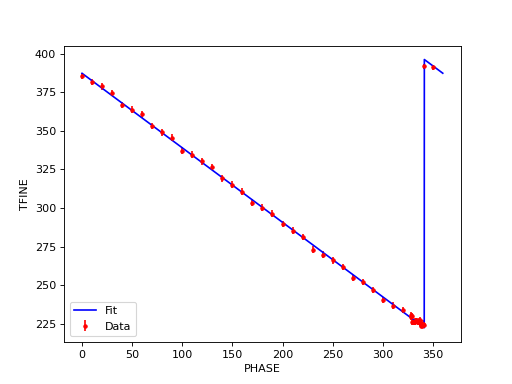

[-86.83466589 341.4863114  309.36606633]


<IPython.core.display.Javascript object>


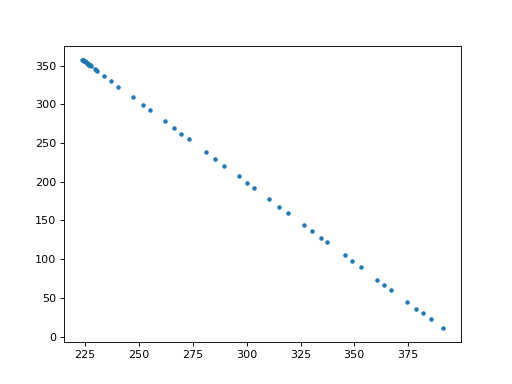

In [25]:
channel = 46
tac     = 1
ASIC = 'asic0'
data = pd.read_hdf(path + "/data/" + ASIC + "_tfine_fitted_210713.h5",key='tfine')
data['phase']=data['phase']/1000.0

gb,coeff = TPcal.TDC_fit(data,channel,tac, plot=True)
print(coeff)

plt.figure()
y=TPcal.sawtooth_inv_corr(data[(data['tac_id']==tac)&(data['channel_id']==channel)]['mu'],*coeff)
plt.plot(data[(data['tac_id']==tac)&(data['channel_id']==channel)]['mu'],y,'.')
wp=TPcal.sawtooth_inv_corr(np.arange(200,400,0.01),*coeff)


# QDC CALIBRATION

# GAUSSIAN FITTING FOR EFINE DATA

<IPython.core.display.Javascript object>


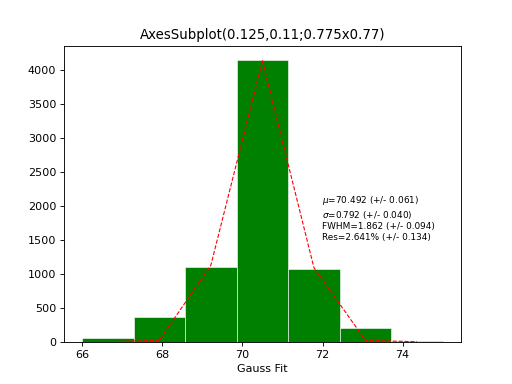

2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
10 1000
11 1000
12 1000
13 1000
14 1000
15 1000
16 1000
17 1000
18 1000
19 1000
20 1000
21 1000
22 1000
23 1000
24 1000
25 1000
26 1000
27 1000
28 1000
29 1000
30 1000
5 0 90 70.49192761446886 0.06095437295929028
[ 4.14298441e+03  7.04919276e+01 -7.92142220e-01]


In [303]:
#filename = '/home/viherbos/DATA_daq/CAL_data/asic2_qdc_tpulse.h5'
filename = path_data + "10888_qdc_asic0_imirror26_gain3.65.h5"
channel = 5
tac     = 0
phase   = 90

data = pd.read_hdf(filename,key='ch'+str(channel))
data = data[data['tac_id']==tac]
data = data[data['tpulse']==phase]
data = np.mod(data['efine'] - 1024 + 14, 1024)
fig = plt.figure()
axis = fig.add_subplot(111)

coeff_err = [1000,1000,1000]
#if (np.std(data) < 0.8):
#    coeff = [1000,np.mean(data),np.std(data)]
#else:
chisq_r = 10000
bins = 1
while ((np.abs(coeff_err[1]) > 1) & (bins < 30)) :
    axis.cla()
    bins = bins + 1 
    coeff,coeff_err,chisq_r=TPcal.gauss_fit(data,bins,True,axis,'Gauss Fit','','',[0.65,0.5,"left"])
    print(bins,coeff_err[1])

#coeff,coeff_err,chisq_r=TPcal.gauss_fit(data,7,True,axis,'Gauss Fit','','',[0.65,0.5,"left"])

print(channel,tac,phase,coeff[1],coeff_err[1]) 
print(coeff)

In [208]:
#filename = path + '/data' + '/asic'+str(asic)+'_qdc_tpulse.h5'
asic = 0
filename = path_data + "10888_qdc_asic0_imirror26_gain3.65.h5"
channels = list(range(0,64))
channels.pop(56)
#channels = [6,8,10,12,14,15,16,18,19,20,22,25,26,28,30,31]
tacs = range(0,4)
res=[]
for ch in channels:
    data_ch = pd.read_hdf(filename,key='ch'+str(ch))
    for tc in tacs:
        data_tc = data_ch[data_ch['tac_id']==tc]
        # Blind fit
        for i in np.arange(50,200,10):
            data_fit = data_tc[data_tc['tpulse']==i]
            data_fit = np.mod(data_fit['efine'] - 1024 + 14, 1024)
            # PETSYS Magic 
            
            coeff_err = [1000,1000,1000]
            bins = 1
            while ((np.abs(coeff_err[1]) > 1) & (bins < 30)) :
                bins = bins + 1 
                coeff,coeff_err,chisq_r=TPcal.gauss_fit(data_fit,bins,False) #True,axis,'Gauss Fit','','',[0.65,0.5,"left"])
                #print(ch,tc,i,bins,chisq_r)
                
            print(ch,tc,i,coeff[1],coeff_err[1])

            res.append([asic,ch,tc,i,coeff[1],np.abs(coeff[2])])

df_efine = pd.DataFrame(res,columns=['tofpet_id','channel_id','tac_id','tpulse','mu','sigma'])

Fitting Problems
0 0 50 91.18627606295259 2.209241425733485e-05
Fitting Problems
0 0 60 91.3788293657742 0.18218201726777886
Fitting Problems
0 0 70 90.28089451153213 0.005076975691599868


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
0 0 80 91.0492057903818 0.24932189064110966
Fitting Problems
0 0 90 158.46356405387348 0.08857596940732905
Fitting Problems
0 0 100 210.72114912069355 0.10514069631472357
Fitting Problems
0 0 110 254.49254691925697 0.011910174642174691
Fitting Problems
0 0 120 297.0733582182897 0.03320758367894461
Fitting Problems
0 0 130 338.5918306615299 0.05458307511826008
Fitting Problems
0 0 140 379.56977818650387 0.043942187878950816
Fitting Problems
0 0 150 391.7516906248825 0.008850747889545797
Fitting Problems
0 0 160 391.1822746941308 0.26175739449303015
Fitting Problems
0 0 170 391.4017826784792 0.004538222233363803
Fitting Problems
0 0 180 391.20408725138265 0.014857236704110452
Fitting Problems
0 0 190 391.2553587576647 0.025433730248518874
Fitting Problems
0 1 50 90.77216483837189 0.0005530231579621108
Fitting Problems
0 1 60 90.32130053878184 0.03714457454276457
Fitting Problems
0 1 70 90.24753278273 0.022861161782897002
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

0 1 80 90.40583415449387 0.11038080868033906
Fitting Problems
0 1 90 158.02534302883666 0.09547930496359543
Fitting Problems
0 1 100 211.0801179497637 0.14108019410943984
Fitting Problems
0 1 110 254.43782366809722 0.06449506248477349
Fitting Problems
0 1 120 296.1278075495667 0.010015572661617912
Fitting Problems
0 1 130 337.5459664667396 0.03290637522138997
Fitting Problems
0 1 140 378.27078437564325 0.0787891343228398
Fitting Problems
0 1 150 391.1095631703871 0.0032199493738391026
Fitting Problems
0 1 160 390.0467019459755 0.0005411281108940038
Fitting Problems
0 1 170 390.3708190857466 0.005391411399319161
Fitting Problems
0 1 180 391.30776592879016 0.2763264281105519
Fitting Problems
0 1 190 391.28566829828594 0.007114616977429211


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
0 2 50 89.46359162483947 0.010536492293964738
Fitting Problems
0 2 60 89.72264687497797 0.004732215781766586
Fitting Problems
0 2 70 89.04199885472516 0.013413371347978473
Fitting Problems
0 2 80 89.72832720854436 0.19134398494267124
Fitting Problems
0 2 90 157.26213830888523 0.009805525526678682
Fitting Problems
0 2 100 210.17164415205565 0.13152221976650078
Fitting Problems
0 2 110 253.26262889568494 0.15369712174469696
Fitting Problems
0 2 120 295.77376488696683 0.061174811321973416
Fitting Problems
0 2 130 337.47108978489285 0.08903568804997407
Fitting Problems
0 2 140 378.42850178849096 0.05322789388578206
Fitting Problems
0 2 150 389.95927668636887 0.006325518219736276
Fitting Problems
0 2 160 389.6828740795271 0.23623355014704467
Fitting Problems
0 2 170 389.94584719030087 0.024625228080751235
Fitting Problems
0 2 180 389.98492998307984 0.019448594122658803
Fitting Problems
0 2 190 390.11199863349736 0.01004299945541124
Fitting Problems
0 3 50 85.84818835902689 

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
0 3 60 85.85845286295418 0.00086151140502927
Fitting Problems
0 3 70 86.07496288119559 0.2173818995881772
Fitting Problems
0 3 80 85.6317842818078 0.06915208895997682
Fitting Problems
0 3 90 152.7160461273465 0.03156323235784213
Fitting Problems
0 3 100 206.5942982741929 0.01792605868800045
Fitting Problems
0 3 110 250.27581579795037 0.0019206583405649816
Fitting Problems
0 3 120 292.497420964514 0.11708143052662763
Fitting Problems
0 3 130 333.7089461977174 0.03256305184377646
Fitting Problems
0 3 140 373.6881481619795 0.07266599362646
Fitting Problems
0 3 150 386.4038111456175 0.006930435482453363
Fitting Problems
0 3 160 385.8131274857999 0.014020734503881414
Fitting Problems
0 3 170 386.2750148044657 0.2495683729360986
Fitting Problems
0 3 180 385.9865466199644 0.0015272212526716365
Fitting Problems
0 3 190 386.5693697131229 0.0020850613919504006


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
1 0 50 26.935845772355417 0.015549292764275614
Fitting Problems
1 0 60 27.590056710706136 0.0015621066089999175
Fitting Problems
1 0 70 27.248199577917045 0.007179489567059244
Fitting Problems
1 0 80 27.320211837186694 0.0025107549904141695
Fitting Problems
1 0 90 64.29501490608803 0.05118851162425642
Fitting Problems
1 0 100 124.9503554867562 0.018889338781581617
Fitting Problems
1 0 110 183.9686166621731 0.001275304060903653
Fitting Problems
1 0 120 229.1528006082489 0.04843569090859829
Fitting Problems
1 0 130 269.13334273325415 0.07741275528720487
Fitting Problems
1 0 140 307.7616409439704 0.049738563415285084
Fitting Problems
1 0 150 319.38398506464847 0.13124150978581578
Fitting Problems
1 0 160 318.4957682875974 0.015333899032024834
Fitting Problems
1 0 170 319.40102174422157 0.1537210372929494
Fitting Problems
1 0 180 319.7837222053465 0.25802060535584925
Fitting Problems
1 0 190 318.9131717721994 0.019371378408967816


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
1 1 50 27.09143005497728 0.02939160554720961
Fitting Problems
1 1 60 27.092596230646603 0.023336298666703878
Fitting Problems
1 1 70 27.384796058150123 0.006070497515520132
Fitting Problems
1 1 80 27.351642523706374 0.0010793786160166166
Fitting Problems
1 1 90 65.1236547620955 0.043899386545724124
Fitting Problems
1 1 100 125.21753758415609 0.01187941363162609
Fitting Problems
1 1 110 185.08924931121499 0.22668351620070534
Fitting Problems
1 1 120 229.9468972075532 0.04944950574362716
Fitting Problems
1 1 130 270.07630853430453 0.14843747759969375
Fitting Problems
1 1 140 308.27676438264956 0.10498541334163825
Fitting Problems
1 1 150 319.2799326945774 0.10844218919148295
Fitting Problems
1 1 160 319.36757795773883 0.19633866467643787
Fitting Problems
1 1 170 319.81459816171594 0.3012040362059739
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

1 1 180 320.23892043156485 0.1795403566628136
Fitting Problems
1 1 190 319.46915899857197 0.13682559677036893
Fitting Problems
1 2 50 26.560521221312758 0.01471459811206475
Fitting Problems
1 2 60 27.08837448022419 0.011228140948206828
Fitting Problems
1 2 70 26.234413344959208 0.009225993173673706
Fitting Problems
1 2 80 26.847652328109895 0.010105747790878439
Fitting Problems
1 2 90 63.57649484296134 0.04797537415475986
Fitting Problems
1 2 100 122.96586504915716 0.0017133880639630345
Fitting Problems
1 2 110 183.26298903672748 0.10047750335005212
Fitting Problems
1 2 120 228.04726804657415 0.0014613608828681758
Fitting Problems
1 2 130 268.55489329696326 0.13539486994239835
Fitting Problems
1 2 140 306.3013477153304 0.016311212617144175
Fitting Problems
1 2 150 317.6365268555723 0.14270703231663784
Fitting Problems
1 2 160 317.3087132844579 0.03363126384983053
Fitting Problems
1 2 170 318.2179178553008 0.06894159900635492
Fitting Problems
1 2 180 318.44073620748867 0.067358824471671

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
1 3 50 25.350110173222834 0.0026896410053368898
Fitting Problems
1 3 60 25.358066068605773 0.0007217066555987462
Fitting Problems
1 3 70 25.542687216637137 0.001082653554303143
Fitting Problems
1 3 80 25.510000330084132 0.0005401567438693643
Fitting Problems
1 3 90 60.707242137355536 0.015405164053688587
Fitting Problems
1 3 100 118.94378474724859 0.007424570843032914
Fitting Problems
1 3 110 179.05523494368634 0.003064537626014381
Fitting Problems
1 3 120 225.40158108481552 0.03472218749333569
Fitting Problems
1 3 130 265.3906947928665 0.15502808368575285
Fitting Problems
1 3 140 303.12825100793697 0.05173098660396855
Fitting Problems
1 3 150 314.37823176254545 0.06858342830544888
Fitting Problems
1 3 160 314.5408264624357 0.07981385740064831
Fitting Problems
1 3 170 315.0609995993852 0.22475486183679397
Fitting Problems
1 3 180 315.3812010358769 0.19047878571453933
Fitting Problems
1 3 190 314.1818129070591 0.06366957461942853


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
2 0 50 52.51912554708911 0.06252665963906252
Fitting Problems
2 0 60 52.37228956181809 0.1084468528378409
Fitting Problems
2 0 70 52.43384492074903 0.08959336438492987
Fitting Problems
2 0 80 51.63763238113327 0.01076860161993267
Fitting Problems
2 0 90 106.84021921808805 0.05515195900706873
Fitting Problems
2 0 100 172.6300759171355 0.09973424419825128
Fitting Problems
2 0 110 226.31895932474106 0.09483511968129221
Fitting Problems
2 0 120 270.8080477464499 0.045915202144064894
Fitting Problems
2 0 130 313.5947801325175 0.10962340770546442
Fitting Problems
2 0 140 355.0441401850849 0.004846557139868424
Fitting Problems
2 0 150 367.19327951314307 0.0005477897519986961
Fitting Problems
2 0 160 366.67456744043824 0.013341971357942512
Fitting Problems
2 0 170 367.43008158401614 0.019753828818748456
Fitting Problems
2 0 180 367.29719064742574 0.01554542892439487
Fitting Problems
Fitting Problems
2 0 190 367.96513031723106 0.0009795758740434911
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

2 1 50 52.28075093570922 0.007680773180065955
Fitting Problems
2 1 60 51.68754466407347 0.013655225148729494
Fitting Problems
2 1 70 52.43236836975205 0.09218217671053314
Fitting Problems
2 1 80 52.31133109764924 0.10676058204758682
Fitting Problems
2 1 90 106.40441210011718 0.01618527214128787
Fitting Problems
2 1 100 172.52678902503104 0.00548617904687207
Fitting Problems
2 1 110 225.69977563430356 0.03090997702199406
Fitting Problems
2 1 120 270.9769972443335 0.10504968002379284
Fitting Problems
2 1 130 313.57209861402066 0.1227944963705731
Fitting Problems
2 1 140 355.02632119119875 0.0008638856407662829
Fitting Problems
2 1 150 367.19007509559725 0.013056704507684643
Fitting Problems
2 1 160 366.78716379216803 0.02595028021678676
Fitting Problems
2 1 170 367.8837993214821 0.004814015301646556
Fitting Problems
2 1 180 367.84451798917803 0.010147405056394204
Fitting Problems
2 1 190 367.9905984717836 0.013023617685653814
Fitting Problems
2 2 50 51.66483226141057 0.016805877494081432

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

2 2 60 51.42925462635788 0.12300714976265395
Fitting Problems
2 2 70 51.523230522526354 0.009840478028203679
Fitting Problems
2 2 80 51.30446443904591 0.011891248355231383
Fitting Problems
2 2 90 106.24869559671522 0.13093316414253975
Fitting Problems
2 2 100 171.3711490209646 0.011267453384908688
Fitting Problems
2 2 110 225.57886059256202 0.05823813028349837
Fitting Problems
2 2 120 270.2890660345572 0.15085724024798983
Fitting Problems
2 2 130 312.969698739352 0.1724518124192209
Fitting Problems
2 2 140 354.33021616886936 0.02476896022890747
Fitting Problems
2 2 150 366.2749186262115 0.02977108790061114
Fitting Problems
2 2 160 366.42990273566744 0.12119576500404904
Fitting Problems
2 2 170 366.4570236837973 0.06472445073800721
Fitting Problems
2 2 180 366.5009619431905 0.010122727067261085
Fitting Problems
2 2 190 366.4953452960563 0.0323048169839423
Fitting Problems
2 3 50 49.56927747730343 0.048925576973769785
Fitting Problems
2 3 60 49.37889978900564 0.1560010445389643
Fitting P

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
2 3 90 101.69111626160226 0.06231366622999071
Fitting Problems
2 3 100 167.18116779788645 0.0016324325257313064
Fitting Problems
2 3 110 221.68326228175255 0.05207554453332739
Fitting Problems
2 3 120 266.4116202955856 0.06529064217762752
Fitting Problems
2 3 130 308.58924385845035 0.10251740310886553
Fitting Problems
2 3 140 350.5293115159102 0.1279220381918884
Fitting Problems
2 3 150 362.6028242762039 0.02594670413494115
Fitting Problems
2 3 160 362.23241305202487 0.016310078072376312
Fitting Problems
2 3 170 362.8117032042611 0.05365609208018239
Fitting Problems
2 3 180 362.8567625343753 0.0071388669766657776
Fitting Problems
2 3 190 362.4317193485168 0.005677472269974246
Fitting Problems
3 0 50 36.17718207000292 0.08672566756144973
Fitting Problems
3 0 60 35.58595165533655 0.10028699830379324
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

3 0 70 36.26003350773105 0.07420335499550798
Fitting Problems
3 0 80 36.15241191762454 0.001816288555413257
Fitting Problems
3 0 90 73.3038182412776 0.17574004053209505
Fitting Problems
3 0 100 129.81349819755394 0.032263486817480855
Fitting Problems
3 0 110 195.00059796222035 0.10703877200123313
Fitting Problems
3 0 120 245.8378634339784 0.10577018432822881
Fitting Problems
3 0 130 287.6763102587911 0.007735781201432003
Fitting Problems
3 0 140 328.41942807914796 0.0341675939617126
Fitting Problems
3 0 150 340.1253475381682 0.01798237010353915
Fitting Problems
3 0 160 339.24013635138846 0.028432588760894172
Fitting Problems
3 0 170 339.56911269775145 0.0018721933107570476
Fitting Problems
3 0 180 339.58823044237806 0.03475890113301323
Fitting Problems
3 0 190 339.4092418477271 0.08812096887409518
Fitting Problems
3 1 50 36.00644833866064 0.10409430888603359
Fitting Problems
3 1 60 36.202662734643006 0.07255318701112858
Fitting Problems
3 1 70 35.88187884915004 0.0014301525852788608
Fi

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

3 1 100 129.6874711355995 0.029953434117701606
Fitting Problems
3 1 110 194.60228918057882 0.019161083390717114
Fitting Problems
3 1 120 245.4169580850177 0.00965754289558422
Fitting Problems
3 1 130 287.94617173915424 0.029850644464515876
Fitting Problems
3 1 140 328.10237427596786 0.056673375579313234
Fitting Problems
3 1 150 339.1437978777962 0.0789417857563149
Fitting Problems
3 1 160 338.583767138307 0.029538076378534978
Fitting Problems
3 1 170 339.3007970702426 0.01360627310772445
Fitting Problems
3 1 180 339.23885898379973 0.02192399998617796
Fitting Problems
3 1 190 339.2252461980031 0.009484461913288987
Fitting Problems
3 2 50 35.368833176979194 0.06390807729133906
Fitting Problems
3 2 60 34.9434528471201 0.09935036082977766
Fitting Problems
3 2 70 35.480579211406045 0.027651076580634433
Fitting Problems
3 2 80 35.410028932977255 0.06277872994523404
Fitting Problems
3 2 90 71.89887702025092 0.027093989784976107
Fitting Problems
3 2 100 127.93517700581052 0.022221908952777845


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

3 2 120 244.6065937925129 0.006858646799266525
Fitting Problems
3 2 130 286.6939329295283 0.050207404364162246
Fitting Problems
3 2 140 326.6298991432191 0.021809891663782513
Fitting Problems
3 2 150 338.1341676878051 0.03871523791512707
Fitting Problems
3 2 160 337.315762360366 0.03482700894859564
Fitting Problems
3 2 170 338.21346646604104 0.05264739894505485
Fitting Problems
3 2 180 338.247192905876 0.13466656167565025
Fitting Problems
3 2 190 338.1227849102422 0.022000527428534887
Fitting Problems
3 3 50 33.74957024933364 0.011017338580799337
Fitting Problems
3 3 60 34.18140377316331 0.1480832565633398
Fitting Problems
3 3 70 34.1350679222207 0.1029164317488373
Fitting Problems
3 3 80 33.76580708102716 0.003798651571359198
Fitting Problems
3 3 90 68.81471879024922 0.03121624019189051
Fitting Problems
3 3 100 123.78163928950329 0.18629347159551948
Fitting Problems
3 3 110 189.2127814202809 0.0009568236082268819
Fitting Problems
3 3 120 240.87185234263785 0.08871337749326111
Fitting 

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

3 3 130 282.4621025059303 0.0021659877186066987
Fitting Problems
3 3 140 322.56266527490857 0.012712464009002106
Fitting Problems
3 3 150 334.284376760251 0.04195786684672565
Fitting Problems
3 3 160 333.6329313207066 0.013411411174276144
Fitting Problems
3 3 170 333.82019077834366 0.03400040505649006
Fitting Problems
3 3 180 333.8043981890266 0.01997445011088152
Fitting Problems
3 3 190 333.632363622365 0.044294694452508526
Fitting Problems
4 0 50 55.42507991197859 0.004244803347770125
Fitting Problems
4 0 60 55.30566313245291 0.0022722381916331874
Fitting Problems
4 0 70 55.80848437055817 0.007680566468267112
Fitting Problems
4 0 80 55.507395915849266 0.08113404443805816
Fitting Problems
4 0 90 111.64905244527206 0.03161435164699228
Fitting Problems
4 0 100 167.64291990461683 0.0619684436992699
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

4 0 110 215.745254896821 0.03217163813249328
Fitting Problems
4 0 120 260.0083309269481 0.006144744975861472
Fitting Problems
4 0 130 303.13439313957724 0.007151708829565989
Fitting Problems
4 0 140 345.1354537301933 0.02168578452137638
Fitting Problems
4 0 150 358.52070121441614 0.11319366737351577
Fitting Problems
4 0 160 358.9048236148643 0.010964252444455022
Fitting Problems
4 0 170 358.3000077193601 0.009138424925590874
Fitting Problems
4 0 180 358.18532304546005 0.07011552803312353
Fitting Problems
4 0 190 359.153852551604 0.005016327847413334
Fitting Problems
4 1 50 55.650655491747685 0.018305016097353775
Fitting Problems
4 1 60 55.25479510662575 0.041480977640383304
Fitting Problems
4 1 70 55.21574850978882 0.006449713223204484
Fitting Problems
4 1 80 55.3090336909392 0.13313493355354405
Fitting Problems
4 1 90 111.45279661900659 0.03821599109178924
Fitting Problems
4 1 100 167.6603840248739 0.024154730946735634
Fitting Problems
4 1 110 215.79820155015554 0.04652903736508855
Fi

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

4 1 150 357.83193681319443 0.003365056967947141
Fitting Problems
4 1 160 358.33492982146777 0.01014851394366596
Fitting Problems
4 1 170 358.5967906243311 0.08364016858669544
Fitting Problems
4 1 180 358.45985477356754 0.12496240767685594
Fitting Problems
4 1 190 358.41002766955154 0.021500071936528704
Fitting Problems
4 2 50 54.6563470772152 0.008143465176792495
Fitting Problems
4 2 60 54.042598674794796 0.012401973638316667
Fitting Problems
4 2 70 54.08202288761702 0.01461415732432256
Fitting Problems
4 2 80 54.35965114412336 0.13826351736919096
Fitting Problems
4 2 90 110.41370811777401 0.10629471581645013
Fitting Problems
4 2 100 166.06955078778967 0.0012724949346890897
Fitting Problems
4 2 110 214.04518547543705 0.05784925702264324
Fitting Problems
4 2 120 258.7004546178991 0.04496043210310659
Fitting Problems
4 2 130 301.7118311037124 0.008077660728073402
Fitting Problems
4 2 140 343.5891151591788 0.018565893928210897
Fitting Problems
4 2 150 357.33172150165274 0.2441002827606515

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

4 2 180 357.38383080910637 0.1709044636138102
Fitting Problems
4 2 190 357.6645527531614 0.14016346051486225
Fitting Problems
4 3 50 51.58806249817033 0.006991725129913252
Fitting Problems
4 3 60 51.34445509908096 0.03594823659038184
Fitting Problems
4 3 70 51.499602807384186 0.008714421338715396
Fitting Problems
4 3 80 51.36726661355976 0.02157300238555797
Fitting Problems
4 3 90 106.60933405967643 0.13135511600073502
Fitting Problems
4 3 100 162.65563181407842 0.016077351842217678
Fitting Problems
4 3 110 211.2364857158974 0.12396310948683721
Fitting Problems
4 3 120 255.0686824475707 0.02602714506387845
Fitting Problems
4 3 130 298.3431780967115 0.11380594629423105
Fitting Problems
4 3 140 340.23600443539607 0.08397305218606198
Fitting Problems
4 3 150 352.8521892365275 0.08111117532167912
Fitting Problems
4 3 160 353.4798808802586 0.12847240031625276
Fitting Problems
4 3 170 353.30153508936706 0.13594572863265228
Fitting Problems
Fitting Problems
4 3 180 352.59175777301044 0.012982

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

4 3 190 353.0644970124554 0.018613793592368047
Fitting Problems
5 0 50 32.93126664868757 0.014292548576465062
Fitting Problems
5 0 60 33.332950520398505 0.0013359592989557825
Fitting Problems
5 0 70 33.558945646883785 0.0006316829279659373
Fitting Problems
5 0 80 33.446336059453934 0.0016918980526648526
Fitting Problems
5 0 90 70.50757169547272 0.06123129662055095
Fitting Problems
5 0 100 130.22892987140384 0.009830303322906596
Fitting Problems
5 0 110 190.47724833691905 0.15964098784903225
Fitting Problems
5 0 120 236.22913502741613 0.032744984985375584
Fitting Problems
5 0 130 276.62306582974674 0.03630555178247698
Fitting Problems
5 0 140 314.6164113870851 0.04975604832641795
Fitting Problems
5 0 150 327.2953416852197 0.1086583175276794
Fitting Problems
5 0 160 326.6790625219267 0.06404741767873419
Fitting Problems
5 0 170 327.15523187410446 0.03514034346238313
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

5 0 180 327.63054571698467 0.006234454081202933
Fitting Problems
5 0 190 328.1087552066166 0.08089023595230584
Fitting Problems
5 1 50 32.852601950430405 0.010770431849214614
Fitting Problems
5 1 60 33.301139633290745 0.0006511454976877208
Fitting Problems
5 1 70 33.47351172416593 0.0033270287324707274
Fitting Problems
5 1 80 33.400660784167975 0.0030588518038203146
Fitting Problems
5 1 90 70.29138913646567 0.047845062245164514
Fitting Problems
5 1 100 129.5935870654217 0.03615511799124467
Fitting Problems
5 1 110 189.90049177770854 0.009055720491811253
Fitting Problems
5 1 120 236.00457228747456 0.06506365479253506
Fitting Problems
5 1 130 276.47268281453137 0.03454415635325221
Fitting Problems
5 1 140 314.9921132814714 0.14289916451044915
Fitting Problems
5 1 150 326.7530403717587 0.0568469998738316
Fitting Problems
5 1 160 327.1224283664134 0.0918667079853971
Fitting Problems
5 1 170 327.03397336686317 0.01996637703096174
Fitting Problems
Fitting Problems
5 1 180 326.95460306760697 

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
5 2 50 33.00268385461402 0.0005668138452510479
Fitting Problems
5 2 60 32.338584267176756 0.0014132075600716504
Fitting Problems
5 2 70 32.50897210003607 0.002499146295889776
Fitting Problems
5 2 80 32.87825291496201 0.00479531683221117
Fitting Problems
5 2 90 69.70666641965563 0.03369833529600313
Fitting Problems
5 2 100 128.5191889160152 0.1016131237049633
Fitting Problems
5 2 110 188.45152055725293 0.09177674299133236
Fitting Problems
Fitting Problems
5 2 120 235.00092122580594 0.06564438758412705
Fitting Problems
5 2 130 275.52322430203316 0.07667113258201266
Fitting Problems
5 2 140 313.6796648285174 0.0024253102759641066
Fitting Problems
5 2 150 325.7480046152241 0.1010469442223418
Fitting Problems
5 2 160 325.46866479710803 0.08025858786054496
Fitting Problems
5 2 170 326.14031449064794 0.012592132537341833
Fitting Problems
5 2 180 325.93963442346245 0.022876683467110345
Fitting Problems
5 2 190 326.479732278202 0.028516124279462318
Fitting Problems
5 3 50 31.79

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

5 3 70 31.78114138546007 0.00033938808344055724
Fitting Problems
5 3 80 31.70912903746361 0.0005034969382069078
Fitting Problems
5 3 90 66.67856210989476 0.02055725876063126
Fitting Problems
5 3 100 123.8143552720445 0.01723285201156453
Fitting Problems
5 3 110 185.5618818056429 0.14529502915515569
Fitting Problems
5 3 120 231.74354400638725 0.008731806869152852
Fitting Problems
5 3 130 272.76735743411825 0.007231656507809311
Fitting Problems
5 3 140 310.49722954247216 0.08435906640369556
Fitting Problems
5 3 150 322.1380844274657 0.048570844335136414
Fitting Problems
5 3 160 322.5932597565593 0.06455032796575097
Fitting Problems
5 3 170 322.6590137070239 0.05011516664335198
Fitting Problems
5 3 180 322.58199243651296 0.053624450159400615
Fitting Problems
5 3 190 322.84528096547524 0.05413317745186085


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
6 0 50 31.417022533495537 0.013129383322362622
Fitting Problems
6 0 60 31.550427993901184 0.009360362524416911
Fitting Problems
6 0 70 31.93886715403724 0.009461245340336608
Fitting Problems
6 0 80 31.82483322970411 0.0020671386687628078
Fitting Problems
6 0 90 69.85276887233945 0.0569781182586966
Fitting Problems
6 0 100 127.52163185985926 0.016723042464404272
Fitting Problems
6 0 110 184.63442402046974 0.12633592569713606
Fitting Problems
6 0 120 229.22285536535145 0.10934462346816737
Fitting Problems
6 0 130 269.3526304245537 0.011783388452528463
Fitting Problems
6 0 140 307.08961293225246 0.0016273936442785966
Fitting Problems
6 0 150 318.57715913059434 0.05957208560380884
Fitting Problems
6 0 160 318.0186255264675 0.004211496128006599
Fitting Problems
6 0 170 318.24125285043044 0.008191032637140098
Fitting Problems
6 0 180 317.86843419608414 0.014385936021281633
Fitting Problems
6 0 190 317.53298692278827 0.11971319316262191
Fitting Problems
6 1 50 30.823574559198

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

6 1 70 31.47952092903697 0.0027531300891743115
Fitting Problems
6 1 80 30.754456875120606 0.0007216420241626665
Fitting Problems
6 1 90 68.9903087572869 0.012461836845153111
Fitting Problems
6 1 100 126.18264667056295 0.012017725592166732
Fitting Problems
6 1 110 183.5777861059584 0.007575935944030507
Fitting Problems
6 1 120 228.60455495206355 0.0006232815710474258
Fitting Problems
6 1 130 268.10504212945733 0.06798744603930244
Fitting Problems
6 1 140 307.1170438124264 0.06627622096085595
Fitting Problems
6 1 150 317.2651614550104 0.10178042427964498
Fitting Problems
6 1 160 317.31900082678567 0.0312855266728387
Fitting Problems
6 1 170 317.06720944575284 0.0873903071595963
Fitting Problems
6 1 180 317.8378671842603 0.03194137462113274
Fitting Problems
6 1 190 317.03092707950145 0.06373837670625697
Fitting Problems
6 2 50 30.753723732580013 0.012417150090793302
Fitting Problems
6 2 60 31.306020918761526 0.0013391282804525886
Fitting Problems
6 2 70 30.768119052095383 0.00628101819845

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

6 2 110 183.2059287501876 0.05371238508097891
Fitting Problems
6 2 120 227.7070887671177 0.07945202465944863
Fitting Problems
6 2 130 267.8129688323913 0.08069100683815147
Fitting Problems
6 2 140 305.8511427471851 0.04875294087263526
Fitting Problems
6 2 150 316.6320173095611 0.042444929719385356
Fitting Problems
6 2 160 316.49336996327025 0.03171526868325883
Fitting Problems
6 2 170 316.51659966582736 0.05510669089189383
Fitting Problems
6 2 180 316.48277736048715 0.07611180791696757
Fitting Problems
6 2 190 316.25115053618526 0.0654240938058034
Fitting Problems
6 3 50 28.936421022309304 0.011349242362940652
Fitting Problems
6 3 60 29.77288023979021 0.001271436741502166
Fitting Problems
6 3 70 29.628895089270223 0.004570871815517065
Fitting Problems
6 3 80 29.11517481151287 0.006057901382492986
Fitting Problems
6 3 90 65.45085599705412 0.023771516168599478
Fitting Problems
6 3 100 121.59871304358616 0.10453849601086089
Fitting Problems
6 3 110 179.43230090814433 0.13094607359172436
F

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

6 3 130 264.1492610017438 0.069536023478596
Fitting Problems
6 3 140 302.12009673757314 0.06703196410762025
Fitting Problems
6 3 150 313.09356214715734 0.1068431904776977
Fitting Problems
6 3 160 313.37933951202314 0.091977585570653
Fitting Problems
6 3 170 312.7925574330612 0.13953676757231046
Fitting Problems
6 3 180 312.905019859585 0.1201060592711727
Fitting Problems
6 3 190 312.51173553121004 0.11861532337296163
Fitting Problems
7 0 50 40.44447569225216 0.057798687688699696
Fitting Problems
7 0 60 40.224348440782336 0.0012284809780140277
Fitting Problems
7 0 70 40.346599101455766 0.006237187108513473
Fitting Problems
7 0 80 40.60182706568331 0.05666389295870425
Fitting Problems
7 0 90 82.53458451700273 0.055943070114683
Fitting Problems
7 0 100 139.84366235027744 0.02375143563465741
Fitting Problems
7 0 110 192.3572673784178 0.029803385297174634
Fitting Problems
7 0 120 234.68235082216808 0.010242752843856137


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
7 0 130 272.6227708945352 0.023852921767725483
Fitting Problems
7 0 140 310.6027345454962 0.044668882444581975
Fitting Problems
7 0 150 320.7426563732459 0.05178491940137132
Fitting Problems
7 0 160 320.4335723854683 0.059901476768786106
Fitting Problems
7 0 170 320.9392633205597 0.06301185663002457
Fitting Problems
7 0 180 320.728976467722 0.047318926465146106
Fitting Problems
7 0 190 320.77703290534737 0.030082590121666926
Fitting Problems
7 1 50 40.205946039706376 0.20096068206943685
Fitting Problems
7 1 60 39.71818318385742 0.0016237487464526679
Fitting Problems
7 1 70 40.1151436572215 0.008045279870976738
Fitting Problems
7 1 80 39.920599890540934 0.0037146944645160248
Fitting Problems
7 1 90 81.85256402345645 0.0592691004921546
Fitting Problems
7 1 100 139.308162481069 0.001628166870686945
Fitting Problems
7 1 110 191.52718848220147 0.06081017332876214
Fitting Problems
7 1 120 234.1671703622115 0.035705970031363624
Fitting Problems
7 1 130 271.93207430772304 0.01

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

7 1 150 320.68838261406233 0.010266257947901411
Fitting Problems
7 1 160 319.9721454099843 0.05260742583395439
Fitting Problems
7 1 170 320.51263129386325 0.05820711320490636
Fitting Problems
7 1 180 320.7035807386626 0.04136897001433426
Fitting Problems
7 1 190 320.7361978320397 0.07015927173148602
Fitting Problems
7 2 50 39.60474380465611 0.019334658852740903
Fitting Problems
7 2 60 39.44644765288042 0.005239718512400251
Fitting Problems
7 2 70 39.63482123251741 0.01432280154619611
Fitting Problems
7 2 80 39.38426055031264 0.00314483262141079
Fitting Problems
7 2 90 80.77218998693144 0.03587142368871398
Fitting Problems
7 2 100 138.65365002220537 0.0002001018743891874
Fitting Problems
7 2 110 191.4467199062299 0.0268268634968375
Fitting Problems
7 2 120 233.48627520098086 0.0024145902974803484
Fitting Problems
7 2 130 271.2020253164202 0.08003759808369776
Fitting Problems
7 2 140 309.46274627333236 0.10823675146777709
Fitting Problems
7 2 150 319.64769977543745 0.043352792120104885
F

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

7 2 180 320.18062276521744 0.12686287144590933
Fitting Problems
7 2 190 319.8042652269231 0.05046708886409688
Fitting Problems
7 3 50 37.6911948956469 0.05624032724343463
Fitting Problems
7 3 60 38.221401211689574 0.18417170714419986
Fitting Problems
7 3 70 37.68788073481398 0.008132102641539825
Fitting Problems
7 3 80 37.78945696839204 0.004469762586281814
Fitting Problems
7 3 90 78.21471235592368 0.0122820112893609
Fitting Problems
7 3 100 134.53607143024382 0.03560611657520074
Fitting Problems
7 3 110 188.16692258795663 0.01775921836523263
Fitting Problems
7 3 120 229.76126469877406 0.0061588457931921565
Fitting Problems
7 3 130 268.6408149708145 0.009567487273415788
Fitting Problems
7 3 140 305.2937757876132 0.043595764316957296
Fitting Problems
7 3 150 316.10325149506565 0.027179009175566482
Fitting Problems
7 3 160 315.9574400405878 0.05813480953113419
Fitting Problems
7 3 170 316.2559538719085 0.07160073300428163
Fitting Problems
7 3 180 316.5672706167999 0.04840586045343613
Fit

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
8 0 50 98.37499298262485 0.18404225518801592
Fitting Problems
8 0 60 98.39295954438715 0.19784724650794577
Fitting Problems
8 0 70 97.69848976584758 0.10918821949199016
Fitting Problems
8 0 80 97.69017055790034 0.10784209704793672
Fitting Problems
8 0 90 172.5255664007008 0.11804203656729918
Fitting Problems
8 0 100 229.08090890080518 0.027292087088992154
Fitting Problems
8 0 110 275.28003144627814 0.049232919538278935
Fitting Problems
8 0 120 319.052695217323 0.1267669520722103
Fitting Problems
8 0 130 360.96846435637093 0.08266689092434354
Fitting Problems
8 0 140 402.4855978594709 0.020557827079737745
Fitting Problems
8 0 150 415.33905509707387 0.028297732394996066
Fitting Problems
8 0 160 415.73864673020506 0.027548700396865466
Fitting Problems
8 0 170 415.0184434543371 0.022985575892276035
Fitting Problems
8 0 180 414.7703715019718 0.012540028798470453
Fitting Problems
8 0 190 416.1602589183715 0.09019576483751154
Fitting Problems
8 1 50 97.46261578847829 0.008692

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

8 1 60 97.5667227454825 0.12548341222295756
Fitting Problems
8 1 70 97.72494059661769 0.2893009193539341
Fitting Problems
8 1 80 97.58583952872182 0.08839689748030397
Fitting Problems
8 1 90 171.66199515757185 0.0002712450584500406
Fitting Problems
8 1 100 229.3531046735398 0.09212430015280479
Fitting Problems
8 1 110 274.5334851784334 0.03212090694043596
Fitting Problems
8 1 120 318.4947666385901 0.2174999036531162
Fitting Problems
8 1 130 360.8514053013906 0.02666953699720141
Fitting Problems
8 1 140 402.75591630663155 0.07440231689062267
Fitting Problems
8 1 150 415.14580663137633 0.028061347759565636
Fitting Problems
8 1 160 415.51093144473384 0.06035589433811746
Fitting Problems
8 1 170 414.72759328414503 0.02830050636889891
Fitting Problems
8 1 180 414.26183657091286 0.00454908190515792
Fitting Problems
8 1 190 415.85118190808237 0.024354355391633543
Fitting Problems
8 2 50 96.3604639333055 0.04970314570335444
Fitting Problems
8 2 60 96.36074340299481 0.04139580490654461
Fitting 

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
8 2 80 96.10794115587869 0.013542266282945222
Fitting Problems
8 2 90 170.1122584707339 0.01657233849678054
Fitting Problems
8 2 100 228.38707512275715 0.038322282927963816
Fitting Problems
8 2 110 273.693163082193 0.05039742375292125
Fitting Problems
8 2 120 317.54908015330847 0.07501911237794064
Fitting Problems
8 2 130 359.234093302232 0.008330797453149213
Fitting Problems
8 2 140 401.4357354471309 0.08608276915712938
Fitting Problems
8 2 150 414.5748527646422 0.11350988774785509
Fitting Problems
8 2 160 414.4745842465684 0.11419083828713984
Fitting Problems
8 2 170 414.33844753726083 0.1568179426697212
Fitting Problems
8 2 180 414.0053062589097 0.013335378486941336
Fitting Problems
8 2 190 414.7270238829329 0.059806449284257844
Fitting Problems
8 3 50 93.32944655098427 0.19045481163102487
Fitting Problems
8 3 60 92.58873584425395 0.014322248332819289
Fitting Problems
8 3 70 92.49339714842235 0.04364247186838924
Fitting Problems
8 3 80 93.20789020566582 0.1702394771

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
8 3 90 166.361137188246 0.00844385667847248
Fitting Problems
8 3 100 225.1562578981704 0.03744317490977397
Fitting Problems
8 3 110 270.4193796284361 0.09010207157554843
Fitting Problems
8 3 120 314.0545120358816 0.04184058159875504
Fitting Problems
8 3 130 355.6987342254876 0.13095508742989678
Fitting Problems
8 3 140 398.29119227054963 0.24143623327520483
Fitting Problems
8 3 150 410.71436886692936 0.057170465010163735
Fitting Problems
8 3 160 410.61057081871144 0.049975852124742856
Fitting Problems
8 3 170 410.3844444139064 0.09111521892356346
Fitting Problems
8 3 180 409.8935093409521 0.054130521530399135
Fitting Problems
8 3 190 410.40189673183227 0.028481186221180115
Fitting Problems
9 0 50 80.14547167488476 0.07304073429926718
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

9 0 60 79.30885179829234 0.07497975413806256
Fitting Problems
9 0 70 80.08845401332503 0.051064664996409166
Fitting Problems
9 0 80 79.22167895709175 0.04431222761962879
Fitting Problems
9 0 90 139.24322409958415 0.01955348149057173
Fitting Problems
9 0 100 193.55589034641022 0.08240178123695129
Fitting Problems
9 0 110 240.36592147545835 0.003867485426319613
Fitting Problems
9 0 120 284.3622114280634 0.0689803086695797
Fitting Problems
9 0 130 327.1326397059214 0.00945867006072591
Fitting Problems
9 0 140 368.57151103978566 0.011015223051298878
Fitting Problems
9 0 150 380.94783035683975 0.0019306950926982838
Fitting Problems
9 0 160 381.83033154594006 0.4334994516147841
Fitting Problems
9 0 170 381.0312568751387 0.01182788048052653
Fitting Problems
9 0 180 381.9371355514437 0.0077324816755474195
Fitting Problems
9 0 190 380.5525633101612 0.05344150731530169
Fitting Problems
9 1 50 80.27987464016849 0.039616935324658445
Fitting Problems
9 1 60 79.87485175089985 0.06483600972452327
Fit

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
9 1 80 78.79253884895854 0.041418958989862066
Fitting Problems
9 1 90 139.30095679843652 0.021652381823433785
Fitting Problems
9 1 100 193.53308889371237 0.07957446642547134
Fitting Problems
9 1 110 240.23146397366526 0.019473121109388727
Fitting Problems
9 1 120 283.88238816292903 0.016943488539350803
Fitting Problems
9 1 130 327.25439645422455 0.23202544234932107
Fitting Problems
9 1 140 368.82167800804467 0.02256209654256402
Fitting Problems
9 1 150 380.89660608459985 0.015175704063649155
Fitting Problems
9 1 160 381.591010824681 0.018853162512459432
Fitting Problems
9 1 170 380.81269766914716 0.007308090854946209
Fitting Problems
9 1 180 381.29521538069173 0.03062683329843263
Fitting Problems
9 1 190 380.52243961366594 0.03859792616362023
Fitting Problems
9 2 50 78.70471430630944 0.025795142990350465
Fitting Problems
9 2 60 77.98470581895639 0.01964530539905966
Fitting Problems
9 2 70 78.22440071100836 0.02890500770594622
Fitting Problems
9 2 80 77.37904473897457 0

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

9 2 90 137.56422421227447 0.011471976424055086
Fitting Problems
9 2 100 191.8958444764579 0.033562593289667896
Fitting Problems
9 2 110 239.22864442280914 0.06183278393904502
Fitting Problems
9 2 120 282.95999468731054 0.00586066353753088
Fitting Problems
9 2 130 324.97370205793953 0.027525424799911904
Fitting Problems
9 2 140 367.1534813381396 0.012179698735221964
Fitting Problems
Fitting Problems
9 2 150 379.74015790875035 0.030650791227742682
Fitting Problems
9 2 160 379.59508741207185 0.011010488547114703
Fitting Problems
9 2 170 379.6932934373727 0.057560814589152576
Fitting Problems
9 2 180 379.6148334377454 0.03892561622186175
Fitting Problems
9 2 190 378.5142206233513 0.024098012749529215
Fitting Problems
9 3 50 75.6768725649246 0.029342673623729644
Fitting Problems
9 3 60 75.4277390563084 4.653459194498977e-05
Fitting Problems
9 3 70 76.14696512373602 0.016513657945118856
Fitting Problems
9 3 80 74.76293999633741 0.005106625744830355
Fitting Problems
9 3 90 133.7243606649048 0

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

9 3 100 188.33247649110544 0.05391587581894906
Fitting Problems
9 3 110 236.24257669425063 0.12080438284104693
Fitting Problems
9 3 120 279.57714236719397 0.05810695501469186
Fitting Problems
9 3 130 322.2905743096106 0.21185653805113397
Fitting Problems
9 3 140 363.7397668954028 0.010364114726821267
Fitting Problems
9 3 150 376.18010288544997 0.011363908091827756
Fitting Problems
9 3 160 375.7907415030135 0.025449315657511674
Fitting Problems
9 3 170 376.12293165700623 0.001991380012704241
Fitting Problems
9 3 180 376.0116929635205 0.03538689997107884
Fitting Problems
9 3 190 375.2519481941309 0.05929580126093585
Fitting Problems
10 0 50 17.586016007800254 0.001102318438533619
Fitting Problems
10 0 60 17.59212677041929 0.0021900814631537523
Fitting Problems
10 0 70 17.90848270459808 0.00017629618526369387
Fitting Problems
10 0 80 17.693758584472675 3.529312206274396e-05


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
10 0 90 50.782087555011714 0.0021559609468154053
Fitting Problems
10 0 100 107.13815353770406 0.0020205574595643697
Fitting Problems
10 0 110 169.26960733177165 0.1044918712483639
Fitting Problems
10 0 120 217.36273481431883 0.005098546996149197
Fitting Problems
10 0 130 259.9577829774804 0.007812756094580986
Fitting Problems
10 0 140 299.23287653092785 0.0067233999665875085
Fitting Problems
10 0 150 311.62343908061206 0.11382442653848854
Fitting Problems
10 0 160 312.4666982562577 0.09329859585685674
Fitting Problems
10 0 170 311.66021706327524 0.04840097367164531
Fitting Problems
10 0 180 311.83124819613846 0.05392481260830682
Fitting Problems
10 0 190 312.25824409627603 0.11141468986315851
Fitting Problems
10 1 50 17.510167636309138 0.0020021097426342446
Fitting Problems
10 1 60 17.453308387527226 0.0004921750254115507
Fitting Problems
10 1 70 17.36071952606057 0.0007610490703739971
Fitting Problems
10 1 80 17.171735339505496 0.0006096634242342016
Fitting Problems
1

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

10 1 120 217.25750927094305 0.03718790310643549
Fitting Problems
10 1 130 260.1889892091063 0.10580732208026085
Fitting Problems
10 1 140 298.9521495226251 0.06815357009165522
Fitting Problems
10 1 150 311.37398296141845 0.1592554602994242
Fitting Problems
10 1 160 312.2499087408126 0.12084587951534673
Fitting Problems
10 1 170 311.86298830899443 0.1394807915113658
Fitting Problems
10 1 180 311.56131087995 0.10528539043169236
Fitting Problems
10 1 190 311.49419052287203 0.05136975635868799
Fitting Problems
10 2 50 17.717751729180094 0.0001263585202115216
Fitting Problems
10 2 60 17.288526540915225 0.000385668397207699
Fitting Problems
10 2 70 17.4771816596109 0.0007437824942769258
Fitting Problems
10 2 80 16.703502736314093 0.002710237224903954
Fitting Problems
10 2 90 49.86017124413646 0.002384151890280965
Fitting Problems
10 2 100 106.38300416763855 0.22146179331124718
Fitting Problems
10 2 110 168.15607513618605 0.16002722612594128
Fitting Problems
10 2 120 216.50858301447582 0.0205

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:218: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/minico

10 2 140 298.0567872622232 0.04542923642528997
Fitting Problems
10 2 150 310.53339475986576 0.10602457945518841
Fitting Problems
10 2 160 311.43472150817763 0.13458607486121427
Fitting Problems
10 2 170 311.18341594846294 0.14012104672332396
Fitting Problems
10 2 180 310.75585708702454 0.04594017705011942
Fitting Problems
10 2 190 311.3087520981852 0.18679519403558636
Fitting Problems
10 3 50 16.548168866945076 3.894815143979327e-06
Fitting Problems
10 3 60 15.853836905234617 0.0012176131416520514
Fitting Problems
10 3 70 15.735460583934785 0.0013526517007232104
Fitting Problems
10 3 80 15.571430849230925 0.000921511866764778
Fitting Problems
10 3 90 47.17729271432248 0.0011845270904795341
Fitting Problems
10 3 100 101.66057352927302 0.011671917909701473
Fitting Problems
10 3 110 163.19979290123888 0.005942808657701055
Fitting Problems
10 3 120 212.8573427883347 0.026225521623711653
Fitting Problems
10 3 130 255.2528818368604 0.06190484228359022
Fitting Problems
10 3 140 294.3556689648

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

10 3 170 306.75382537260026 0.0007935626900356137
Fitting Problems
10 3 180 306.83080698340285 0.04869477891421101
Fitting Problems
10 3 190 306.87589034703797 0.004137245569950104
Fitting Problems
11 0 50 71.26579081649567 0.017574124136894773
Fitting Problems
11 0 60 71.26946542250697 0.020371696452133013
Fitting Problems
11 0 70 70.44167515634784 0.004865444931140634
Fitting Problems
11 0 80 70.88036115526614 0.012009223365286795
Fitting Problems
11 0 90 131.62203134583578 0.07062113411297512
Fitting Problems
11 0 100 188.47670047540845 0.01467761759292992
Fitting Problems
11 0 110 234.6101095783561 0.009087246253481413
Fitting Problems
11 0 120 276.26575212975456 0.006057372407598394
Fitting Problems
11 0 130 317.4042689410983 0.08755101958958689
Fitting Problems
11 0 140 358.36118249771084 0.06626302224954043
Fitting Problems
11 0 150 370.4966771141398 0.06307085547426804
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

11 0 160 371.1787764279623 0.07252146602307934
Fitting Problems
11 0 170 370.87285267116096 0.051902889237761964
Fitting Problems
11 0 180 370.0773197246657 0.017858499024879185
Fitting Problems
11 0 190 370.4825402896219 0.021851682578826963
Fitting Problems
11 1 50 70.80899940145785 0.01551259919909522
Fitting Problems
11 1 60 70.01365507630176 0.0077731910153309
Fitting Problems
11 1 70 70.08714722997726 0.02000702249705827
Fitting Problems
11 1 80 70.05253069748187 0.0052354250790853036
Fitting Problems
11 1 90 131.42455283759068 0.04492474825844717
Fitting Problems
11 1 100 187.76239469283055 0.029740527890454196
Fitting Problems
11 1 110 233.6528012265913 0.008106273967496441
Fitting Problems
11 1 120 275.6145795819154 0.02598957657492735
Fitting Problems
11 1 130 317.2987648205059 0.06769710687932418
Fitting Problems
11 1 140 358.3354877954932 0.10809085226379078
Fitting Problems
11 1 150 370.5266713505072 0.11875173654468554
Fitting Problems
11 1 160 370.5318668916455 0.1314241

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

11 1 190 370.5033131199863 0.16074715311197688
Fitting Problems
11 2 50 69.67643851036969 0.021828459244605438
Fitting Problems
11 2 60 69.66604768264452 0.035182602918164975
Fitting Problems
11 2 70 69.66253724131828 0.009754490037287488
Fitting Problems
11 2 80 69.56650926753768 0.0021987680057370504
Fitting Problems
11 2 90 129.7967123762326 0.01780448267297161
Fitting Problems
11 2 100 186.90652131944316 0.015426879199118256
Fitting Problems
11 2 110 232.7429979285847 0.04784786517184088
Fitting Problems
11 2 120 275.02292868333905 0.058590628301945585
Fitting Problems
11 2 130 316.6196817384191 0.014055805873976196
Fitting Problems
11 2 140 357.0604689969741 0.009438933765590093
Fitting Problems
11 2 150 369.5826381261173 0.025882275351866622
Fitting Problems
11 2 160 369.4588230104973 0.10426468474353846
Fitting Problems
11 2 170 368.95302496153045 0.036949799653545654
Fitting Problems
11 2 180 368.6895742808492 0.04140915132972975
Fitting Problems
11 2 190 369.40957297586306 0.0

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

11 3 60 66.88300865319276 0.027852937118821405
Fitting Problems
11 3 70 66.8547182727976 0.007619697190006246
Fitting Problems
11 3 80 66.31818291732044 0.030912171151956637
Fitting Problems
11 3 90 126.71643010521791 0.06260251411486459
Fitting Problems
11 3 100 183.1054885358811 0.03738532668053227
Fitting Problems
11 3 110 230.351226855312 0.034805282226665214
Fitting Problems
11 3 120 271.4248930274415 0.05626459942251004
Fitting Problems
11 3 130 313.0112852126597 0.08195182421773228
Fitting Problems
11 3 140 353.7301182689901 0.1146826760187041
Fitting Problems
11 3 150 365.20190296805987 0.04443046732454822
Fitting Problems
11 3 160 365.81094052878785 0.06259085695962914
Fitting Problems
11 3 170 365.6798023062708 0.0933364573032945
Fitting Problems
11 3 180 365.0259131354813 0.08863942432960215
Fitting Problems
11 3 190 365.2131928487248 9.147023307311364e-05
Fitting Problems
12 0 50 134.8471289098724 0.004721129340366211
Fitting Problems
12 0 60 134.79498224007727 0.0001733870

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
12 1 70 134.5283842843863 0.15961557151982414
Fitting Problems
12 1 80 134.4323054253931 0.1482638592526271
Fitting Problems
12 1 90 198.6583502453593 0.06948209647577361
Fitting Problems
12 1 100 252.2337570288469 0.0017459000110881554
Fitting Problems
12 1 110 304.12534790503724 0.00884899830671502
Fitting Problems
12 1 120 354.6986990379526 0.0014217571563382308
Fitting Problems
12 1 130 403.29398271704497 0.02293158088783235
Fitting Problems
12 1 140 453.22183719939915 0.015618541429762546
Fitting Problems
12 1 150 468.1858300072751 0.031059907406312356
Fitting Problems
12 1 160 467.69852726374745 0.009002742560037984
Fitting Problems
12 1 170 468.63275829413897 0.013578756587747438
Fitting Problems
12 1 180 468.09354238516215 0.020853188698945577
Fitting Problems
12 1 190 467.28930343806894 0.012267965610960198
Fitting Problems
12 2 50 133.58272097611777 0.006008389056594831
Fitting Problems
12 2 60 133.15076162453784 0.01634937387515718
Fitting Problems
12 2 70 1

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

12 2 90 198.13870843976187 0.12013377404680721
Fitting Problems
12 2 100 252.08924912630906 0.08376886449789779
Fitting Problems
12 2 110 303.3941511102994 0.020127370400873087
Fitting Problems
12 2 120 353.72901990366347 0.008073476407817321
Fitting Problems
12 2 130 402.3492186239848 0.010434077208985032
Fitting Problems
12 2 140 452.03610089245586 0.07446619448545735
Fitting Problems
12 2 150 467.2149354265031 0.04166581654357147
Fitting Problems
12 2 160 466.4349226185197 0.01560611886603396
Fitting Problems
12 2 170 467.16891737783806 0.010086327895917058
Fitting Problems
12 2 180 466.40229811965764 0.039941225987135204
Fitting Problems
12 2 190 466.8142703531812 0.07906378776029768
Fitting Problems
12 3 50 129.32325925786319 0.003740675924378199
Fitting Problems
12 3 60 129.50347526780033 0.0018566020130797614
Fitting Problems
12 3 70 129.50519222221217 0.015908070677237988
Fitting Problems
12 3 80 129.73038661145773 0.0775337294291547
Fitting Problems
12 3 90 194.51210698854368 

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

12 3 110 299.6860653585521 0.005985517128406183
Fitting Problems
12 3 120 349.3961427179085 0.033835530042511344
Fitting Problems
12 3 130 398.2082930861441 0.0074095430607984914
Fitting Problems
12 3 140 447.23081828508685 0.007710829545045806
Fitting Problems
12 3 150 462.07204938761225 0.012592103451824587
Fitting Problems
12 3 160 462.4327075508145 0.10287880786396299
Fitting Problems
12 3 170 462.5350058764685 0.008455922792046405
Fitting Problems
12 3 180 462.04086085798303 0.015585895713178642
Fitting Problems
12 3 190 462.00209792685826 0.03344513738362067
Fitting Problems
13 0 50 47.136493939030196 0.016364639275368114
Fitting Problems
13 0 60 47.46583466684755 0.10812310253835554
Fitting Problems
13 0 70 47.538671253190614 0.07436058310269897
Fitting Problems
13 0 80 47.687594683352934 0.04045103676379189
Fitting Problems
13 0 90 107.69574447481143 0.00940139210097586


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
13 0 100 182.55962700966484 0.031060072229248385
Fitting Problems
13 0 110 242.46781735307854 0.020173345039741903
Fitting Problems
13 0 120 291.77448831742583 0.18906900032697388
Fitting Problems
13 0 130 338.91018618187263 0.10187112578276951
Fitting Problems
13 0 140 384.7742616137011 0.005208044253784791
Fitting Problems
13 0 150 398.1413641289414 0.006891482611678654
Fitting Problems
13 0 160 398.7158127603454 0.0007779432022034953
Fitting Problems
13 0 170 398.93747360752053 0.00016305940808730357
Fitting Problems
13 0 180 399.10435185934887 0.026195667633089493
Fitting Problems
13 0 190 398.1225723333107 0.002059560045732527
Fitting Problems
13 1 50 47.118600470368136 0.019920036002580042
Fitting Problems
13 1 60 47.37868561632723 0.15378515827781708
Fitting Problems
13 1 70 47.51797985177391 0.1053282510948204
Fitting Problems
13 1 80 47.424232474614435 0.001418868855292847
Fitting Problems
13 1 90 107.57347301863672 0.011065202771666503
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

13 1 100 182.94950502586423 0.00862273601781391
Fitting Problems
13 1 110 242.66469005998954 0.10306688127404352
Fitting Problems
13 1 120 290.75461224091254 0.029921338157188747
Fitting Problems
13 1 130 338.4554726807302 0.016345704091188178
Fitting Problems
13 1 140 384.8476923278476 0.005482221791187306
Fitting Problems
13 1 150 397.8855124844016 0.01076075944495592
Fitting Problems
13 1 160 398.845426156339 0.004691461824080474
Fitting Problems
13 1 170 398.2694172345059 0.012301907828504976
Fitting Problems
13 1 180 398.61381333786045 0.015482644207421339
Fitting Problems
13 1 190 398.5917869223076 0.009615282691627928
Fitting Problems
13 2 50 46.235037188686775 0.0077943012573729025
Fitting Problems
13 2 60 45.83210463689515 0.036664573366603066
Fitting Problems
13 2 70 46.51414664954041 0.03874319620640406
Fitting Problems
13 2 80 46.97843585045639 0.34053226110137763
Fitting Problems
13 2 90 106.2908098461135 0.058342231068709366
Fitting Problems
13 2 100 180.69205751246895 0.

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
13 2 130 337.3205497610986 0.015585884359780342
Fitting Problems
13 2 140 383.4252775949372 0.002117909110885466
Fitting Problems
13 2 150 397.1429625336682 0.0233667042756385
Fitting Problems
13 2 160 397.4098984679659 0.024640037690456428
Fitting Problems
13 2 170 397.148026919616 0.009521777621737726
Fitting Problems
13 2 180 397.7177226775059 0.006052013037998948
Fitting Problems
13 2 190 396.9308764607715 0.014044064177815693
Fitting Problems
13 3 50 43.581464038123826 0.0103158163908489
Fitting Problems
13 3 60 43.48754050994045 0.0005106876271474641
Fitting Problems
13 3 70 44.19899462882394 0.17556193313761204
Fitting Problems
13 3 80 44.331368167431116 0.11553821926029409
Fitting Problems
13 3 90 101.11659585121923 0.009280324533977589
Fitting Problems
13 3 100 175.5203398308171 0.05769249474752509
Fitting Problems
13 3 110 237.32407956863548 0.1850426483308374
Fitting Problems
13 3 120 285.47511706787 0.019797788517136435
Fitting Problems
13 3 130 333.5158028

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

13 3 150 392.05345481578803 0.020511167635422933
Fitting Problems
13 3 160 392.588263552318 0.02296058746791204
Fitting Problems
13 3 170 393.0640162979927 0.008724056452748081
Fitting Problems
13 3 180 392.8128904458826 0.018582864920101527
Fitting Problems
13 3 190 392.26644590081014 0.01689570805531886
Fitting Problems
14 0 50 48.33890458344362 0.0004750394210167081
Fitting Problems
14 0 60 49.07957299695327 0.14993411828392655
Fitting Problems
14 0 70 48.32199330654355 0.002520795773786047
Fitting Problems
14 0 80 49.12533765513272 0.15907143622039707
Fitting Problems
14 0 90 94.9091768296937 0.0053204015616948805
Fitting Problems
14 0 100 159.85277673399474 0.013129036389945468
Fitting Problems
14 0 110 215.49557422567324 0.0027643390404894757
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

14 0 120 259.6775355637661 0.020952296248518926
Fitting Problems
14 0 130 301.30159909648137 0.1047163350090622
Fitting Problems
14 0 140 340.95793428608823 0.06833619708877768
Fitting Problems
14 0 150 352.6059747023798 0.08192229629946224
Fitting Problems
14 0 160 352.58197481175887 0.0956373572482374
Fitting Problems
14 0 170 352.52022917701026 0.09775102810098558
Fitting Problems
14 0 180 353.06257476965635 0.0011995894839333208
Fitting Problems
14 0 190 353.40421012042225 0.10653834324363774
Fitting Problems
14 1 50 48.48683737417503 0.05036207964627611
Fitting Problems
14 1 60 48.31940019446038 0.017368899126194146
Fitting Problems
14 1 70 48.52975180655882 0.017657319456683262
Fitting Problems
14 1 80 48.53894486360195 0.06119725344964743
Fitting Problems
14 1 90 95.25637575911789 0.1390107909501574
Fitting Problems
Fitting Problems
14 1 100 159.94054027083772 0.016291743872569906
Fitting Problems
14 1 110 215.6185430637205 0.07952585240480137
Fitting Problems
14 1 120 259.28093

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

14 1 130 300.58115086158483 0.016543403057970623
Fitting Problems
14 1 140 340.46282606151334 0.012219290756215724
Fitting Problems
14 1 150 351.9625664083644 0.0014116979443089517
Fitting Problems
14 1 160 352.3843109733742 0.12594286073254338
Fitting Problems
14 1 170 352.3105792897861 0.12254040399722632
Fitting Problems
14 1 180 352.67027073248204 0.08583513592133554
Fitting Problems
14 1 190 352.5978604514001 0.012090313476512602
Fitting Problems
14 2 50 48.13977847762446 0.14272852791067234
Fitting Problems
14 2 60 48.21071353874641 0.1318826211135495
Fitting Problems
14 2 70 48.142972988057544 0.09965460037367284
Fitting Problems
14 2 80 48.23520959952502 0.11697460014054789
Fitting Problems
14 2 90 93.70221964592412 0.03085932697054403
Fitting Problems
14 2 100 158.37581631020885 0.001483208635027999
Fitting Problems
14 2 110 214.90057812913471 0.15464461168690893
Fitting Problems
14 2 120 258.59857467700147 0.05565384481278646
Fitting Problems
14 2 130 300.2396863337429 0.1119

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

14 2 140 339.5582731269453 0.007529578667971674
Fitting Problems
14 2 150 351.51759327874765 0.11501283344873928
Fitting Problems
14 2 160 351.50834890352166 0.10940281178244962
Fitting Problems
14 2 170 351.44077433321036 0.11170471162590416
Fitting Problems
14 2 180 352.40950542855694 0.13830495500546247
Fitting Problems
14 2 190 352.36533997934504 0.13989119913800352
Fitting Problems
14 3 50 46.20578524337199 0.183075936695216
Fitting Problems
14 3 60 46.29366801038042 0.14345245667604317
Fitting Problems
14 3 70 45.76136295016524 0.005334807064273428
Fitting Problems
14 3 80 45.696942978540925 0.0027600957264260727
Fitting Problems
14 3 90 90.10414468440328 0.0036950563750566133
Fitting Problems
14 3 100 153.91138393845478 0.012732861313686247
Fitting Problems
14 3 110 211.3074087262996 0.16325756021944515
Fitting Problems
14 3 120 255.49704719334773 0.10342318213023236
Fitting Problems
14 3 130 296.63290430933654 0.057757822624883534
Fitting Problems
14 3 140 335.8740089277359 0.0

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

14 3 160 347.6697274105381 0.07301228110604233
Fitting Problems
14 3 170 347.6074311243095 0.06743427710792228
Fitting Problems
14 3 180 348.0230087440133 0.010510783269378283
Fitting Problems
14 3 190 348.5028867711607 0.08060074933462538
Fitting Problems
15 0 50 84.33032031969475 0.012060330451684198
Fitting Problems
15 0 60 84.46528059703044 0.01037127147396938
Fitting Problems
15 0 70 84.405299850641 0.010843307064095187
Fitting Problems
15 0 80 84.21949772073566 0.007628034194565565
Fitting Problems
15 0 90 134.29207376160034 0.01255778408140988
Fitting Problems
15 0 100 188.0165956606309 0.03868310012878289
Fitting Problems
15 0 110 234.3322933837677 0.14510671582323134
Fitting Problems
15 0 120 276.90532197570485 0.03939533598525025
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

15 0 130 317.71198686711216 0.0059861123138600335
Fitting Problems
15 0 140 358.175448238088 0.02100721105888498
Fitting Problems
15 0 150 370.2482594637295 0.017604099080483476
Fitting Problems
15 0 160 370.3381810330446 0.02088322864716432
Fitting Problems
15 0 170 371.04730775174636 0.02898446727617194
Fitting Problems
15 0 180 370.2083268701033 0.022738127855372416
Fitting Problems
15 0 190 370.61436394889074 0.00946712744978714
Fitting Problems
15 1 50 83.7402138257406 0.012339242755913214
Fitting Problems
15 1 60 84.2835689272222 0.0104523400061241
Fitting Problems
15 1 70 83.71871244269487 0.004169240994004896
Fitting Problems
15 1 80 83.55625244318293 0.008133321893007537
Fitting Problems
15 1 90 134.6019670949879 0.013141269919056934
Fitting Problems
15 1 100 187.06535933101048 0.016348516868504744
Fitting Problems
15 1 110 233.50460629896446 0.01992398446330515
Fitting Problems
15 1 120 276.51404340263775 0.010369218438537125
Fitting Problems
15 1 130 317.2562109781855 0.0324

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

15 1 150 369.8370114498842 0.010768102280165172
Fitting Problems
15 1 160 369.8741513097839 0.009859306825086425
Fitting Problems
15 1 170 370.652299646929 0.027375507211636767
Fitting Problems
15 1 180 370.41633240845044 0.02511160130058934
Fitting Problems
15 1 190 370.1557475369883 0.05475679135973487
Fitting Problems
15 2 50 82.93667849543058 0.019517106507469052
Fitting Problems
15 2 60 83.15079446002413 0.02028022941646343
Fitting Problems
15 2 70 83.13180803073622 0.006555725961790093
Fitting Problems
15 2 80 83.3993638582528 0.014122562183130332
Fitting Problems
15 2 90 133.23134887513228 0.01539898830460515
Fitting Problems
15 2 100 186.45790374820592 0.026316716129698867
Fitting Problems
15 2 110 232.8760190867577 0.016679382934128437
Fitting Problems
15 2 120 276.0257981684218 0.022574787107270428
Fitting Problems
15 2 130 316.4346339282688 0.03814479884395348
Fitting Problems
15 2 140 357.5448592606166 0.038978161813981164
Fitting Problems
15 2 150 369.621007495869 0.059347

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

15 2 160 369.8474872161126 0.03216883288234798
Fitting Problems
15 2 170 369.4342914473679 0.0047744303583601225
Fitting Problems
15 2 180 369.1657380888119 0.010799136262911672
Fitting Problems
Fitting Problems
15 2 190 369.98558950001194 0.016167423342273838
Fitting Problems
15 3 50 80.27697889023847 0.024944168281143802
Fitting Problems
15 3 60 80.3800616544516 0.01579742497729989
Fitting Problems
15 3 70 80.89526254597301 0.002891903150147199
Fitting Problems
15 3 80 80.74541889220646 0.012065035875118528
Fitting Problems
15 3 90 129.6837802899395 0.0009362682102142032
Fitting Problems
15 3 100 183.14593363958133 0.02120466177587277
Fitting Problems
15 3 110 229.4195698723594 0.004853832422641467
Fitting Problems
15 3 120 271.614090829827 0.030755719805654634
Fitting Problems
15 3 130 312.8752546677961 0.009392161216637987
Fitting Problems
15 3 140 353.36698307075943 0.0037940528155823465
Fitting Problems
15 3 150 364.9769266131394 0.033085239655094134
Fitting Problems
15 3 160 365

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

15 3 180 365.65533127329536 0.0344930576271528
Fitting Problems
15 3 190 365.96067958482473 0.2171423042807366
Fitting Problems
16 0 50 36.68947008179874 0.000983404096268184
Fitting Problems
16 0 60 36.31460008424027 0.010695605762472438
Fitting Problems
16 0 70 36.65687596944368 0.000924477955178692
Fitting Problems
16 0 80 36.2997945675372 0.0006696399611596303
Fitting Problems
16 0 90 71.07006206548006 0.028411579463296085
Fitting Problems
16 0 100 127.66801524642162 0.07578711076912498
Fitting Problems
16 0 110 187.27510076845095 0.012725689259525328
Fitting Problems
16 0 120 234.65379080000315 0.046285129158390725
Fitting Problems
16 0 130 275.58295387950716 0.020814364617164273
Fitting Problems
16 0 140 314.45122434377254 0.12918975283810244
Fitting Problems
16 0 150 325.6880059578189 0.018371220420846383
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

16 0 160 326.30011073270333 0.1214031788301317
Fitting Problems
16 0 170 326.36938850661323 0.08828721166107172
Fitting Problems
16 0 180 326.43748520127446 0.14787234420626852
Fitting Problems
16 0 190 326.08557592099754 0.1397722780675534
Fitting Problems
16 1 50 36.58269286855769 0.0022589343934179256
Fitting Problems
16 1 60 36.383740564873115 0.0036015953998059236
Fitting Problems
16 1 70 36.54927205987045 0.0016906230156441184
Fitting Problems
16 1 80 36.600804739915446 0.0008058924506132227
Fitting Problems
16 1 90 71.44181448762608 0.0018494905932530767
Fitting Problems
16 1 100 126.64970436966806 0.004850580303771615
Fitting Problems
16 1 110 187.04418004579045 0.014082948658798092
Fitting Problems
16 1 120 233.89772929022155 0.012466352898397065
Fitting Problems
16 1 130 274.71365405170894 0.000986321570676067
Fitting Problems
16 1 140 314.0161404773573 0.06536671230083314
Fitting Problems
16 1 150 325.35955515800555 0.020978988121342988
Fitting Problems
16 1 160 325.72422061

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

16 1 170 325.63039849722753 0.004971841200713764
Fitting Problems
16 1 180 325.6535157060072 0.022328029378083987
Fitting Problems
16 1 190 325.30406900387555 0.008927475289714285
Fitting Problems
16 2 50 36.089215055661704 0.006240146087373305
Fitting Problems
16 2 60 36.21193356235901 0.003367646449568811
Fitting Problems
16 2 70 36.020463423601036 0.00012806847069089783
Fitting Problems
16 2 80 36.077416981315245 0.008594623105277562
Fitting Problems
16 2 90 70.4824232985359 0.018932689465330613
Fitting Problems
16 2 100 126.04647323656617 0.1835661693865179
Fitting Problems
16 2 110 185.68392153409022 0.013701410217074607
Fitting Problems
16 2 120 233.30033478858584 0.10073738699280423
Fitting Problems
16 2 130 273.78581309376904 0.022591044835011505
Fitting Problems
16 2 140 313.1225573874586 0.0744127164984954
Fitting Problems
16 2 150 324.8925913793086 0.18024899976971032
Fitting Problems
16 2 160 325.09100745972535 0.1739210327848801
Fitting Problems
16 2 170 324.682536592844 0

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
16 3 50 34.620521168049805 0.00236319457519175
Fitting Problems
16 3 60 34.96231501578455 0.00011015558230525898
Fitting Problems
16 3 70 34.66233298138918 0.000307372561576151
Fitting Problems
16 3 80 34.6851485296515 0.00031281076732650925
Fitting Problems
16 3 90 67.04961233618315 0.019048953697280404
Fitting Problems
16 3 100 120.7631873968029 0.018322393182635253
Fitting Problems
16 3 110 181.79785640847334 0.038423815313433175
Fitting Problems
16 3 120 229.4975640600463 0.09420085376935765
Fitting Problems
16 3 130 270.1297212521946 0.03422206118474316
Fitting Problems
16 3 140 309.25724453356065 0.08372061398935136
Fitting Problems
16 3 150 320.5996951286501 0.027590266269563003
Fitting Problems
16 3 160 320.4215182873568 0.027896620658296203
Fitting Problems
16 3 170 320.67089109309455 0.016976414089770474
Fitting Problems
16 3 180 321.29433643130795 0.1270749939116191
Fitting Problems
16 3 190 320.3665724790116 0.004937813352441252


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
17 0 50 24.76574619471099 0.01683789074772118
Fitting Problems
17 0 60 24.690596838550494 0.011924867428776973
Fitting Problems
17 0 70 24.711947690708538 0.009663885816395379
Fitting Problems
17 0 80 24.689294899141487 0.012933342498667207
Fitting Problems
17 0 90 58.972606670512775 0.0047575829691608035
Fitting Problems
17 0 100 109.71997906225093 0.11512891214182464
Fitting Problems
17 0 110 171.24346153037496 0.006115328184125589
Fitting Problems
17 0 120 225.008175392145 0.00517972830616681
Fitting Problems
17 0 130 269.44593277119486 0.18092194394394992
Fitting Problems
17 0 140 309.76095431926694 0.11279567701476616
Fitting Problems
17 0 150 321.3886562372037 0.024344514953003812
Fitting Problems
17 0 160 321.65665190491166 0.09560558630682564
Fitting Problems
17 0 170 321.8175479470938 0.03269301238811237
Fitting Problems
17 0 180 322.04285292444985 0.1199296397466978
Fitting Problems
17 0 190 322.08641896823923 0.062170458572203206
Fitting Problems
17 1 50 24.

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
17 1 60 24.63805830750157 0.028276837438933614
Fitting Problems
17 1 70 24.7985365014947 0.036884228483374734
Fitting Problems
17 1 80 25.14618944910119 0.00029958104326836143
Fitting Problems
17 1 90 59.357182288272206 0.01675769783156573
Fitting Problems
17 1 100 109.48331578434959 0.030057431651897375
Fitting Problems
17 1 110 171.57403873988127 0.01238902085363788
Fitting Problems
17 1 120 225.6181198731254 0.07422656189578347
Fitting Problems
17 1 130 269.41134604826857 0.21986209549966765
Fitting Problems
17 1 140 309.56709839282337 0.005044457900576745
Fitting Problems
17 1 150 321.30857491979384 0.022145708924513046
Fitting Problems
17 1 160 321.76033484021673 0.03727245204686917
Fitting Problems
17 1 170 321.6941079597289 0.039043671591234896
Fitting Problems
17 1 180 321.2514501805448 0.020125806277362716
Fitting Problems
17 1 190 321.98471673938747 0.08634685887073316
Fitting Problems
17 2 50 24.61634558298105 0.008662651777059894
Fitting Problems
17 2 60 24

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

17 2 90 58.59268595088025 0.0799928995386605
Fitting Problems
17 2 100 108.66968844867178 0.08682047331543008
Fitting Problems
17 2 110 170.6563005806356 0.01481550057464272
Fitting Problems
17 2 120 224.6008400991135 0.17182738320977992
Fitting Problems
17 2 130 268.528928553658 0.1265118385625689
Fitting Problems
17 2 140 308.55031129760954 0.011141147500404383
Fitting Problems
17 2 150 320.5630285025078 0.05317659352590144
Fitting Problems
17 2 160 320.41624989411355 0.013285342368983856
Fitting Problems
17 2 170 320.4998807547414 0.013094466158662676
Fitting Problems
17 2 180 320.70374109240373 0.030891758707615014
Fitting Problems
17 2 190 321.25495721339666 0.10695647569286676
Fitting Problems
17 3 50 22.629237077508222 0.2317269456621218
Fitting Problems
17 3 60 22.333947734079164 0.21165342559512793
Fitting Problems
17 3 70 22.50802443610105 0.14325434499006126
Fitting Problems
17 3 80 22.32712774428438 0.17218564783624554
Fitting Problems
17 3 90 56.213963838287775 0.151768701

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

17 3 110 166.06111304448694 0.022474724313715312
Fitting Problems
17 3 120 220.3380106866137 0.024009085901958046
Fitting Problems
17 3 130 264.4104303762317 0.01311211823450038
Fitting Problems
17 3 140 305.3651930188174 0.10902592801112149
Fitting Problems
17 3 150 317.1626995271505 0.08076843056473104
Fitting Problems
17 3 160 316.5342283128117 0.1399514333942636
Fitting Problems
17 3 170 316.9542431545424 0.01626399308003852
Fitting Problems
17 3 180 317.0549725621631 0.021580668640221838
Fitting Problems
17 3 190 317.2466700379924 0.07259105696920728
Fitting Problems
18 0 50 45.19882046012239 0.1308321620785404
Fitting Problems
18 0 60 44.99482653525633 0.040239609611424546
Fitting Problems
18 0 70 45.255946891630465 0.08583050279144379
Fitting Problems
18 0 80 45.53747793901074 0.11992856234519704
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

18 0 90 89.27649909045509 0.05402160126881677
Fitting Problems
18 0 100 152.2384951119001 0.01754303702530293
Fitting Problems
18 0 110 212.41180016817145 0.10265301792046859
Fitting Problems
18 0 120 260.6174576000521 0.08379069640708849
Fitting Problems
18 0 130 305.03054037600043 0.08797509643301848
Fitting Problems
18 0 140 345.8028546949803 0.023127668572043604
Fitting Problems
18 0 150 357.81477664558685 0.014056904936875123
Fitting Problems
18 0 160 358.519261523214 0.1334485619435984
Fitting Problems
18 0 170 357.9634483037111 0.0013292039906111729
Fitting Problems
18 0 180 358.56010864753335 0.0034988091493107797
Fitting Problems
18 0 190 358.20364375470723 0.004321825717770786
Fitting Problems
18 1 50 44.34695475742743 0.0033227997305407923
Fitting Problems
18 1 60 45.20854615596209 0.14008689574440522
Fitting Problems
18 1 70 44.47048887774584 0.015556925919482694
Fitting Problems
18 1 80 45.47210258876445 0.007557808890120757
Fitting Problems
18 1 90 89.24283728242568 0.089

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
18 1 120 260.2687377703851 0.14567135032019288
Fitting Problems
18 1 130 304.37312118164493 0.10380591810788378
Fitting Problems
18 1 140 345.62317274520024 0.03071489507167496
Fitting Problems
18 1 150 357.57926270666616 0.15155761892756844
Fitting Problems
18 1 160 357.46231017556994 0.005606947982729883
Fitting Problems
18 1 170 357.33501721758125 0.17667814838768633
Fitting Problems
18 1 180 358.4995505418745 0.0014733889574402687
Fitting Problems
18 1 190 357.5405929656329 0.0039823568982272715
Fitting Problems
18 2 50 43.94145767881963 0.0065360522031196145
Fitting Problems
18 2 60 44.47061017771465 0.008616831471603591
Fitting Problems
18 2 70 44.497888225110714 0.018506656911331403
Fitting Problems
18 2 80 44.5517534198883 0.005065305846645999
Fitting Problems
18 2 90 88.02037037201896 0.0041464245197129585
Fitting Problems
18 2 100 150.42715167084282 0.02952974980806634
Fitting Problems
18 2 110 211.39393978908237 0.11650340736720535
Fitting Problems
18 2 120 

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
18 2 140 344.59568959276316 0.021345843082042803
Fitting Problems
18 2 150 356.580645498969 0.0071590058644930964
Fitting Problems
18 2 160 356.7459427482857 0.007619462329064952
Fitting Problems
18 2 170 356.217581402424 0.004219201688857485
Fitting Problems
18 2 180 357.33119519982125 0.0014710419833782482
Fitting Problems
18 2 190 356.9206601226241 0.0016501694269150902
Fitting Problems
18 3 50 42.66862337625254 0.013719850479218898
Fitting Problems
18 3 60 43.21549873769159 0.19737464699904575
Fitting Problems
18 3 70 42.46939430713028 0.022964769280795473
Fitting Problems
18 3 80 43.35004779938346 0.09439713215153009
Fitting Problems
18 3 90 84.6482189376088 0.037571256637333635
Fitting Problems
18 3 100 146.2826970305715 0.007954589032832521
Fitting Problems
18 3 110 207.14708865813526 0.00731744177663085
Fitting Problems
18 3 120 256.1291561353518 0.13910702721109358
Fitting Problems
18 3 130 300.1884430298555 0.08292197946162265
Fitting Problems
18 3 140 341.15

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
18 3 160 353.4873615184704 0.13555182328414997
Fitting Problems
18 3 170 352.36581339193395 0.00812141458407659
Fitting Problems
18 3 180 353.5367191859194 0.0014884167886036394
Fitting Problems
18 3 190 353.5920352251745 0.010862269893684533
Fitting Problems
19 0 50 36.338019832038874 0.1155485881248634
Fitting Problems
19 0 60 36.43393675919048 0.10405698204207221
Fitting Problems
19 0 70 35.971215364281136 0.05502531201305726
Fitting Problems
19 0 80 36.00490691408384 0.03014986075590966
Fitting Problems
19 0 90 73.52219563127365 0.008177057517430522
Fitting Problems
19 0 100 130.3389098898331 0.06611099851577697
Fitting Problems
19 0 110 196.39724542982913 0.016297281332208858
Fitting Problems
19 0 120 249.77669753314171 0.02834918154169489
Fitting Problems
19 0 130 293.29945726218676 0.019244466445393793
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

19 0 140 334.2186103956658 0.0730043895380613
Fitting Problems
19 0 150 345.97232788261897 0.159998526630531
Fitting Problems
19 0 160 345.10451702637863 0.0036631863541100496
Fitting Problems
19 0 170 345.76335458299224 0.011154425112913669
Fitting Problems
19 0 180 345.3823094468204 0.01094811588554278
Fitting Problems
19 0 190 345.87423946665126 0.0036258050936472824
Fitting Problems
19 1 50 36.29345374310376 0.20207064727291194
Fitting Problems
19 1 60 36.6983704737139 0.0016033666316484705
Fitting Problems
19 1 70 35.71939213599428 0.0503307346363353
Fitting Problems
19 1 80 36.28230657904403 0.24608443147833986
Fitting Problems
19 1 90 73.99340418055259 0.023643552046566877
Fitting Problems
19 1 100 129.67044449747988 0.00435071146932284
Fitting Problems
19 1 110 196.01859012972872 0.03637430091254112
Fitting Problems
19 1 120 249.74907504382244 0.03004608654038676
Fitting Problems
19 1 130 293.3076423469787 0.01795740569154489
Fitting Problems
19 1 140 333.413045894554 0.0152732

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
19 1 160 344.68085612465416 0.0052044859662262535
Fitting Problems
19 1 170 345.8735092114622 0.19865174954586937
Fitting Problems
19 1 180 345.1893547740763 0.008709044954604221
Fitting Problems
19 1 190 345.4422780120554 0.049134613242468636
Fitting Problems
19 2 50 35.51364344663245 0.021851566350692617
Fitting Problems
19 2 60 35.71346146287279 0.05045485945061437
Fitting Problems
19 2 70 35.20958748715023 0.03694879899819606
Fitting Problems
19 2 80 35.67368141747692 0.04724094294371471
Fitting Problems
19 2 90 73.51825786412672 0.006848542738263675
Fitting Problems
19 2 100 128.72103712773418 0.031568460803658674
Fitting Problems
19 2 110 195.46044719048453 0.029921037602421915
Fitting Problems
19 2 120 249.53671609919218 0.10792692798575244
Fitting Problems
19 2 130 292.50713064016065 0.0030141026554231657
Fitting Problems
19 2 140 332.8957276520965 0.007102759008493635
Fitting Problems
19 2 150 344.8291647770659 0.029134427005003023
Fitting Problems
19 2 160 34

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

19 2 190 344.96306970825583 0.013609307351731256
Fitting Problems
19 3 50 33.72232342976167 0.003692254102820458
Fitting Problems
19 3 60 33.71146589147787 0.00896729537915562
Fitting Problems
19 3 70 33.544231605124295 0.0035716353392374477
Fitting Problems
19 3 80 33.71710422363512 0.017638019592675955
Fitting Problems
19 3 90 70.48252177307981 0.03329103572385599
Fitting Problems
19 3 100 124.51490357258974 0.02775282467049916
Fitting Problems
19 3 110 190.23640744843019 0.009736390591581615
Fitting Problems
19 3 120 245.33828313307328 0.0030272894321790897
Fitting Problems
19 3 130 289.1748113729058 0.08635778838210055
Fitting Problems
19 3 140 329.39492266841074 0.06990531867952147
Fitting Problems
19 3 150 340.69605890130356 0.014055267605746909
Fitting Problems
19 3 160 340.45620376658417 0.0468164993828119
Fitting Problems
19 3 170 340.6742102055222 0.005364099828917785
Fitting Problems
19 3 180 341.1126268160646 0.1780554356545521
Fitting Problems
19 3 190 340.5415440466528 0.

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
20 0 50 30.28282310378997 0.17838108431704877
Fitting Problems
20 0 60 30.38006095050848 0.02548546531778231
Fitting Problems
20 0 70 30.004762800815044 0.03422996938184312
Fitting Problems
20 0 80 29.656791514026978 0.10029449362837775
Fitting Problems
20 0 90 62.39382646494463 0.14139298002579764
Fitting Problems
20 0 100 104.742162129467 0.00014124232196986727
Fitting Problems
20 0 110 152.99813628128527 0.04269593114831712
Fitting Problems
20 0 120 194.7200356393002 0.03084803172351988
Fitting Problems
20 0 130 231.72441483254158 0.0786043006138761
Fitting Problems
20 0 140 266.4140407728209 0.20219882069609676
Fitting Problems
20 0 150 276.4495254946998 0.183478348032732
Fitting Problems
20 0 160 276.40681752557384 0.18555077755164315
Fitting Problems
20 0 170 275.6436950583415 0.022911744773029746
Fitting Problems
20 0 180 276.1735456594598 0.09048615268529901
Fitting Problems
20 0 190 276.1242300281865 0.002526777087733392
Fitting Problems
20 1 50 29.78607095176

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
20 1 80 29.64798212087842 0.042253775103991864
Fitting Problems
20 1 90 62.23660360662245 0.016341110276270186
Fitting Problems
20 1 100 104.61057065733513 0.040236047575785056
Fitting Problems
20 1 110 152.6723684779097 0.06471956261936365
Fitting Problems
20 1 120 194.5039751910562 0.007479779821673809
Fitting Problems
20 1 130 231.28083213718818 0.05640055021621282
Fitting Problems
20 1 140 265.2848365734741 0.0013172626554968261
Fitting Problems
20 1 150 275.7633133365121 0.02454507116012224
Fitting Problems
20 1 160 275.5036215279801 0.015582395943078958
Fitting Problems
20 1 170 275.61196730474137 0.0761173434332508
Fitting Problems
20 1 180 275.7947484020392 0.031282755573294664
Fitting Problems
20 1 190 275.54213047872395 0.15880552621145333
Fitting Problems
Fitting Problems
20 2 50 29.347223866767273 0.04336720421095021
Fitting Problems
20 2 60 28.79250922729442 0.020458810228031952
Fitting Problems
20 2 70 29.53585152010377 0.03435164265044609
Fitting Problem

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

20 2 100 103.53730111080438 0.06803734739648641
Fitting Problems
20 2 110 151.4898671748376 0.14724257592272705
Fitting Problems
20 2 120 193.76221819757473 0.0234407442733297
Fitting Problems
20 2 130 230.19087924563394 0.028206891639934412
Fitting Problems
20 2 140 264.5213336842618 0.01226511253654223
Fitting Problems
20 2 150 274.9333755187587 0.042434106748696056
Fitting Problems
20 2 160 274.8233393935288 0.024302462432741288
Fitting Problems
20 2 170 274.2253532691754 0.05131079412787965
Fitting Problems
20 2 180 275.29585029802666 0.16462585352787182
Fitting Problems
20 2 190 274.26548494551207 0.006905323132505141
Fitting Problems
20 3 50 27.67393044707747 0.008357462529162
Fitting Problems
20 3 60 27.674023965832657 0.01002126808565239
Fitting Problems
20 3 70 27.677470402264778 0.010295428239844182
Fitting Problems
20 3 80 27.502635398118723 0.01670451736819172
Fitting Problems
20 3 90 59.242185890179506 0.11422239221360607
Fitting Problems
20 3 100 100.21187635322637 0.0865

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

20 3 140 261.83801146605845 0.00905921318316614
Fitting Problems
20 3 150 271.9049120771793 0.05273211072152168
Fitting Problems
20 3 160 271.67783290793545 0.08821611271876786
Fitting Problems
20 3 170 271.1080545074272 0.013300831267394942
Fitting Problems
20 3 180 271.93918256947535 0.04982918675723822
Fitting Problems
20 3 190 271.13757548592963 0.007339584120591759
Fitting Problems
21 0 50 71.52315186577218 0.020550067788114895
Fitting Problems
21 0 60 71.94196864815095 0.012137991900917024
Fitting Problems
21 0 70 72.0664621160923 0.018306262661571704
Fitting Problems
21 0 80 71.83201253848796 0.008158807413041121
Fitting Problems
Fitting Problems
21 0 90 132.06048021898852 0.0204575945497578
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

21 0 100 200.73816203534267 0.0008825650121133133
Fitting Problems
21 0 110 253.29948470116534 0.0017542629575847115
Fitting Problems
21 0 120 298.3586327191429 0.019378533506155246
Fitting Problems
21 0 130 341.22758927121697 0.10826962972085456
Fitting Problems
21 0 140 383.911681451726 0.19521767904725998
Fitting Problems
21 0 150 395.6739097879568 0.00041520148500261
Fitting Problems
21 0 160 395.75899869557554 0.0013900204771639427
Fitting Problems
21 0 170 396.552156222994 0.09397420677019637
Fitting Problems
21 0 180 396.38143434064295 0.15978954312573593
Fitting Problems
21 0 190 396.2225160891794 0.018029698099145515
Fitting Problems
21 1 50 71.8436734479173 0.0032752864415531123
Fitting Problems
21 1 60 71.45743411636657 0.008946292214861228
Fitting Problems
21 1 70 71.38466076583127 0.02695236802478622
Fitting Problems
21 1 80 71.92281801481982 0.001235829264243365
Fitting Problems
21 1 90 131.74562809632596 0.016793917101694103
Fitting Problems
21 1 100 200.52847625297903 0

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
21 1 120 297.6887225405127 0.017050272214163588
Fitting Problems
21 1 130 340.42462847727836 0.003224688627287932
Fitting Problems
21 1 140 383.46736435012207 0.09398399117692703
Fitting Problems
21 1 150 395.4122597451001 0.0027774508962929985
Fitting Problems
21 1 160 395.540651054318 0.001871885217167475
Fitting Problems
21 1 170 396.3291020262998 0.13114692999501917
Fitting Problems
21 1 180 395.4949723036405 0.04099787756444452
Fitting Problems
21 1 190 395.87269204883694 0.006340672770594711
Fitting Problems
21 2 50 71.32836951121591 0.007099512711448367
Fitting Problems
21 2 60 71.64740969853071 0.0038217056656282243
Fitting Problems
21 2 70 71.32598815810803 0.010920203387837632
Fitting Problems
21 2 80 71.21770741536749 0.022089753969780867
Fitting Problems
21 2 90 131.4838483000113 0.13572391641905637
Fitting Problems
21 2 100 199.63477835046285 0.09239996890887962
Fitting Problems
21 2 110 252.28773348914004 0.021059149475627932
Fitting Problems
21 2 120 297

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

21 2 130 340.37332886833104 0.18266216927723306
Fitting Problems
21 2 140 382.7385893895567 0.044785875080962934
Fitting Problems
21 2 150 394.87755322153913 0.03080508645044783
Fitting Problems
21 2 160 395.47036305980464 0.20123058780301423
Fitting Problems
21 2 170 395.2492223890895 0.003507209514982251
Fitting Problems
21 2 180 394.9224138864717 0.011981738240973155
Fitting Problems
21 2 190 395.3106867550059 0.0008492982575830206
Fitting Problems
21 3 50 68.44147111691127 0.020327805161103107
Fitting Problems
21 3 60 68.14889167911808 0.025378054205445963
Fitting Problems
21 3 70 68.45638348416938 0.12063709826026751
Fitting Problems
21 3 80 68.14992987906896 0.0037395569396825503
Fitting Problems
21 3 90 126.543501987785 0.021513164415382053
Fitting Problems
21 3 100 195.55503961590506 0.21186189858475088
Fitting Problems
21 3 110 249.36373325424816 0.1587348835288489
Fitting Problems
21 3 120 293.7415481391457 0.014835210519805865
Fitting Problems
21 3 130 336.03785408751327 0.0

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

21 3 150 391.2149546396139 0.003190413832513552
Fitting Problems
21 3 160 391.4359030029135 0.12726903515990598
Fitting Problems
21 3 170 391.6094072303381 0.08010621222164012
Fitting Problems
21 3 180 390.9075523851335 0.008289210075405862
Fitting Problems
21 3 190 391.6516620316618 0.08174537869604862
Fitting Problems
22 0 50 52.41743200016843 0.035940973253906654
Fitting Problems
22 0 60 52.56013478110966 0.022264445541241813
Fitting Problems
22 0 70 51.177230479692746 0.03692427881901437
Fitting Problems
22 0 80 51.80379464871239 0.015526813084967613
Fitting Problems
22 0 90 101.91296883358925 0.022226956606874262
Fitting Problems
22 0 100 159.75378976875183 0.028494150272102996
Fitting Problems
22 0 110 211.41139669665066 0.12847359824872495
Fitting Problems
22 0 120 258.9444533873317 0.08908381615105801
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

22 0 130 301.44244685402845 0.11152188854061941
Fitting Problems
22 0 140 344.62725997207986 0.16546076096619494
Fitting Problems
22 0 150 357.6016295996116 0.003983069511619079
Fitting Problems
22 0 160 355.2616400359516 0.13903649500384882
Fitting Problems
22 0 170 355.91726810129273 0.16275687104832748
Fitting Problems
22 0 180 357.4069601743169 0.0013629345704724287
Fitting Problems
22 0 190 356.218907953542 0.05066659791104692
Fitting Problems
22 1 50 52.047886692483694 0.01368446273072722
Fitting Problems
22 1 60 52.290483607079466 0.008928329369430494
Fitting Problems
22 1 70 50.87812448894637 0.014790794847961492
Fitting Problems
22 1 80 51.52402355772567 0.07249646663519962
Fitting Problems
22 1 90 100.79781698233893 0.0013767565430967865
Fitting Problems
22 1 100 159.4453063213206 0.14005799127031143
Fitting Problems
22 1 110 210.22126153662492 0.14707810867751614
Fitting Problems
22 1 120 258.3979960171501 0.06889781872554403
Fitting Problems
22 1 130 301.199430226695 0.1117

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

22 1 160 355.01669013039896 0.12626010651745292
Fitting Problems
22 1 170 355.7226116314005 0.027065699038516938
Fitting Problems
22 1 180 356.6564894823831 0.07025922557030327
Fitting Problems
22 1 190 355.47296871818685 0.06877410513253344
Fitting Problems
22 2 50 50.99378554263861 0.012752122121865517
Fitting Problems
22 2 60 51.67078092124421 0.006394269191861925
Fitting Problems
22 2 70 50.28928074244258 0.0390427245709681
Fitting Problems
22 2 80 51.47071888482361 0.006011700958366671
Fitting Problems
22 2 90 100.13485138646608 0.013772436371572444
Fitting Problems
22 2 100 158.16280881059234 0.041651191473050145
Fitting Problems
22 2 110 209.75707879549535 0.06760909773307318
Fitting Problems
22 2 120 258.07815166866266 0.014121236654666292
Fitting Problems
22 2 130 300.3009491376151 0.08520321454279065
Fitting Problems
22 2 140 343.34808355398275 0.21638100242077699
Fitting Problems
22 2 150 356.2486798718144 0.00161966344298365
Fitting Problems
22 2 160 354.46940948561735 0.06

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
22 2 190 354.8243375152093 0.1343860370727592
Fitting Problems
22 3 50 49.46487056899413 0.01770975500274224
Fitting Problems
22 3 60 49.24285245508308 0.07018795410209774
Fitting Problems
22 3 70 48.22019476865543 0.008914311560691817
Fitting Problems
22 3 80 49.40797693811714 0.03534079081185527
Fitting Problems
22 3 90 96.99874343234315 0.031165076016872847
Fitting Problems
22 3 100 154.69081978160617 0.026598527636446812
Fitting Problems
22 3 110 206.4221149254011 0.14038681789415056
Fitting Problems
22 3 120 254.21344391195248 0.10586944818897258
Fitting Problems
22 3 130 296.3597152190378 0.11080018135652987
Fitting Problems
22 3 140 339.0197877639004 0.06761899219951867
Fitting Problems
22 3 150 351.6301536229722 0.01827095380059703
Fitting Problems
22 3 160 350.34619785274333 0.10120719107354964
Fitting Problems
22 3 170 351.1063017970951 0.05234330200052489
Fitting Problems
22 3 180 351.4796864759324 0.019240929544499814
Fitting Problems
22 3 190 351.149435736

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
23 0 50 73.29486002598962 0.005005142937104245
Fitting Problems
23 0 60 73.36318653741165 0.020762073323221886
Fitting Problems
23 0 70 73.36688074700805 0.02238876025665805
Fitting Problems
23 0 80 73.56341190963512 0.03034961851507208
Fitting Problems
23 0 90 130.7782616082202 0.010546589031195697
Fitting Problems
23 0 100 191.5622760405382 0.006532329891736739
Fitting Problems
23 0 110 240.4134954653003 0.10509578910665056
Fitting Problems
23 0 120 283.7525879580303 0.006430364530296182
Fitting Problems
23 0 130 325.91259725952904 0.03205958062987746
Fitting Problems
23 0 140 366.277723211454 0.009393075400058777
Fitting Problems
23 0 150 378.7504629389227 0.06295073882395048
Fitting Problems
23 0 160 379.62207294567577 0.08633553087446423
Fitting Problems
23 0 170 379.24059171114226 0.13983384330316678
Fitting Problems
23 0 180 379.33330587939946 0.0024701973633027624
Fitting Problems
23 0 190 379.77144494639225 0.05052027866664218
Fitting Problems
23 1 50 73.09759

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
23 1 70 73.67369700504572 0.003935057288745547
Fitting Problems
23 1 80 73.57446567188035 0.014786052019612647
Fitting Problems
23 1 90 130.509221637724 0.02785268364052855
Fitting Problems
23 1 100 191.71559098342675 0.050427958861959006
Fitting Problems
23 1 110 240.69631245239856 0.026741825780786058
Fitting Problems
23 1 120 284.2402804865978 0.11215010234899571
Fitting Problems
23 1 130 325.6425158983327 0.04977143036848262
Fitting Problems
23 1 140 365.7718463054915 0.04073808316094981
Fitting Problems
23 1 150 378.61218599228965 0.0976863654722815
Fitting Problems
23 1 160 378.7425133618335 0.003853551213044135
Fitting Problems
23 1 170 378.2886907604805 0.04234980470364433
Fitting Problems
23 1 180 379.297332773745 0.14907067444618352
Fitting Problems
23 1 190 379.46501043180854 0.09904876954906434
Fitting Problems
23 2 50 72.81036237188276 0.03222388393182081
Fitting Problems
23 2 60 72.28985295240302 0.04867577163586825
Fitting Problems
23 2 70 72.34314221379

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

23 2 90 129.3328546682016 0.022600084710776385
Fitting Problems
23 2 100 190.05209409847984 0.06484379760085718
Fitting Problems
23 2 110 239.34756620973465 0.046863707884999134
Fitting Problems
23 2 120 282.7603938921886 0.06340311092688555
Fitting Problems
23 2 130 324.3055950711748 0.03802960118200951
Fitting Problems
Fitting Problems
23 2 140 364.798617795516 0.057793281595815996
Fitting Problems
23 2 150 377.69927198615443 0.05725006950355453
Fitting Problems
23 2 160 378.431221361031 0.2030814960677042
Fitting Problems
23 2 170 377.5021522124403 0.11365391240574071
Fitting Problems
23 2 180 378.5047315759909 0.16262224970375266
Fitting Problems
23 2 190 378.18018041746825 0.0030264216883791792
Fitting Problems
23 3 50 70.02984305292873 0.02219854002380072
Fitting Problems
23 3 60 70.03249906950043 0.0160010463734258
Fitting Problems
23 3 70 69.99847781111804 0.00961572687176407
Fitting Problems
23 3 80 69.9221275253951 0.01947398921280594
Fitting Problems
23 3 90 125.779484693484

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

23 3 100 186.31335908713947 0.016953831223664416
Fitting Problems
23 3 110 236.32754867123728 0.05026337169539836
Fitting Problems
23 3 120 279.2154187183055 0.028630971825420803
Fitting Problems
23 3 130 321.10393147500383 0.06920712988296492
Fitting Problems
23 3 140 361.40155313543704 0.053592609889401406
Fitting Problems
23 3 150 373.8019599539747 0.08046472024826735
Fitting Problems
23 3 160 374.2965159502336 0.029334639428964124
Fitting Problems
23 3 170 373.3879450367388 0.004084717439675018
Fitting Problems
23 3 180 374.36622812922633 0.13461343514386553
Fitting Problems
23 3 190 374.5914763274018 0.0976224455878533
Fitting Problems
24 0 50 78.6208718106825 0.013237914441201936
Fitting Problems
24 0 60 78.70647662408538 0.013420570537237317


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
24 0 70 78.75082448891575 0.016192929748539323
Fitting Problems
24 0 80 78.45985666094417 0.0026180296473816383
Fitting Problems
24 0 90 139.26448467317175 0.00650411782644277
Fitting Problems
24 0 100 203.90814679412387 0.05322884052721489
Fitting Problems
24 0 110 253.7560180280615 0.02077516048532363
Fitting Problems
24 0 120 297.29685815464654 0.0034879097417013396
Fitting Problems
24 0 130 340.45205408192277 0.030900251758361075
Fitting Problems
24 0 140 382.50595418756046 0.21753175377397035
Fitting Problems
24 0 150 395.09575225373413 0.0921013746837687
Fitting Problems
24 0 160 395.1866213609035 0.09031580595219935
Fitting Problems
24 0 170 395.4981908120679 0.06388701948030866
Fitting Problems
24 0 180 394.1618321838341 0.024947671022614092
Fitting Problems
24 0 190 394.9412878505949 0.016047318829676693
Fitting Problems
24 1 50 77.93498909694422 0.02478270092322274
Fitting Problems
24 1 60 78.22375764787235 0.010809780056461049
Fitting Problems
24 1 70 78.511

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

24 1 90 139.43465025685427 0.0055961912480741935
Fitting Problems
24 1 100 203.7156006692232 0.02900001679215377
Fitting Problems
24 1 110 253.42379320417882 0.03220780902953097
Fitting Problems
24 1 120 297.2171577735796 0.016887836655374657
Fitting Problems
24 1 130 339.65590559463305 0.023778534197651774
Fitting Problems
24 1 140 382.004508033971 0.006202799808007709
Fitting Problems
24 1 150 394.2116591807461 0.009819056189085781
Fitting Problems
24 1 160 394.84621127067027 0.035305013033994304
Fitting Problems
24 1 170 395.2681564711657 0.08414039273950588
Fitting Problems
24 1 180 394.577224511966 0.09163913738878347
Fitting Problems
24 1 190 395.13137310377147 0.02247738805927396
Fitting Problems
24 2 50 77.7683976831292 0.005278281707741013
Fitting Problems
24 2 60 77.84282541384985 0.00892427705835136
Fitting Problems
24 2 70 77.36794958723924 0.005033657683441954
Fitting Problems
24 2 80 77.16820587475989 0.005559529246421502
Fitting Problems
24 2 90 138.07358228652134 0.0040

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
24 2 120 296.46334915481464 0.05432147735132338
Fitting Problems
24 2 130 339.4512050718654 0.11335486726477136
Fitting Problems
24 2 140 381.33929288701904 0.17946509457860824
Fitting Problems
24 2 150 393.39103449843594 0.009095805357091669
Fitting Problems
24 2 160 394.1103365951531 0.1246227046877558
Fitting Problems
24 2 170 393.9542061394009 0.009389395334217454
Fitting Problems
24 2 180 393.5490344591773 0.006201831299957281
Fitting Problems
24 2 190 394.35337270504436 0.08307925088422957
Fitting Problems
24 3 50 74.88613309116113 0.020844041835502466
Fitting Problems
24 3 60 74.62822502522842 0.02277115266422139
Fitting Problems
24 3 70 74.98241350610962 0.02432613660424659
Fitting Problems
24 3 80 74.24022564978502 0.03498017831004856
Fitting Problems
24 3 90 133.76785065786814 0.0030623756731217055
Fitting Problems
24 3 100 199.50954240101143 0.0743591830429933
Fitting Problems
24 3 110 249.86139365825028 0.016202911788005477
Fitting Problems
24 3 120 292.976

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
24 3 130 335.4079441189501 0.005541224565436981
Fitting Problems
24 3 140 377.6758683409219 0.09947122933174647
Fitting Problems
24 3 150 389.91456320538794 0.02498565626807958
Fitting Problems
24 3 160 389.6421036285486 0.09596970020249737
Fitting Problems
24 3 170 390.02321575211965 0.010750251164780029
Fitting Problems
24 3 180 389.77475249196345 0.053798510218432044
Fitting Problems
24 3 190 390.41388505038987 0.07560393378815351
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:218: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:218: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:218: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


25 0 50 1.0641452197556693 66318.28873104442
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:218: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:218: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:218: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:218: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
25 0 60 1.0550510783200908 1.0550510783200908
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:218: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


25 0 70 1.0458522901951137 83839.07049200482
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:218: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:218: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not b

Fitting Problems
25 0 80 1.0478853046594983 1.0478853046594983
Fitting Problems
25 0 90 31.620104890758316 0.009559616768162263
Fitting Problems
25 0 100 66.53737829751013 0.013163830641793361
Fitting Problems
25 0 110 117.33069693807712 0.0035766389358667843
Fitting Problems
25 0 120 176.3983508473259 0.16687708891689546
Fitting Problems
25 0 130 225.46968958110529 0.11066315643646824
Fitting Problems
25 0 140 266.2788145281146 0.014485951836608231
Fitting Problems
25 0 150 278.0994435107133 0.021372434266384386
Fitting Problems
25 0 160 278.14624436914147 0.019016100951021932
Fitting Problems
25 0 170 278.6955079550194 0.023514869603064443
Fitting Problems
25 0 180 277.7908111265367 0.006013783490314072
Fitting Problems
25 0 190 279.1909857534953 0.09559834956627346
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

25 1 50 1.046500208721075 12932.05119920796
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
25 1 60 1.0225563909774436 1.0225563909774436
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:218: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:218: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


25 1 70 1.0486716004468766 34446.8818762346
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
25 1 80 1.0479174418156865 9065.05655465357


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:218: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:218: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:218: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PET

Fitting Problems
25 1 90 31.307602712089295 0.003677664727801471
Fitting Problems
25 1 100 66.33247252857957 0.007732134636307901
Fitting Problems
25 1 110 116.83658475709252 0.012735395984281802
Fitting Problems
25 1 120 175.83281998276863 0.0029994114168941754
Fitting Problems
25 1 130 225.26315406854425 0.13044175653150833
Fitting Problems
25 1 140 266.3690087786423 0.16881155572480616
Fitting Problems
25 1 150 277.97151610864404 0.027384116699687495
Fitting Problems
25 1 160 278.3349782992044 0.08084936247295929
Fitting Problems
25 1 170 278.82870727917344 0.03900261790989763
Fitting Problems
25 1 180 277.4185407338495 0.050162219298625875
Fitting Problems
25 1 190 278.34952704862184 0.03533275672308839
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
25 2 50 1.0020686801820438 1.0020686801820438
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:218: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:218: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
25 2 60 1.003546602354944 1.003546602354944
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:218: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:218: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:218: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
25 2 70 1.0015748031496063 1.0015748031496063
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:218: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:218: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:218: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
25 2 80 1.0014334862385321 1.0014334862385321
Fitting Problems
25 2 90 31.1188106763568 0.013583647866325033
Fitting Problems
25 2 100 65.6113406034467 0.0008566424093667312
Fitting Problems
25 2 110 116.46891699154155 0.19940677985885022
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

25 2 120 174.92438778515097 0.010246043236470081
Fitting Problems
25 2 130 224.34450935146504 0.09497535219330829
Fitting Problems
25 2 140 265.7141550325628 0.039741250029479425
Fitting Problems
25 2 150 277.1900131620951 3.397203662245424e-05
Fitting Problems
25 2 160 277.181758953879 0.019920635478019432
Fitting Problems
25 2 170 278.2804824697213 0.0864096065435765
Fitting Problems
25 2 180 276.8883887977725 0.030327426810545843
Fitting Problems
25 2 190 277.6660889035424 0.0038334429172386976
Fitting Problems
25 3 50 1.0 1.0
Fitting Problems
25 3 60 1.0 1.0
Fitting Problems
25 3 70 0.9998568360773085 0.9998568360773085
Fitting Problems
25 3 80 1.0 1.0
Fitting Problems
25 3 90 29.15048954789886 0.035720178472459556
Fitting Problems
25 3 100 63.40120877587373 0.12937034099814312
Fitting Problems
25 3 110 111.73715245181995 0.0024113590081721297
Fitting Problems
25 3 120 170.00379754929727 0.00021382116884420172
Fitting Problems
25 3 130 220.10200672347483 0.022701151932145325
Fittin

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

25 3 170 274.24723910560374 0.0441119041238312
Fitting Problems
25 3 180 273.09932614544306 0.029804282847676184
Fitting Problems
25 3 190 274.0911195184378 0.0017113280311977243
Fitting Problems
26 0 50 49.24086549890627 0.1942332011110829
Fitting Problems
26 0 60 49.3652275979858 0.1283503505930109
Fitting Problems
26 0 70 48.559580332147064 0.02083812647151371
Fitting Problems
26 0 80 48.74112798611743 0.009351732458712847
Fitting Problems
26 0 90 96.55442450792646 0.1525587213707315
Fitting Problems
26 0 100 154.93097418235314 0.017076586804926186
Fitting Problems
26 0 110 204.94244325433513 0.0299919418232414
Fitting Problems
26 0 120 245.97825559324662 0.004367149629530324
Fitting Problems
26 0 130 284.5185287410163 0.039223181623470875
Fitting Problems
26 0 140 322.1953143668769 0.050713978797874135
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

26 0 150 334.41861000965696 0.10334349042532863
Fitting Problems
26 0 160 333.4896819705614 0.018183759750649914
Fitting Problems
26 0 170 333.2389407853287 0.0028984156434935346
Fitting Problems
26 0 180 333.2450939588445 0.013095665952556484
Fitting Problems
26 0 190 333.1152779686592 0.06964322571061664
Fitting Problems
26 1 50 48.24546512261813 0.01769396452642559
Fitting Problems
26 1 60 48.74588685423409 0.00879819336684708
Fitting Problems
26 1 70 48.46654139013033 0.04523912334089169
Fitting Problems
26 1 80 48.38345171855079 0.05019823012770882
Fitting Problems
26 1 90 95.77275883725962 0.09608344733421145
Fitting Problems
26 1 100 155.24346634295446 0.20185135406369847
Fitting Problems
26 1 110 204.69292322504904 0.04440912949661046
Fitting Problems
26 1 120 245.44072041879184 0.04773513968301081
Fitting Problems
26 1 130 284.49702087611126 0.012228358397873604
Fitting Problems
26 1 140 322.31800562732644 0.0755032821627994
Fitting Problems
26 1 150 333.4254717724493 0.019478

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

26 1 170 333.191118594187 0.09682154171205513
Fitting Problems
26 1 180 332.8941289363975 0.034201608848662815
Fitting Problems
26 1 190 332.45087178170644 0.06180524448217961
Fitting Problems
26 2 50 48.10659972596037 0.09946166478937095
Fitting Problems
26 2 60 48.24984970918867 0.10345153310714796
Fitting Problems
26 2 70 47.36974456595964 0.045974864947281716
Fitting Problems
26 2 80 47.27656392863905 0.0646500704383346
Fitting Problems
26 2 90 94.6809311494093 0.08141611678599744
Fitting Problems
26 2 100 153.52457005443821 0.10130637156740971
Fitting Problems
26 2 110 203.91137393824962 0.0056091489640864
Fitting Problems
26 2 120 245.27557352514728 0.020728097829156817
Fitting Problems
26 2 130 283.1159410813756 0.030625057230898887
Fitting Problems
26 2 140 320.99506149153063 0.027896532255952726
Fitting Problems
26 2 150 332.3484557874382 0.10368237138837812
Fitting Problems
26 2 160 332.52291082493963 0.09118494921365304
Fitting Problems
26 2 170 331.93729755644455 0.00568724

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
26 3 50 45.66250663074979 0.016168642184976764
Fitting Problems
26 3 60 45.855533181704686 0.0035635418119065987
Fitting Problems
26 3 70 45.52086645126691 0.04197626630159562
Fitting Problems
26 3 80 45.364336324217554 0.012144938126781935
Fitting Problems
26 3 90 90.8189191079715 0.017724280541994885
Fitting Problems
26 3 100 149.53022995702537 0.004093297673615096
Fitting Problems
26 3 110 200.23731186675252 0.02019385969927348
Fitting Problems
26 3 120 241.68109360112715 0.061960549545846996
Fitting Problems
26 3 130 279.85840121038797 0.04834525585706371
Fitting Problems
26 3 140 317.2906205051947 0.04241972368848396
Fitting Problems
26 3 150 329.37599153115843 0.013165644777379512
Fitting Problems
26 3 160 328.38417945064884 0.03243337375502085
Fitting Problems
26 3 170 328.06343374281084 0.011550136213535843
Fitting Problems
26 3 180 328.0344735933401 0.001099619715258763
Fitting Problems
26 3 190 327.41307287228943 0.018720794868203598
Fitting Problems
27 0 50 

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

27 1 70 47.21794410293349 0.1070316550565739
Fitting Problems
27 1 80 46.68348546081585 0.01055491174554346
Fitting Problems
27 1 90 101.22354513468323 0.09206858386668433
Fitting Problems
27 1 100 164.23266309016464 0.22017100345717894
Fitting Problems
27 1 110 214.82994735786298 0.0017495153164990684
Fitting Problems
27 1 120 259.5462723220533 0.10767685139523872
Fitting Problems
27 1 130 301.3558734897836 0.03248909299206998
Fitting Problems
27 1 140 342.8945171578461 0.0008323182043927284
Fitting Problems
27 1 150 355.5893122303373 0.06374664784832673
Fitting Problems
27 1 160 355.6537398740798 0.07507472806828608
Fitting Problems
27 1 170 355.29636117086795 0.03668880421206585
Fitting Problems
27 1 180 355.368896011576 0.13032245177108712
Fitting Problems
27 1 190 355.61659416176315 0.058117627794432275
Fitting Problems
27 2 50 46.10800759509027 0.001377084137105508
Fitting Problems
27 2 60 46.33681387688331 0.06177928702217886
Fitting Problems
27 2 70 45.875563887875195 0.0366243

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

27 2 90 100.07012295074507 0.11617945509892184
Fitting Problems
27 2 100 162.6640327175297 0.006230271705070162
Fitting Problems
27 2 110 214.00467357416187 0.021139170124358515
Fitting Problems
27 2 120 258.90853114277354 0.0020152646299027807
Fitting Problems
27 2 130 300.5147948596578 0.014524055774786845
Fitting Problems
27 2 140 341.9712780935733 0.029758810031350263
Fitting Problems
27 2 150 355.237565626939 0.10346958435590721
Fitting Problems
27 2 160 354.7152414590807 0.07958323063962862
Fitting Problems
27 2 170 354.38590859390774 0.008877592570407628
Fitting Problems
27 2 180 354.3301695978378 0.18979103787982762
Fitting Problems
27 2 190 354.34179827206407 0.03708137482362085
Fitting Problems
27 3 50 43.71976590549532 0.00777503188574898
Fitting Problems
27 3 60 43.76916491228919 0.0237993694104638
Fitting Problems
27 3 70 44.25159690820604 0.1720662206397377
Fitting Problems
27 3 80 44.2561188860818 0.22277097375136673
Fitting Problems
27 3 90 95.56809535388022 0.004750923

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

27 3 120 254.6703395895098 0.0280055133242031
Fitting Problems
27 3 130 296.70663794048716 0.049694464018408185
Fitting Problems
27 3 140 338.3401493432755 0.10858620499188747
Fitting Problems
27 3 150 350.5549376383659 0.06701075196363658
Fitting Problems
27 3 160 350.60945141574126 0.07716339945535787
Fitting Problems
27 3 170 350.33891707238587 0.012379691920290984
Fitting Problems
27 3 180 350.35345815790015 0.12908289283163066
Fitting Problems
27 3 190 350.6442408539399 0.0530838770578803
Fitting Problems
28 0 50 37.71103571454606 0.004944106137025532
Fitting Problems
28 0 60 38.34741848382139 0.11050536239132737
Fitting Problems
28 0 70 38.23058965319962 0.14517515357265934
Fitting Problems
28 0 80 37.60645145921755 0.01649823419059621
Fitting Problems
28 0 90 86.89611575609094 0.014583389422928307
Fitting Problems
28 0 100 150.35442116025374 0.007061004903041861
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

28 0 110 205.2154991056632 0.10930324960679884
Fitting Problems
28 0 120 251.1094433123006 0.0049323888268286665
Fitting Problems
28 0 130 294.5825198502366 0.07891986070427115
Fitting Problems
28 0 140 336.82145358030505 8.758630861623071e-05
Fitting Problems
28 0 150 350.2709458549305 0.009585790877003177
Fitting Problems
28 0 160 350.2812161302711 0.03086836011163544
Fitting Problems
28 0 170 350.71894402948647 0.010151504462143713
Fitting Problems
28 0 180 350.52883389682074 0.013077522781989108
Fitting Problems
28 0 190 350.4568232708161 0.004330865324599883
Fitting Problems
28 1 50 38.22651272348704 0.19040571898912856
Fitting Problems
28 1 60 38.326566253596205 0.11438315154603597
Fitting Problems
28 1 70 37.719123906224986 0.012613678112040725
Fitting Problems
28 1 80 38.206375118445145 0.1714528363076842
Fitting Problems
28 1 90 86.69559657213942 0.005869847991056436
Fitting Problems
28 1 100 149.90883504974911 0.020616074544933357
Fitting Problems
28 1 110 204.5734011590066 0

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

28 1 140 336.92531077185674 0.009324817182476805
Fitting Problems
28 1 150 349.755884867336 0.0013391668510901184
Fitting Problems
28 1 160 349.65017619598893 0.01291685893363631
Fitting Problems
28 1 170 350.14529918135577 0.0009599561094217823
Fitting Problems
28 1 180 349.97148055445587 0.011760783645114209
Fitting Problems
28 1 190 349.8526904381125 0.012785844262355808
Fitting Problems
28 2 50 37.39290433853648 0.09961656556564101
Fitting Problems
28 2 60 37.53057353845179 0.03404841219466221
Fitting Problems
28 2 70 37.18482311022348 0.002853374829070022
Fitting Problems
28 2 80 37.29324101379629 0.168302754987819
Fitting Problems
28 2 90 86.037956017251 0.13802270863469449
Fitting Problems
28 2 100 148.90616971224003 0.0016445301928801888
Fitting Problems
28 2 110 203.40583423161954 0.0016558614208197302
Fitting Problems
28 2 120 250.42665687231698 0.08474077442132295
Fitting Problems
28 2 130 293.4053266233968 0.12656759933435752
Fitting Problems
28 2 140 335.38322452699833 0.0

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

28 2 170 348.9761032649362 0.004501606383392692
Fitting Problems
28 2 180 348.68684920142385 0.006884367293003686
Fitting Problems
28 2 190 348.5545228384477 0.010616872871231442
Fitting Problems
28 3 50 35.36775005564515 0.07277887999639293
Fitting Problems
28 3 60 35.07114118550759 0.03668225739218183
Fitting Problems
28 3 70 34.79096726827546 0.005551905872737984
Fitting Problems
28 3 80 34.806055116577 0.01025518652783836
Fitting Problems
28 3 90 81.66345381737747 0.040799327392429974
Fitting Problems
28 3 100 144.8829006778413 0.018016451945698616
Fitting Problems
28 3 110 200.25278770492932 0.11385451264526167
Fitting Problems
28 3 120 246.9527663573639 0.17031993833196543
Fitting Problems
28 3 130 289.63771683387546 0.154485606311155
Fitting Problems
28 3 140 331.6777988697466 0.02156399718347756
Fitting Problems
28 3 150 344.9075504364235 0.01452985455331173
Fitting Problems
28 3 160 344.744446235523 0.030761759192019893
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

28 3 170 345.37294764226164 0.15028977141741232
Fitting Problems
28 3 180 344.7135694507405 0.005301573779356047
Fitting Problems
28 3 190 344.57413157014025 0.017239785224240238
Fitting Problems
29 0 50 22.75656012520715 0.0024129286308441156
Fitting Problems
29 0 60 22.7674864056286 0.0003398988464090153
Fitting Problems
29 0 70 22.62267720032241 0.006555588411367368
Fitting Problems
29 0 80 22.67471990241732 3.220530112904854e-05
Fitting Problems
29 0 90 54.96838675766033 0.004890032653484498
Fitting Problems
29 0 100 112.14104012283816 0.02158230391557566
Fitting Problems
29 0 110 175.02683716030535 0.021173457001670202
Fitting Problems
29 0 120 223.08026012275707 0.022844048071731144
Fitting Problems
29 0 130 264.27635837178326 0.04360369713705887
Fitting Problems
29 0 140 302.04954641717086 0.019861566140978528
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

29 0 150 313.78430705917856 0.053750557639224726
Fitting Problems
29 0 160 313.2329258420394 0.03319440888069532
Fitting Problems
29 0 170 313.105965332502 0.029920167309376095
Fitting Problems
29 0 180 312.76038132012377 0.015416589695532874
Fitting Problems
29 0 190 313.32774732478816 0.11886166507299903
Fitting Problems
29 1 50 22.767580267933134 0.0012205566026406078
Fitting Problems
29 1 60 22.117985034787438 0.005516544643997666
Fitting Problems
29 1 70 22.64018631515246 0.005095512814813549
Fitting Problems
29 1 80 22.578479717770513 0.005371941924392681
Fitting Problems
29 1 90 55.18835797234549 0.004124318680755729
Fitting Problems
29 1 100 112.4831578772152 0.05914688497570635
Fitting Problems
29 1 110 175.2549356853122 0.09057288962436962
Fitting Problems
29 1 120 223.4928296780597 0.10287593544508428
Fitting Problems
29 1 130 264.41076354037233 0.03244249313300639
Fitting Problems
29 1 140 302.4730944790531 0.18743405087648113
Fitting Problems
29 1 150 313.96476629389923 0.

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

29 1 170 313.7062408204067 0.030793251305605895
Fitting Problems
29 1 180 313.37954408467976 0.11182278699979348
Fitting Problems
29 1 190 312.86857160125146 0.0014634715006558831
Fitting Problems
29 2 50 22.295105565763222 0.0019530900370548555
Fitting Problems
29 2 60 22.292168803230947 0.0014227336397063673
Fitting Problems
29 2 70 22.167571362836966 0.00665487706704323
Fitting Problems
29 2 80 22.20719458586438 0.0030545716286020353
Fitting Problems
29 2 90 54.17586057644499 0.02839198205049996
Fitting Problems
29 2 100 111.0080281143344 0.014508233344816188
Fitting Problems
29 2 110 173.58452286264358 0.018877845946053403
Fitting Problems
29 2 120 222.4186477435709 0.03903196820420935
Fitting Problems
29 2 130 263.6316164997623 0.004592610482736059
Fitting Problems
29 2 140 301.98685223119344 0.12007121009107609
Fitting Problems
29 2 150 313.2254327165601 0.015872984100370687
Fitting Problems
29 2 160 312.68390100020076 0.04617473999789472
Fitting Problems
29 2 170 312.55255174817

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
29 3 50 20.484261232969953 0.0009889319417885358
Fitting Problems
29 3 60 20.936087502849922 9.090624242649267e-06
Fitting Problems
29 3 70 20.875366218571667 5.793994966762295e-05
Fitting Problems
29 3 80 20.371424266773438 0.001997179712877243
Fitting Problems
29 3 90 51.53415122030369 0.00839161895952576
Fitting Problems
29 3 100 106.17474993189052 0.03733272930934417
Fitting Problems
29 3 110 169.30457861514773 0.020971883172845537
Fitting Problems
29 3 120 218.5582126110325 0.004735514061299371
Fitting Problems
29 3 130 260.03722210852675 0.06138048449836409
Fitting Problems
29 3 140 297.6261347858602 0.04849549929121377
Fitting Problems
29 3 150 309.28762135424796 0.06770804908063013
Fitting Problems
29 3 160 309.4193280902893 0.0345096517121729
Fitting Problems
29 3 170 308.78094946992957 0.0351811494720598
Fitting Problems
29 3 180 308.28509080283396 0.03498463651653353
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

29 3 190 308.36231499816006 0.037028747824653166
Fitting Problems
30 0 50 40.403480254351344 0.0880808545101902
Fitting Problems
30 0 60 40.48238639307807 0.1264849561709384
Fitting Problems
30 0 70 40.54016635791879 0.041024650014534286
Fitting Problems
30 0 80 40.423313469005755 0.1508767965723596
Fitting Problems
30 0 90 88.7879157951578 0.07340504346973405
Fitting Problems
30 0 100 148.22985876429505 0.09707008860171618
Fitting Problems
30 0 110 197.52500015537774 0.0461777736087535
Fitting Problems
30 0 120 239.95335987415703 0.01946721817850107
Fitting Problems
30 0 130 279.5926445612131 0.008872359800414568
Fitting Problems
30 0 140 318.2505172517344 0.06043100584085057
Fitting Problems
30 0 150 329.6713743792462 0.005008442649103534
Fitting Problems
30 0 160 330.0455447917969 0.15053048667431562
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

30 0 170 330.3597315537757 0.13431498563259664
Fitting Problems
30 0 180 329.19637791367865 0.03782382202969426
Fitting Problems
30 0 190 330.2473025180615 0.113860968011337
Fitting Problems
30 1 50 40.23103796383749 0.2022062878960771
Fitting Problems
30 1 60 40.38205794669014 0.10652938049667521
Fitting Problems
30 1 70 40.31838896026226 0.1539343387623878
Fitting Problems
30 1 80 40.00622668663467 0.02096190661889183
Fitting Problems
30 1 90 88.32459602718535 0.027197154917721584
Fitting Problems
30 1 100 147.20300879075157 0.0249073559430565
Fitting Problems
30 1 110 197.0650953505828 0.024384945886155977
Fitting Problems
30 1 120 238.97403153029404 0.0582646214077507
Fitting Problems
30 1 130 279.1316145604832 0.00021520582806000506
Fitting Problems
30 1 140 318.34434810540114 0.0890864201138391
Fitting Problems
30 1 150 329.16028677503493 0.02167878486540282
Fitting Problems
30 1 160 329.1425643410852 0.06209029948213265
Fitting Problems
30 1 170 329.66817080398147 0.039717135627

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

30 1 190 329.5786763256539 0.04687492484714278
Fitting Problems
30 2 50 39.11105885353496 0.03360644813624166
Fitting Problems
30 2 60 39.230824514155564 0.06815627589991952
Fitting Problems
30 2 70 39.27924376355224 0.00124820489239238
Fitting Problems
30 2 80 39.089636498263935 0.1069144242052645
Fitting Problems
30 2 90 86.89689646077878 0.005689997146629505
Fitting Problems
30 2 100 146.67385000851766 0.08894962350970022
Fitting Problems
30 2 110 196.44248960182733 0.042110858900131456
Fitting Problems
30 2 120 238.8241468357688 0.002627763488598967
Fitting Problems
30 2 130 278.1986541043625 0.03630580087423674
Fitting Problems
30 2 140 317.1394759732018 0.005618126849633889
Fitting Problems
Fitting Problems
30 2 150 328.9010177405487 0.014025697377145941
Fitting Problems
30 2 160 328.61546386551083 0.06263835121104847
Fitting Problems
30 2 170 328.40755004424835 0.08607371588217455
Fitting Problems
30 2 180 327.75061646261224 0.06005130739828759
Fitting Problems
30 2 190 328.7807

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

30 3 50 37.217484584000616 0.007428674654497415
Fitting Problems
30 3 60 37.51471047919858 0.008154110763467804
Fitting Problems
30 3 70 37.967335563842816 0.0826108773338448
Fitting Problems
30 3 80 37.39991029453989 0.00928861592523365
Fitting Problems
30 3 90 83.31607430323844 0.07596089577364665
Fitting Problems
30 3 100 142.4227702692909 0.007939868882332144
Fitting Problems
30 3 110 193.4081100580061 0.043505165692844724
Fitting Problems
30 3 120 235.07938436190992 0.009326627292682665
Fitting Problems
30 3 130 274.93142747190115 0.01831505760211843
Fitting Problems
30 3 140 313.56580567648047 0.002876571049097455
Fitting Problems
30 3 150 325.31800132454856 0.0005458181443457332
Fitting Problems
30 3 160 325.1656264271122 0.10760187240673763
Fitting Problems
30 3 170 325.3667460102042 0.12705977314848346
Fitting Problems
30 3 180 324.36337116081063 0.011595237390528885
Fitting Problems
30 3 190 324.7684389122868 0.04365489645102538


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
31 0 50 65.63830419924506 0.012060693724394922
Fitting Problems
31 0 60 65.27459204689102 0.0015242720332726374
Fitting Problems
31 0 70 66.08318101968116 0.17097300491741238
Fitting Problems
31 0 80 65.7078791107421 0.03866060059917593
Fitting Problems
31 0 90 120.02189501791025 0.13947462622692985
Fitting Problems
31 0 100 181.64167410946175 0.0655011296484646
Fitting Problems
31 0 110 230.80741908901183 0.00787348316477987
Fitting Problems
31 0 120 274.15853866015163 0.02346783054944056
Fitting Problems
31 0 130 314.81081570171193 0.07463470102137953
Fitting Problems
31 0 140 356.13849470265404 0.13964192423083083
Fitting Problems
31 0 150 367.62832766376937 0.04025286866730325
Fitting Problems
31 0 160 367.7501773474411 0.044303023271845016
Fitting Problems
31 0 170 368.06980511519527 0.024640581623549526
Fitting Problems
31 0 180 367.627299607915 0.0953296978725037
Fitting Problems
31 0 190 367.34134200029416 0.08688856765202486
Fitting Problems
31 1 50 65.4267342

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

31 1 60 65.35906716460036 0.03388030587024287
Fitting Problems
31 1 70 65.3772285262125 0.0072093033655267775
Fitting Problems
31 1 80 65.34069057234306 0.00917144709670906
Fitting Problems
31 1 90 119.41055382778477 0.0010563715649602365
Fitting Problems
31 1 100 181.44487164255682 0.09964306785262206
Fitting Problems
31 1 110 230.4945537816907 0.0002681909836345215
Fitting Problems
31 1 120 274.2446673391329 0.13678938112031822
Fitting Problems
31 1 130 314.67518194590536 0.056887801195665694
Fitting Problems
31 1 140 355.4520903286683 0.22597792224283433
Fitting Problems
31 1 150 367.3204210460253 0.10466134278271372
Fitting Problems
31 1 160 367.42771057317464 0.09422055954255057
Fitting Problems
31 1 170 367.1799431222546 0.011282629736203913
Fitting Problems
31 1 180 367.2960845853779 0.01847191127691181
Fitting Problems
31 1 190 366.4302215375275 0.009390425897958177
Fitting Problems
31 2 50 65.4027365873049 0.008717574943129528
Fitting Problems
31 2 60 64.50833761652672 0.00174

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

31 2 90 118.71588361891223 0.0023532123357540933
Fitting Problems
31 2 100 180.2044360934971 0.00954963524555342
Fitting Problems
31 2 110 230.4533794062042 0.03716748766335655
Fitting Problems
31 2 120 273.4329608597875 0.042406228216553946
Fitting Problems
31 2 130 314.26110715323523 0.1442797317706437
Fitting Problems
31 2 140 354.8372745658886 0.049641973032955616
Fitting Problems
31 2 150 366.6435994687743 0.0780718651329637
Fitting Problems
31 2 160 366.30396789005385 0.0061236366327175815
Fitting Problems
31 2 170 366.6093981744031 0.008285931462799316
Fitting Problems
31 2 180 366.1347877096395 0.06067237960780263
Fitting Problems
31 2 190 366.3495093733547 0.1289851805692892
Fitting Problems
31 3 50 62.18612131383432 0.012265414265062773
Fitting Problems
31 3 60 61.60581213116414 0.002108485716472487
Fitting Problems
31 3 70 62.459342326312274 0.061380621964568234
Fitting Problems
31 3 80 62.43691996484118 0.0687466770625505
Fitting Problems
31 3 90 115.00577882680844 0.055523

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

31 3 110 226.26719860482694 0.033961657094084066
Fitting Problems
31 3 120 270.25227992021576 0.21240250949968065
Fitting Problems
31 3 130 310.01942373849363 0.05309624141164996
Fitting Problems
31 3 140 350.2492607853616 0.006426271449757893
Fitting Problems
31 3 150 362.6008021283621 0.047330768200174386
Fitting Problems
31 3 160 362.2610868324857 0.014839782242517871
Fitting Problems
31 3 170 362.7186977848983 0.00781138198146339
Fitting Problems
31 3 180 362.6098101684209 0.06819301340160266
Fitting Problems
31 3 190 361.65957011542486 0.053524051074291264
Fitting Problems
32 0 50 60.4340543309286 0.0051089655607592715
Fitting Problems
32 0 60 60.11473766617327 6.251086166092564e-05
Fitting Problems
32 0 70 60.32461024618326 0.17754762086099815
Fitting Problems
32 0 80 60.38655693591601 0.0036482508735053423
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

32 0 90 113.00490578361354 0.007825937177505174
Fitting Problems
32 0 100 178.1260847367615 0.011277313820717103
Fitting Problems
32 0 110 228.60161291156143 0.012656386724325988
Fitting Problems
32 0 120 270.613662945991 0.006013481804709627
Fitting Problems
32 0 130 311.42075982022345 0.004641177285021199
Fitting Problems
32 0 140 351.6071291302388 0.08055856734545089
Fitting Problems
32 0 150 362.6531992486045 0.10282047010312574
Fitting Problems
32 0 160 362.2874784734731 0.1374015255615412
Fitting Problems
32 0 170 362.66709514094174 0.09750130359155813
Fitting Problems
32 0 180 362.17630574020046 0.0019916086521724052
Fitting Problems
32 0 190 362.62503724754987 0.0012169338594443043
Fitting Problems
32 1 50 60.290951345257184 0.003972776540468961
Fitting Problems
32 1 60 60.30900920551111 0.11378982903188437
Fitting Problems
32 1 70 59.5928035064455 0.006593095770142029
Fitting Problems
32 1 80 60.65583736867438 0.03164393099742771
Fitting Problems
32 1 90 112.20464153339108 0.0

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

32 1 120 270.57839661276006 0.0209690360549397
Fitting Problems
32 1 130 311.14266474881106 0.032348219416065485
Fitting Problems
32 1 140 351.4074531618631 0.1092818365288582
Fitting Problems
32 1 150 361.99392606822175 0.0022239952223095842
Fitting Problems
32 1 160 361.37507593147205 0.003817503758137949
Fitting Problems
32 1 170 362.4932540290809 0.13264822524484707
Fitting Problems
32 1 180 362.0446045480372 0.00824297727079209
Fitting Problems
32 1 190 361.9609047733604 0.002877576141857027
Fitting Problems
32 2 50 60.123730817075305 0.012206218696671562
Fitting Problems
32 2 60 59.18436735750836 0.01042863011412332
Fitting Problems
32 2 70 59.18217482319375 0.002211228264755547
Fitting Problems
32 2 80 59.584013123300444 0.011118486743907596
Fitting Problems
32 2 90 111.22070808050967 0.006690778622314041
Fitting Problems
32 2 100 176.40598487524153 0.008107244836916015
Fitting Problems
32 2 110 227.7046134847555 0.018689512986640785
Fitting Problems
32 2 120 269.67206107236365 

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
32 2 150 361.6361827502479 0.06598465148331283
Fitting Problems
32 2 160 361.2565991542965 0.11581759397424331
Fitting Problems
32 2 170 361.6719518162083 0.09381748405520615
Fitting Problems
32 2 180 361.19718427414927 0.0011729461680777716
Fitting Problems
32 2 190 360.9933087317498 0.012149577162877382
Fitting Problems
32 3 50 57.4888763754911 0.0018865520118849968
Fitting Problems
32 3 60 57.43936662500277 0.07001612042308887
Fitting Problems
32 3 70 56.97691420564458 0.007220477092739
Fitting Problems
32 3 80 58.191278232254284 0.21397624635220364
Fitting Problems
32 3 90 107.32346611572422 0.007381173714225028
Fitting Problems
32 3 100 172.30105616226868 0.007725139617053456
Fitting Problems
32 3 110 224.243257834414 0.004467214457962144
Fitting Problems
32 3 120 266.5669801110365 0.005472889822708197
Fitting Problems
32 3 130 307.4088648961099 0.08941598506485902
Fitting Problems
32 3 140 346.40290388107115 0.007075100094873281
Fitting Problems
32 3 150 357.8908

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

32 3 160 357.3977278209532 0.14728126075827602
Fitting Problems
32 3 170 357.63484054251785 0.06048658330744792
Fitting Problems
32 3 180 357.4549356907441 0.010272274480134132
Fitting Problems
32 3 190 357.45183781936544 0.02105020021646624
Fitting Problems
33 0 50 20.837753153064266 0.3229020107008318
Fitting Problems
33 0 60 20.94263250395368 0.2694308171597378
Fitting Problems
Fitting Problems
33 0 70 20.82361960806181 0.450346554629142
Fitting Problems
33 0 80 20.837361248797365 0.2938480953166687
Fitting Problems
33 0 90 47.862103864145084 0.28281224163125224
Fitting Problems
33 0 100 87.6903398098098 0.009468587312970378
Fitting Problems
33 0 110 144.54153361825283 0.031387674240660406
Fitting Problems
33 0 120 200.54420721568528 0.11258734447573139
Fitting Problems
33 0 130 244.5264398807276 0.11414034988634773


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

Fitting Problems
33 0 140 283.79179893808305 0.10040688119813666
Fitting Problems
33 0 150 295.385925472692 0.08528120189151515
Fitting Problems
33 0 160 294.8584535702727 0.040882887948483965
Fitting Problems
33 0 170 294.9657352877546 0.005453649731058108
Fitting Problems
33 0 180 295.2282499151367 0.10059489263838704
Fitting Problems
33 0 190 294.98679055063695 0.05329300376351671
Fitting Problems
33 1 50 20.932910724140232 0.250605234007056
Fitting Problems
33 1 60 21.31619910749261 0.15532649794384934
Fitting Problems
33 1 70 19.53333925780981 0.1899539539565017
Fitting Problems
33 1 80 20.72940008920505 0.2963022192628743
Fitting Problems
33 1 90 48.20861589993394 0.17310432741336648
Fitting Problems
33 1 100 88.41338071413729 0.2415550051846828
Fitting Problems
33 1 110 144.58620539110652 0.012182606208394878
Fitting Problems
33 1 120 201.0295577999235 0.03128514322976859
Fitting Problems
33 1 130 245.1120793872275 0.13988987931011057
Fitting Problems
33 1 140 283.9964354948282 

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

33 1 160 295.6534477485352 0.06002264191538152
Fitting Problems
33 1 170 295.370949427249 0.013702003990413394
Fitting Problems
33 1 180 295.24761198121615 0.008076937869933428
Fitting Problems
33 1 190 295.5411841214514 0.08155986942282405
Fitting Problems
33 2 50 20.834640588071633 0.10895374441832478
Fitting Problems
33 2 60 20.908159457301853 0.08557716636802455
Fitting Problems
33 2 70 20.808567404112345 0.12416175904272508
Fitting Problems
33 2 80 20.84972279854918 0.12278406493964367
Fitting Problems
33 2 90 47.31852553153454 0.12904950994859107
Fitting Problems
33 2 100 87.38226278951849 0.11327971926335655
Fitting Problems
33 2 110 143.6792752846072 0.02049798411877909
Fitting Problems
33 2 120 199.83108188746348 0.10531381641599084
Fitting Problems
33 2 130 243.6202592319197 0.024827832429657918
Fitting Problems
33 2 140 283.60052630175386 0.14146578657631795
Fitting Problems
33 2 150 294.74392690767013 0.05592814114512163
Fitting Problems
33 2 160 294.3031559650844 0.0090008

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

33 2 190 294.56867224489383 0.11894002343153488
Fitting Problems
33 3 50 20.029428364636978 0.0002529015148594571
Fitting Problems
33 3 60 20.187487041929796 0.0010886110770949194
Fitting Problems
33 3 70 19.49577680916414 0.0011155669786782508
Fitting Problems
33 3 80 19.551366918878255 0.00023542246831590675
Fitting Problems
33 3 90 44.66890679382058 0.05606059756017545
Fitting Problems
33 3 100 83.50078242247515 0.010962505012020153
Fitting Problems
33 3 110 138.85967252215664 0.016716017348177077
Fitting Problems
33 3 120 196.0479270601909 0.01203653356715007
Fitting Problems
33 3 130 240.45826771469962 0.09871791996147937
Fitting Problems
33 3 140 279.47469704447417 0.005724254906774294
Fitting Problems
33 3 150 290.77517022338134 0.18583242967886932
Fitting Problems
33 3 160 291.1543071592404 0.09046273609106699
Fitting Problems
33 3 170 291.33805185786457 0.07814022693043655
Fitting Problems
33 3 180 290.6888467208759 0.14521602707589382
Fitting Problems
33 3 190 290.37148051548

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
34 0 50 28.166287702198666 0.019085979156285463
Fitting Problems
34 0 60 28.121996794530766 0.03147033287834159
Fitting Problems
34 0 70 28.244395526122197 0.02128403886281772
Fitting Problems
34 0 80 28.496957874244302 0.007242239114788451
Fitting Problems
34 0 90 61.641358185405196 0.07132722029275439
Fitting Problems
34 0 100 110.24612844980636 0.02493704211027311
Fitting Problems
34 0 110 167.98335146071227 0.028150341467321063
Fitting Problems
34 0 120 218.12074378766468 0.013898492602109458
Fitting Problems
34 0 130 260.4849677990228 0.07880389201326062
Fitting Problems
34 0 140 299.21603452856306 0.01692048654882575
Fitting Problems
34 0 150 310.6825563228807 0.02155152041323759
Fitting Problems
34 0 160 310.5703887159016 0.009546771936790712
Fitting Problems
34 0 170 310.2680739831566 0.02369422169135781
Fitting Problems
34 0 180 310.19259329401547 0.035877613386411454
Fitting Problems
34 0 190 310.7924284405931 0.0192495567798572
Fitting Problems
34 1 50 28.51

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

34 1 80 28.115612395732985 0.015088063700806505
Fitting Problems
34 1 90 61.659029467314824 0.018761986961054102
Fitting Problems
34 1 100 109.76152269707967 0.028349451047673873
Fitting Problems
34 1 110 167.71454757721773 0.06662792613783144
Fitting Problems
34 1 120 217.21074220722338 0.018624945984422568
Fitting Problems
34 1 130 259.5256973287346 0.09108516152392271
Fitting Problems
34 1 140 298.6020752932068 0.009151200567414038
Fitting Problems
34 1 150 310.65346031150824 0.018123785458363472
Fitting Problems
34 1 160 310.46777952107584 0.0009790551860229934
Fitting Problems
34 1 170 309.6261332852634 0.03593483678589101
Fitting Problems
34 1 180 309.4693003319889 0.03414195999434208
Fitting Problems
34 1 190 310.2385533438865 0.02401360011592901
Fitting Problems
34 2 50 27.61945914972192 0.010332475566194436
Fitting Problems
34 2 60 27.58611110058325 0.008531544115171567
Fitting Problems
34 2 70 27.804770907921668 0.09097476948497783
Fitting Problems
34 2 80 28.11900310095209 0

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

34 2 110 167.03412200721513 0.009404006574414245
Fitting Problems
34 2 120 217.180673670822 0.24412524946676106
Fitting Problems
34 2 130 259.475050564587 0.09110306068384219
Fitting Problems
34 2 140 298.1374153173485 0.0026934410652170327
Fitting Problems
34 2 150 309.6738495244908 0.040137385656064097
Fitting Problems
34 2 160 310.000522223905 0.01920149384867626
Fitting Problems
34 2 170 309.0398492955054 0.03882453744350631
Fitting Problems
34 2 180 308.8097036197095 0.002529628582631151
Fitting Problems
34 2 190 310.15474336855186 0.012173744634822492
Fitting Problems
34 3 50 26.935080122153696 0.0016015080882355994
Fitting Problems
34 3 60 27.11385757558536 0.0022597191365801585
Fitting Problems
34 3 70 26.347933072483055 0.010776445799881046
Fitting Problems
34 3 80 26.663792949500216 0.046874099670890776
Fitting Problems
34 3 90 58.89163843583943 0.00803540484887998
Fitting Problems
34 3 100 105.71937588252892 0.03548557560904257
Fitting Problems
34 3 110 162.83501838051944 0.

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
34 3 150 306.3049487031461 0.03212654481020358
Fitting Problems
34 3 160 306.3740877294767 0.005771422743308314
Fitting Problems
34 3 170 305.5275205434579 0.018269443496036642
Fitting Problems
34 3 180 305.5426504341032 0.008515698685469262
Fitting Problems
34 3 190 306.3172131064314 0.011202102880565886
Fitting Problems
35 0 50 38.822260263279226 0.017339770897532508
Fitting Problems
35 0 60 38.9443285233137 0.021204851121768044
Fitting Problems
35 0 70 39.039084613894126 0.015835551266848883
Fitting Problems
35 0 80 39.52186152520008 0.20170957726701003
Fitting Problems
35 0 90 94.48847956207584 0.013948082926705819
Fitting Problems
35 0 100 164.0435113582505 0.008615086811377563
Fitting Problems
35 0 110 223.88569843810555 0.0039039273548450394
Fitting Problems
35 0 120 273.7912996150416 0.0043404952179867135
Fitting Problems
35 0 130 319.60834366809866 0.02344369456914378


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
35 0 140 363.15844511401525 0.00443847094677323
Fitting Problems
35 0 150 376.95719932257816 0.017160317380886848
Fitting Problems
35 0 160 376.6745022314243 0.0043481911467098755
Fitting Problems
35 0 170 377.2706389706957 0.035298959767364316
Fitting Problems
35 0 180 376.8964895402124 0.03283563809097595
Fitting Problems
35 0 190 376.6834399927273 0.022040926722947385
Fitting Problems
35 1 50 38.50549849473686 0.026934133685149752
Fitting Problems
35 1 60 38.68279974267485 0.014415438386004934
Fitting Problems
35 1 70 38.64830716177854 0.009106061478728614
Fitting Problems
35 1 80 39.420298066027925 0.1523950087600551
Fitting Problems
35 1 90 93.9241733296071 0.01398006261383894
Fitting Problems
35 1 100 163.08810362175436 6.310714124841825e-05
Fitting Problems
35 1 110 223.47484583519991 0.0006320296666030638
Fitting Problems
35 1 120 273.7458591072268 0.04994618679027817
Fitting Problems
35 1 130 319.4820519225829 0.18932798477677282
Fitting Problems
35 1 140 363.

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

35 1 170 376.85427474670075 0.06095900297473975
Fitting Problems
35 1 180 376.30713273088105 0.014309184064395
Fitting Problems
35 1 190 376.0960130604568 0.04599642708213792
Fitting Problems
35 2 50 38.34935814864402 0.03331067971762266
Fitting Problems
35 2 60 38.19983504526301 0.035647427742792684
Fitting Problems
35 2 70 38.2497029409417 0.017062857144970744
Fitting Problems
35 2 80 38.51591610756445 0.09932026823914653
Fitting Problems
35 2 90 92.37740243959266 0.07092049051394297
Fitting Problems
35 2 100 162.87782021558547 0.10781848995661159
Fitting Problems
35 2 110 222.52873256744698 0.034869435719691304
Fitting Problems
35 2 120 272.5350432584899 0.051403273123942855
Fitting Problems
35 2 130 318.7046217876683 0.019153741424597415
Fitting Problems
35 2 140 361.7607970465882 0.001621007394255884
Fitting Problems
35 2 150 375.886095947653 0.016698188107371923
Fitting Problems
35 2 160 375.89535964202776 0.00335556083134174
Fitting Problems
35 2 170 376.03831183175555 0.0075018

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

35 3 50 36.17668435256106 0.0465630829675333
Fitting Problems
35 3 60 36.39539167796563 0.0331432417930187
Fitting Problems
35 3 70 36.35402259677291 0.020710570036652935
Fitting Problems
35 3 80 36.19980373737597 0.007116924483762444
Fitting Problems
35 3 90 89.20125224577114 0.2307347759147977
Fitting Problems
35 3 100 158.16195843481913 0.11339149893509888
Fitting Problems
35 3 110 218.6743506678796 0.010728004071624261
Fitting Problems
35 3 120 268.9123540654657 0.015210245369575378
Fitting Problems
35 3 130 315.00338839741926 0.021021773119703935
Fitting Problems
35 3 140 358.37743687137254 0.06717639031738672
Fitting Problems
35 3 150 371.76864158815914 0.04324418802079294
Fitting Problems
35 3 160 371.1980846787186 0.003918527276055958
Fitting Problems
35 3 170 371.9306869055274 0.08970807224043605
Fitting Problems
35 3 180 371.6247596696472 0.02487901688722952
Fitting Problems
35 3 190 370.879293219325 0.00822895692210762


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
36 0 50 53.249359812381 0.0011499720108200315
Fitting Problems
36 0 60 53.91593885267442 0.001949049599802763
Fitting Problems
36 0 70 53.100069873058125 0.003239900237767038
Fitting Problems
36 0 80 53.55792939696468 0.04204797848965044
Fitting Problems
36 0 90 96.51085119269472 0.03420455747216871
Fitting Problems
36 0 100 154.11149654579071 0.031061717275167513
Fitting Problems
36 0 110 207.67358723361494 0.04377680522146102
Fitting Problems
36 0 120 251.2060190035099 0.019529054008537487
Fitting Problems
36 0 130 291.4440965416936 0.12387253042990143
Fitting Problems
36 0 140 330.4579025351416 0.21548166232562538
Fitting Problems
36 0 150 341.1167528830284 0.0042912253902944045
Fitting Problems
36 0 160 341.29092836409137 0.0037118120351659024
Fitting Problems
36 0 170 341.6127406389293 0.11291373449270938
Fitting Problems
36 0 180 341.4180052624715 0.002433394289455062
Fitting Problems
36 0 190 341.53226749497014 0.09327726090588583
Fitting Problems
36 1 50 53.673

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

36 1 60 53.39017789786342 0.0025635009751208866
Fitting Problems
36 1 70 53.565030534740224 0.028317651133974546
Fitting Problems
36 1 80 53.6701197427795 0.02631500615092689
Fitting Problems
36 1 90 96.55491277658624 0.017019914177867804
Fitting Problems
36 1 100 154.0576981230257 0.009719892261096874
Fitting Problems
36 1 110 207.13231206829886 0.057770600899946366
Fitting Problems
36 1 120 250.75253549350177 0.029119100150583135
Fitting Problems
36 1 130 291.19143561387506 0.02202281069405503
Fitting Problems
36 1 140 330.39137419351783 0.20533368965938112
Fitting Problems
36 1 150 341.57912015047395 0.10545112792512501
Fitting Problems
36 1 160 341.8513363192993 0.004676293761608097
Fitting Problems
36 1 170 341.53041936946414 0.13026927679241912
Fitting Problems
36 1 180 341.39047039470324 0.007679141059233359
Fitting Problems
36 1 190 341.4786734530035 0.10768140542595038
Fitting Problems
36 2 50 53.1217313982091 0.09301072336005523
Fitting Problems
36 2 60 52.89044396691628 0.00

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

36 2 80 53.197808070680495 0.10006438434817577
Fitting Problems
36 2 90 95.87873617019466 0.012489024321359428
Fitting Problems
36 2 100 152.82803400860988 0.05538813971224726
Fitting Problems
36 2 110 206.56417238924246 0.10084137941472063
Fitting Problems
36 2 120 249.76891509675423 0.039889205831608515
Fitting Problems
36 2 130 289.9800111624499 0.07759239451531288
Fitting Problems
36 2 140 328.9910243648896 0.0353416744323012
Fitting Problems
36 2 150 339.9693184292463 0.004764554725745039
Fitting Problems
36 2 160 340.6855062543218 0.011444911298607098
Fitting Problems
36 2 170 340.4643648277279 0.16425223807217176
Fitting Problems
36 2 180 340.71319846524557 0.13983024053232537
Fitting Problems
36 2 190 340.4275302323419 0.18430490804157215
Fitting Problems
36 3 50 51.43109525749563 0.04698033663679267
Fitting Problems
36 3 60 51.065086702850316 0.0050305292104180395
Fitting Problems
36 3 70 51.3474502972482 0.09984133320007539


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
36 3 80 51.45473863916882 0.06662423695423152
Fitting Problems
36 3 90 93.08586870676072 0.06825979548043122
Fitting Problems
36 3 100 149.37454954853584 0.005715087419338579
Fitting Problems
36 3 110 203.39705587106477 0.06754621554967569
Fitting Problems
36 3 120 247.05469218094743 0.04127824178134824
Fitting Problems
36 3 130 287.30099561774625 0.09712774485404545
Fitting Problems
36 3 140 325.56289792737243 0.009752108359401384
Fitting Problems
36 3 150 336.71183214257996 0.013117995853409085
Fitting Problems
36 3 160 336.99194247730765 0.020306169605636363
Fitting Problems
36 3 170 337.03807911820905 0.0393700831729556
Fitting Problems
36 3 180 337.4985377002176 0.0007161354518132648
Fitting Problems
36 3 190 336.570399444119 0.014558959517602815
Fitting Problems
37 0 50 39.022754160905784 0.0055029691480495664
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

37 0 60 38.92965426064855 0.01623250635184771
Fitting Problems
37 0 70 39.117001175040606 0.001395355265081947
Fitting Problems
37 0 80 39.45948744029271 0.10995761428865465
Fitting Problems
37 0 90 90.27599034591732 0.16234300756476217
Fitting Problems
37 0 100 164.48765965342903 0.009765257381507542
Fitting Problems
37 0 110 227.8835237992911 0.018692230739762086
Fitting Problems
37 0 120 276.148419904088 0.023430115874964214
Fitting Problems
37 0 130 320.9342007159901 0.0016413482361556154
Fitting Problems
37 0 140 363.92133654184636 0.10254519672446841
Fitting Problems
37 0 150 377.42360656551296 0.06291789173625674
Fitting Problems
37 0 160 376.9060707733537 0.024803696604202136
Fitting Problems
37 0 170 377.8284492027726 0.010509094756957198
Fitting Problems
37 0 180 377.6575445328921 0.055832590519249284
Fitting Problems
37 0 190 377.3185517067885 0.05308261187573921
Fitting Problems
37 1 50 39.743535134479494 0.003553375435076491
Fitting Problems
37 1 60 39.88143659275481 0.010

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

37 1 100 165.67308679878008 0.037265216115021246
Fitting Problems
37 1 110 228.78335368110072 0.010643609829178996
Fitting Problems
37 1 120 276.661226270949 0.005125494991721282
Fitting Problems
37 1 130 322.01287019978406 0.040406460895613484
Fitting Problems
37 1 140 364.9637117186585 0.006245455913139389
Fitting Problems
37 1 150 379.25088544581854 0.14363664180679267
Fitting Problems
37 1 160 378.6109652517767 0.22736171936090796
Fitting Problems
37 1 170 378.62899698521267 0.034006988496168546
Fitting Problems
37 1 180 378.76086152602414 0.07285381665162398
Fitting Problems
37 1 190 378.63029195051257 0.07301307704611082
Fitting Problems
37 2 50 39.34595289038646 0.003023974339229937
Fitting Problems
37 2 60 39.33266904157948 0.31062058808961907
Fitting Problems
37 2 70 38.69270360454564 0.022098898622963093
Fitting Problems
37 2 80 39.08942671026322 0.06213478722434392
Fitting Problems
37 2 90 90.61698479357482 0.07245122536304072
Fitting Problems
37 2 100 164.68554037193087 0.1

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
37 2 130 320.72534606106655 0.004264073394125406
Fitting Problems
37 2 140 364.31254457900957 0.12442236254781464
Fitting Problems
37 2 150 377.64266892732024 0.10573617933881833
Fitting Problems
37 2 160 377.1462624682334 0.026068210721476307
Fitting Problems
37 2 170 377.04605754570235 0.005913498684752809
Fitting Problems
37 2 180 377.6455248232344 0.04548540241670356
Fitting Problems
37 2 190 377.0729479781601 0.05098894724949083
Fitting Problems
37 3 50 37.29883249115114 0.0001287232127703656
Fitting Problems
37 3 60 37.05071283160721 0.038380093786049986
Fitting Problems
37 3 70 36.35167646632642 0.07236444107294338


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
37 3 80 36.712807912561026 0.08324105710756073
Fitting Problems
37 3 90 86.03064124524283 0.020459074894246657
Fitting Problems
37 3 100 159.2395953670491 0.013096880164041138
Fitting Problems
37 3 110 223.74708779945894 0.0263899621690761
Fitting Problems
37 3 120 271.6043738665254 0.0011343359806719017
Fitting Problems
37 3 130 316.78143490839324 0.020995144343173136
Fitting Problems
37 3 140 359.47593189594943 0.001281223861461809
Fitting Problems
37 3 150 372.8851325530279 0.03587703842051545
Fitting Problems
37 3 160 372.9047099057338 0.00472586689393285
Fitting Problems
37 3 170 372.9746357829095 0.050896471180176935
Fitting Problems
37 3 180 372.93932147968434 0.02053320013323831
Fitting Problems
37 3 190 372.7761203027429 0.02827878383436538


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
38 0 50 39.20696701291671 0.12556138919343124
Fitting Problems
38 0 60 39.17905477899944 0.11385396115275265
Fitting Problems
38 0 70 39.99211167382221 0.09569777320263034
Fitting Problems
38 0 80 40.0826814209293 0.0022345681927690756
Fitting Problems
38 0 90 82.70663458688522 0.019545886937324546
Fitting Problems
38 0 100 145.8911444633681 0.010632962800980032
Fitting Problems
38 0 110 204.83728944671654 0.07708825153184075
Fitting Problems
38 0 120 250.4984852454325 0.08028630000137477
Fitting Problems
38 0 130 292.5355704417509 0.06330368076778398
Fitting Problems
38 0 140 332.980230920518 0.03650035973768917
Fitting Problems
38 0 150 344.69463324506773 0.05858713843038217
Fitting Problems
38 0 160 344.53352191945976 0.11399088166466197
Fitting Problems
38 0 170 345.2109957479825 0.20958458306666072
Fitting Problems
38 0 180 344.996450707628 0.15637192527205948
Fitting Problems
38 0 190 344.60845584807157 0.2657311963610366
Fitting Problems
38 1 50 39.0784114580427

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
38 1 90 82.65278612722412 0.00424823997982861
Fitting Problems
38 1 100 144.6410822503379 0.036058144324790486
Fitting Problems
38 1 110 204.5092279035697 0.15537770970728593
Fitting Problems
38 1 120 250.4768546719323 0.08847301681465879
Fitting Problems
38 1 130 292.4954532449039 0.09194521576692574
Fitting Problems
38 1 140 332.5771242546998 0.048456563769326194
Fitting Problems
38 1 150 343.93789267660145 0.10730790191757146
Fitting Problems
38 1 160 344.4122146540712 0.09475373714053455
Fitting Problems
38 1 170 344.54451382251517 0.12128747088320918
Fitting Problems
38 1 180 344.8997453330328 0.06959129052665482
Fitting Problems
38 1 190 344.24784201089585 0.20768134286272222
Fitting Problems
Fitting Problems
38 2 50 38.55185509074833 0.03939947082843734
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
38 2 60 39.031663630257896 0.2166739611124613
Fitting Problems
Fitting Problems
38 2 70 39.1297921419291 0.1668935951204272
Fitting Problems
38 2 80 39.53976528163735 0.0015748832368035622
Fitting Problems
38 2 90 81.80546886679878 0.01686537799160803
Fitting Problems
38 2 100 143.9723623440321 0.0204817479351466
Fitting Problems
38 2 110 203.41772973089348 0.1004782777473526
Fitting Problems
38 2 120 249.587209781637 0.039800997235123405
Fitting Problems
38 2 130 291.48817124754663 0.01062535601916373
Fitting Problems
38 2 140 332.263015628897 0.1387092548125206
Fitting Problems
38 2 150 343.38631587497014 0.18556296338197337
Fitting Problems
38 2 160 343.7996081188365 0.29756943096454225
Fitting Problems
38 2 170 343.7437037750679 0.2518352857701205
Fitting Problems
38 2 180 344.34003484643324 0.11975397640102722
Fitting Problems
38 2 190 343.4296665374638 0.10354928860851835
Fitting Problems
38 3 50 37.07181393701665 0.20444526926633033
Fitting Problems
38 3 60 37.1

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

38 3 80 37.40372265622051 0.0047466209754128555
Fitting Problems
38 3 90 78.08770657770255 0.036978364413538474
Fitting Problems
38 3 100 139.0874316865354 0.020328770918488472
Fitting Problems
38 3 110 199.70687918977393 0.10520358324509364
Fitting Problems
38 3 120 246.21883307620544 0.07377442896581936
Fitting Problems
38 3 130 287.75184840735994 0.011302668434942625
Fitting Problems
38 3 140 328.48100918874763 0.01965169267106124
Fitting Problems
38 3 150 339.4621147942202 0.09277608748737404
Fitting Problems
38 3 160 339.8367703634284 0.0695270225231398
Fitting Problems
38 3 170 339.7134415760049 0.28090825672892716
Fitting Problems
38 3 180 340.06111848396876 0.169585946750009
Fitting Problems
38 3 190 339.53154850146376 0.10788392441432225
Fitting Problems
39 0 50 55.339572732623154 0.07522438012131993
Fitting Problems
39 0 60 55.5397062551282 0.08223013862186174
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

39 0 70 54.94679690672274 0.1534967413743791
Fitting Problems
39 0 80 55.40408547201064 0.003907266064639544
Fitting Problems
39 0 90 110.6595120872554 0.034500014458085614
Fitting Problems
39 0 100 167.73942824963635 0.016656297193915665
Fitting Problems
39 0 110 213.72173834387772 0.032886179810413654
Fitting Problems
39 0 120 255.66050810533335 0.061359344990026515
Fitting Problems
39 0 130 297.5393335766174 0.048180278867146896
Fitting Problems
39 0 140 337.3864005019051 0.20304963617362598
Fitting Problems
39 0 150 348.7236659321288 0.17902161720243423
Fitting Problems
39 0 160 347.80721055052305 0.06790297627327176
Fitting Problems
39 0 170 348.6700025762591 0.07862937080866177
Fitting Problems
39 0 180 348.6547402456783 0.21195345637572663
Fitting Problems
39 0 190 348.6852696767257 0.17901319500235546
Fitting Problems
39 1 50 54.959036825037266 0.1827721716813853
Fitting Problems
39 1 60 55.32490780846935 0.24621246696561838
Fitting Problems
39 1 70 54.88365199081146 0.15384677

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
39 1 120 255.58391233814598 0.021724436238017956
Fitting Problems
39 1 130 297.6935310511197 0.09255175532536586
Fitting Problems
39 1 140 336.7288756150807 0.1179499194807826
Fitting Problems
39 1 150 348.62272370308597 0.08902332295078726
Fitting Problems
39 1 160 348.5635565857684 0.12733674374464715
Fitting Problems
39 1 170 348.3799285601734 0.24665426786003128
Fitting Problems
39 1 180 348.36395046091934 0.18920128448064938
Fitting Problems
39 1 190 348.7382580323128 0.07630006545958685
Fitting Problems
39 2 50 54.123391171454685 0.18158619359367534
Fitting Problems
39 2 60 54.21653693463674 0.16252304540390744
Fitting Problems
39 2 70 54.607391764252064 0.2861664326468972
Fitting Problems
39 2 80 54.50271541268652 0.02890787376805889
Fitting Problems
39 2 90 110.00333769996065 0.023781708299096805
Fitting Problems
39 2 100 166.4725645458629 0.10166412864646798
Fitting Problems
39 2 110 213.12768158654652 0.045645143088674525
Fitting Problems
39 2 120 255.3377759

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

39 2 170 347.7260013044435 0.18225856054501227
Fitting Problems
39 2 180 347.6206409168275 0.061606032891448156
Fitting Problems
39 2 190 347.6789989898051 0.061723544251733264
Fitting Problems
39 3 50 51.43844073196444 0.04532535227715484
Fitting Problems
39 3 60 51.880443982767325 0.11147606830359653
Fitting Problems
39 3 70 51.93342503446237 0.10471377489687085
Fitting Problems
39 3 80 52.21544845008753 0.00704698196660353
Fitting Problems
39 3 90 106.51963464488685 0.001963514896935076
Fitting Problems
39 3 100 162.70812017501027 0.117813327968246
Fitting Problems
39 3 110 209.4740733711919 0.12504397573353682
Fitting Problems
39 3 120 252.1042730015812 0.05972469764749528
Fitting Problems
39 3 130 293.5053062681817 0.1061172834396453
Fitting Problems
39 3 140 332.51712236984457 0.14702753461377355
Fitting Problems
39 3 150 344.10412490913575 0.02473533508105674
Fitting Problems
39 3 160 343.81025989520765 0.17814531895906335
Fitting Problems
39 3 170 344.1972625728787 0.2071510223

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
40 0 50 34.302148909212384 0.07466334038196265
Fitting Problems
40 0 60 34.0790235017296 0.035623801860987625
Fitting Problems
40 0 70 34.635891497954866 0.015027446129540514
Fitting Problems
40 0 80 34.36946798948716 0.04665826226090796
Fitting Problems
40 0 90 73.29971006816888 0.009832931634376128
Fitting Problems
40 0 100 120.44859159162286 0.0019633945126046647
Fitting Problems
40 0 110 166.1797059440355 0.028095080857171367
Fitting Problems
40 0 120 205.5483018592549 0.042046518163716316
Fitting Problems
40 0 130 242.8993539962764 0.030299239491291433
Fitting Problems
40 0 140 279.5153065166067 0.06474723006838344
Fitting Problems
40 0 150 290.0099862984402 0.06416187099303426
Fitting Problems
40 0 160 289.7576606046119 0.025379868705767007
Fitting Problems
40 0 170 289.591669250408 0.012513301675434059
Fitting Problems
40 0 180 290.3462001435811 0.03240236935453015
Fitting Problems
40 0 190 290.4859301973993 0.009809332146470501
Fitting Problems
40 1 50 34.32677

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

40 1 90 73.32784827859463 0.13796731490096514
Fitting Problems
40 1 100 120.53455414560152 0.04710433454690083
Fitting Problems
40 1 110 166.20574385685137 0.03207552093587898
Fitting Problems
40 1 120 205.5362564137307 0.05119936084782039
Fitting Problems
40 1 130 243.10163348155265 0.002934151863449501
Fitting Problems
40 1 140 278.8008047166131 0.08536247177426076
Fitting Problems
40 1 150 290.53708993640646 0.021014741932037364
Fitting Problems
40 1 160 289.37665439325315 0.04151144062277226
Fitting Problems
40 1 170 290.03162993136294 0.058884545284269285
Fitting Problems
40 1 180 290.43055181555405 0.015090643964526666
Fitting Problems
40 1 190 289.84710373330444 0.014643727462987881
Fitting Problems
Fitting Problems
40 2 50 34.68041256982173 0.12753559633272962
Fitting Problems
40 2 60 34.18512220355894 0.012250691879988004
Fitting Problems
40 2 70 33.718069085828326 0.017189476414790114
Fitting Problems
40 2 80 33.83342846902672 0.09793573556323383
Fitting Problems
40 2 90 72.4

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

40 2 130 242.76822349943782 0.00352244928723722
Fitting Problems
40 2 140 279.1651813683784 0.05540682822029095
Fitting Problems
40 2 150 289.61303031091 0.033752746997958494
Fitting Problems
40 2 160 289.90635426367487 0.018208871611922355
Fitting Problems
40 2 170 289.28062524705734 0.02873296377423938
Fitting Problems
40 2 180 289.60206350623633 0.015725842108801118
Fitting Problems
40 2 190 290.1344064839237 0.0196219379950128
Fitting Problems
40 3 50 32.870430406042395 0.12376631695309834
Fitting Problems
40 3 60 32.79113369649857 0.05655520959131493
Fitting Problems
40 3 70 31.635492497977705 0.03206363011233825
Fitting Problems
40 3 80 32.223555712924465 0.17789135096235326
Fitting Problems
40 3 90 69.52885266810786 0.0022317789680996805
Fitting Problems
40 3 100 116.55252544266132 0.03631280608603412
Fitting Problems
40 3 110 162.33255128089064 0.018603846138822454
Fitting Problems
40 3 120 202.2573702148281 0.018618858999364753
Fitting Problems
40 3 130 239.25052980432858 0.03

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

40 3 170 285.738270204955 0.030120928162407006
Fitting Problems
40 3 180 285.66082645610015 0.07291280339759418
Fitting Problems
40 3 190 285.8283208485349 0.01997391970440635
Fitting Problems
41 0 50 20.566816105581577 0.01872156201863995
Fitting Problems
41 0 60 20.380076886725348 0.009431426455090087
Fitting Problems
41 0 70 20.196658350271864 0.013796647188846886
Fitting Problems
41 0 80 20.58616285536725 0.0005722245712034373
Fitting Problems
41 0 90 54.570308321193856 0.009257594328800947
Fitting Problems
41 0 100 105.87941467956773 0.051089147470941225
Fitting Problems
41 0 110 159.15343280611222 0.009970384715616953
Fitting Problems
41 0 120 204.58116416049867 0.1083149129940821
Fitting Problems
41 0 130 244.35888452682633 0.03957489206253218
Fitting Problems
41 0 140 282.68726179953416 0.03083633979288153
Fitting Problems
41 0 150 294.3426175757534 0.008047669380656102
Fitting Problems
41 0 160 293.9585984748886 0.033254877579296974
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

41 0 170 294.2553888302147 0.14683179093644982
Fitting Problems
41 0 180 293.11577803033254 0.006097688691120134
Fitting Problems
41 0 190 293.76020625431374 0.008753999396036523
Fitting Problems
41 1 50 20.864481479491584 0.045454572852026066
Fitting Problems
41 1 60 20.36828241713445 0.02239851816658833
Fitting Problems
41 1 70 20.345501548195088 0.018921309582168873
Fitting Problems
41 1 80 20.289827254941137 0.01253744255438935
Fitting Problems
41 1 90 55.32244524023955 0.0015406925217264643
Fitting Problems
41 1 100 106.47811971015254 0.1086686639554319
Fitting Problems
41 1 110 159.7373576381252 0.06671329575017548
Fitting Problems
41 1 120 205.5825219516106 0.011513845078477882
Fitting Problems
41 1 130 244.75237842843083 0.024475348050099727
Fitting Problems
41 1 140 282.8025499004235 0.048331946361720196
Fitting Problems
41 1 150 294.1614344536817 0.004928896632116563
Fitting Problems
41 1 160 293.71620811550196 0.004358001399445518
Fitting Problems
41 1 170 293.880731633888 7

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

41 2 60 20.366747208941916 0.013999351002355092
Fitting Problems
41 2 70 20.16642280718767 0.01428370434417725
Fitting Problems
41 2 80 20.178093528510058 0.00025283136341921163
Fitting Problems
41 2 90 54.9529837797625 0.002102212320552195
Fitting Problems
41 2 100 105.78059471868873 0.06059603150272815
Fitting Problems
41 2 110 159.43887658115898 0.13059025699469545
Fitting Problems
41 2 120 204.54229351077916 0.06663600033367106
Fitting Problems
41 2 130 244.3079174235441 0.031225633052582757
Fitting Problems
41 2 140 282.65029242465124 0.03282305667171335
Fitting Problems
41 2 150 294.2977979067963 0.0017022516801924936
Fitting Problems
41 2 160 293.8182538374758 0.010292083203195412
Fitting Problems
41 2 170 293.54055441338335 0.0008096922617264425
Fitting Problems
41 2 180 293.6291498925291 0.061693694654928494
Fitting Problems
41 2 190 293.64753894006975 0.0028484497347435562
Fitting Problems
41 3 50 19.172857618216916 0.009080008476932959
Fitting Problems
41 3 60 18.77729350704

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

41 3 100 101.4752535209478 0.005681522939032108
Fitting Problems
41 3 110 155.45608483489826 0.17800006800637044
Fitting Problems
41 3 120 201.4515532292066 0.07782506089044815
Fitting Problems
41 3 130 240.6850392642377 0.013067579072298035
Fitting Problems
41 3 140 278.5976625927133 0.04554711604865634
Fitting Problems
41 3 150 290.07244943146 0.03059008973707395
Fitting Problems
41 3 160 289.4766114713905 0.0050905398070150475
Fitting Problems
41 3 170 289.77886711608335 0.011685985544938046
Fitting Problems
41 3 180 289.867141168782 0.032904361076085444
Fitting Problems
41 3 190 289.7595987164595 0.005568366113878728
Fitting Problems
42 0 50 191.32310123625786 0.09731942459144298
Fitting Problems
42 0 60 191.7965158733278 0.07083521146632238
Fitting Problems
42 0 70 191.9966955418434 0.1774411921593644
Fitting Problems
42 0 80 191.7497796229916 0.02470022158142032
Fitting Problems
42 0 90 251.21405005228107 0.081266501440576
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

42 0 100 304.57422328217723 0.15243224455485227
Fitting Problems
42 0 110 355.07650289258 0.002692061187600966
Fitting Problems
42 0 120 405.5288155512561 0.003757404162107188
Fitting Problems
42 0 130 454.8148177813452 0.05588213114478864
Fitting Problems
42 0 140 506.23057244726556 0.22489884870636714
Fitting Problems
42 0 150 519.7978130747465 0.054379278806509966
Fitting Problems
42 0 160 520.1283748057218 0.17461625508581793
Fitting Problems
42 0 170 520.1048034085721 0.08491758871188396
Fitting Problems
42 0 180 521.365227881891 0.050666657089439494
Fitting Problems
42 0 190 520.7347868577621 0.01343678500090135
Fitting Problems
42 1 50 190.81187398001458 0.07185875930672231
Fitting Problems
42 1 60 191.24009060487734 0.05180521766850119
Fitting Problems
42 1 70 191.17188807659525 0.15536690564198424
Fitting Problems
42 1 80 191.8837091039862 0.2587893656303321
Fitting Problems
42 1 90 251.19665774304028 0.14299956703421873
Fitting Problems
42 1 100 304.2267085051782 0.3143590794

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
42 1 140 505.86681804722036 0.07048720480485232
Fitting Problems
42 1 150 519.4432775849174 0.10965465629370846
Fitting Problems
42 1 160 519.7734121010573 0.03211376291818094
Fitting Problems
42 1 170 520.2310398589224 0.024849344921559362
Fitting Problems
42 1 180 520.2309652935307 0.06721330958919265
Fitting Problems
42 1 190 520.3303404281692 0.016635500352596356
Fitting Problems
42 2 50 190.62283325245264 0.068962984173892
Fitting Problems
42 2 60 189.83323834950136 0.03433395718179159
Fitting Problems
42 2 70 190.3252688495526 0.09029920595741948
Fitting Problems
42 2 80 191.02649072755622 0.03749887522217532
Fitting Problems
42 2 90 250.61576880950918 0.024173365870973157
Fitting Problems
42 2 100 303.1012677739516 0.18084414602351395
Fitting Problems
42 2 110 354.72735372945493 0.16008600681015092
Fitting Problems
Fitting Problems
42 2 120 404.8666713122321 0.027501951371854745
Fitting Problems
42 2 130 454.5466318357392 0.19442216119979092
Fitting Problems
42 

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

42 2 160 518.9862884121352 0.038545276062798756
Fitting Problems
42 2 170 519.4673027568433 0.022535204220225674
Fitting Problems
42 2 180 520.1055396682814 0.03029667716672199
Fitting Problems
42 2 190 519.240097922568 0.021504810944003545
Fitting Problems
42 3 50 186.26960356623158 0.06035410121480656
Fitting Problems
42 3 60 186.86448642571787 0.028945909032979104
Fitting Problems
42 3 70 187.74155608450394 0.04051594129636717
Fitting Problems
42 3 80 187.00552881925742 0.006837378921589531
Fitting Problems
42 3 90 247.00475299856768 0.11539148722004203
Fitting Problems
42 3 100 299.75441321252407 0.11423799196219887
Fitting Problems
42 3 110 350.76046300489764 0.07592200912673194
Fitting Problems
42 3 120 400.83541664972137 0.08463738099479723
Fitting Problems
42 3 130 449.97090890930485 0.11215568322237823
Fitting Problems
42 3 140 500.02036456860736 0.08724332292735452
Fitting Problems
42 3 150 514.357073181297 0.06330584274395733
Fitting Problems
42 3 160 514.3404941547645 0.029

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
43 0 50 9.489024996202962 0.4419655199973021
Fitting Problems
43 0 60 9.385105411588254 0.06189935342166637
Fitting Problems
43 0 70 9.406104995527901 0.050413879979909614
Fitting Problems
43 0 80 9.957959173853364 1.303469367610956e-05
Fitting Problems
43 0 90 30.75886300586708 0.00551604981382237
Fitting Problems
43 0 100 63.99317539670029 0.052537577069376375
Fitting Problems
43 0 110 112.92663813383052 0.019710577543697577
Fitting Problems
43 0 120 168.85608816864584 0.13774364435707584
Fitting Problems
43 0 130 215.5073817378715 0.025778282802649082
Fitting Problems
43 0 140 255.0002985304173 0.09748641790093254
Fitting Problems
43 0 150 264.85496031917904 0.2615631363387267
Fitting Problems
43 0 160 265.23741016446604 0.1621778145968777
Fitting Problems
43 0 170 264.75238449138607 0.22030291462545962
Fitting Problems
43 0 180 264.7428770593905 0.0828717386846715
Fitting Problems
43 0 190 264.6941703069633 0.06905495528630817
Fitting Problems
43 1 50 9.38087962928

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
43 1 80 9.864929480960065 0.00015610386176314171
Fitting Problems
43 1 90 31.26360048934163 0.07964253302584673
Fitting Problems
43 1 100 62.9758091353453 0.035982570148286826
Fitting Problems
43 1 110 112.40484768039022 0.00860260685347577
Fitting Problems
43 1 120 168.21458336736254 0.007073490076867618
Fitting Problems
Fitting Problems
43 1 130 215.74966248460868 0.042181810184493386
Fitting Problems
43 1 140 254.04290048099708 0.00533709297363097
Fitting Problems
43 1 150 264.43566846420106 0.08844257478761094
Fitting Problems
43 1 160 264.6637389951543 0.16773186359746667
Fitting Problems
43 1 170 264.4767527774003 0.25588117775179375
Fitting Problems
43 1 180 264.54662045301114 0.1222911305606462
Fitting Problems
43 1 190 264.48717497584886 0.10141585713939956
Fitting Problems
43 2 50 8.79442601186417 0.05190324015002361
Fitting Problems
43 2 60 8.79302049553016 0.07766979364846122
Fitting Problems
43 2 70 8.833204201134718 0.03669317338926923
Fitting Problems
43

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
43 2 110 111.69919516975486 0.06260594567853515
Fitting Problems
43 2 120 166.6286530400118 0.0008866043089241229
Fitting Problems
43 2 130 214.28065884564518 0.023525877845534063
Fitting Problems
43 2 140 253.31900595615733 0.004188069754343317
Fitting Problems
43 2 150 263.426088838168 0.18284163276370297
Fitting Problems
43 2 160 264.0340692634163 0.23786858079815282
Fitting Problems
43 2 170 263.5036793219203 0.1951338066404284
Fitting Problems
43 2 180 263.547338929583 0.11315354188945069
Fitting Problems
43 2 190 263.54474190102 0.1172789263695481
Fitting Problems
43 3 50 7.8432057966348845 0.10658734298624442
Fitting Problems
43 3 60 7.783042734147924 0.1325019409959682
Fitting Problems
43 3 70 7.877548527117531 0.08368139853861307
Fitting Problems
43 3 80 8.513346572562568 0.0013217028987825917
Fitting Problems
43 3 90 29.324685329503023 0.0671241819239267
Fitting Problems
43 3 100 59.93378681244996 0.030039964158893824
Fitting Problems
43 3 110 107.78900888533

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

43 3 130 211.1016918793363 0.038225543218027166
Fitting Problems
43 3 140 249.74860877468228 0.009091396302797107
Fitting Problems
43 3 150 259.76741091504766 0.0321122949365897
Fitting Problems
43 3 160 260.6310268496222 0.28964692660247826
Fitting Problems
43 3 170 260.459607616101 0.09533937667594569
Fitting Problems
43 3 180 260.4255614282451 0.0763523673524842
Fitting Problems
43 3 190 260.3701813143821 0.10836379355561417
Fitting Problems
44 0 50 143.0078505123966 0.282512445295896
Fitting Problems
44 0 60 143.94896182672778 0.2543706189097829
Fitting Problems
44 0 70 142.52012471030935 0.6001130845066579
Fitting Problems
44 0 80 143.6159996707637 0.11531432324678717
Fitting Problems
44 0 90 213.75047098581413 0.07461122918351264
Fitting Problems
44 0 100 269.3881697841297 0.07642908048212133
Fitting Problems
44 0 110 320.26460709497445 0.08072869519299336
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

44 0 120 369.83812651502586 0.0005478313446143103
Fitting Problems
44 0 130 419.2381738042443 0.10325014286208871
Fitting Problems
44 0 140 467.79196292594474 0.05757258500148343
Fitting Problems
44 0 150 481.56541997750605 0.23739962318502225
Fitting Problems
44 0 160 481.89936466109486 0.14863961921493088
Fitting Problems
44 0 170 481.66588544886173 0.19259017787223787
Fitting Problems
44 0 180 482.1210565316176 0.03692516947673937
Fitting Problems
44 0 190 482.224447198371 0.1619089554699032
Fitting Problems
44 1 50 142.67591660359636 0.13482491030766022
Fitting Problems
44 1 60 144.0141715429249 0.3479641275239991
Fitting Problems
44 1 70 142.46903181188378 0.635803495580569
Fitting Problems
44 1 80 143.98350459709397 0.0024388077522514416
Fitting Problems
44 1 90 214.1074987294526 0.0664529948869908
Fitting Problems
44 1 100 269.44792615932937 0.0908339549144692
Fitting Problems
44 1 110 320.479580136569 0.045389158520805335
Fitting Problems
44 1 120 370.2524121347769 0.1048220363

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

44 1 150 481.84404830946465 0.1515267395950884
Fitting Problems
44 1 160 481.842076247915 0.20090015233161337
Fitting Problems
44 1 170 481.71258656392115 0.15938514359490938
Fitting Problems
44 1 180 482.3364290330747 0.04305884594553301
Fitting Problems
44 1 190 482.50713735635804 0.0567411857281621
Fitting Problems
44 2 50 142.4068057612491 0.19293358358331805
Fitting Problems
44 2 60 143.72410531166844 0.2932801483711478
Fitting Problems
44 2 70 141.99581198159308 0.7811896185553326
Fitting Problems
44 2 80 142.48940995553593 0.010950279891334775
Fitting Problems
44 2 90 212.9460355457141 0.005224703303937216
Fitting Problems
44 2 100 269.101100938526 0.06619805855278468
Fitting Problems
44 2 110 319.8531829545663 0.034303663518626466
Fitting Problems
44 2 120 369.2778280736347 0.02877684426593897
Fitting Problems
44 2 130 418.3052592748673 0.011575145796642337
Fitting Problems
44 2 140 466.9318243102651 0.016314515803640333
Fitting Problems
44 2 150 480.96093940407985 0.1336624205

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

44 2 190 481.0990947114205 0.06769638428950146
Fitting Problems
44 3 50 138.53444250400221 0.3453492844930338
Fitting Problems
44 3 60 138.9095021265735 0.2423725888091221
Fitting Problems
44 3 70 137.6310255606083 0.6030229126033285
Fitting Problems
44 3 80 138.32874459463181 0.018585310904267724
Fitting Problems
44 3 90 209.06641994524733 0.06860814952744268
Fitting Problems
44 3 100 265.3203022169584 0.08639850890086166
Fitting Problems
44 3 110 315.9923779843798 0.008648592109144492
Fitting Problems
44 3 120 365.3710660785676 0.005416144013487636
Fitting Problems
44 3 130 414.6163830851761 0.0617357286624752
Fitting Problems
44 3 140 462.7968267122131 0.013304822561833084
Fitting Problems
44 3 150 476.8989122024963 0.1583826223734167
Fitting Problems
44 3 160 476.6839995293292 0.20245438984285985
Fitting Problems
44 3 170 476.5532657583816 0.18066270353760616
Fitting Problems
44 3 180 476.5820345552737 0.1506604120087524
Fitting Problems
44 3 190 476.75848221347655 0.12570939514783

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
45 0 50 63.59318378546917 0.004025825797295579
Fitting Problems
45 0 60 63.40778792327094 0.014635219879572024
Fitting Problems
45 0 70 62.86376431265093 0.013111893347467568
Fitting Problems
45 0 80 63.33853471577084 0.06798693332876489
Fitting Problems
45 0 90 112.28399057570074 0.10361078245882893
Fitting Problems
45 0 100 173.22219087339326 0.11076350463517916
Fitting Problems
45 0 110 227.48965215081878 0.09080768378382449
Fitting Problems
45 0 120 274.02056893047404 0.018514772977663276
Fitting Problems
45 0 130 318.01811124657496 0.034688029625702284
Fitting Problems
45 0 140 360.2587516159385 0.16713796420829038
Fitting Problems
45 0 150 372.5030683517212 0.014100178318126457
Fitting Problems
45 0 160 373.1188539767757 0.025428366469122117
Fitting Problems
45 0 170 372.868638015765 0.03625895987397116
Fitting Problems
45 0 180 373.32568099802194 0.0023875083912343557
Fitting Problems
45 0 190 372.94995130337117 0.00928040659246617
Fitting Problems
45 1 50 63.46

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
45 1 90 112.06426090170488 0.02338484557265722
Fitting Problems
45 1 100 172.86305138304036 0.02137409707136329
Fitting Problems
45 1 110 227.3933468761149 0.012755465286994262
Fitting Problems
45 1 120 275.34270263965425 0.1318265524606914
Fitting Problems
45 1 130 318.5369819542002 0.06018052280033683
Fitting Problems
45 1 140 359.855488528521 0.01185217931255567
Fitting Problems
45 1 150 372.93424304842483 0.009966530831381286
Fitting Problems
45 1 160 373.1180551315012 0.024710099435003668
Fitting Problems
45 1 170 373.2855753038649 0.040863375501105435
Fitting Problems
45 1 180 373.37813803908114 0.004011386531942272
Fitting Problems
45 1 190 373.87050231686845 0.028479726831238266
Fitting Problems
45 2 50 63.298922638805735 0.0022870155504525784
Fitting Problems
45 2 60 63.11217104399663 0.014366403590544303
Fitting Problems
45 2 70 62.530579411627535 0.011454570110416536
Fitting Problems
45 2 80 63.14229524832673 0.09879409375512337
Fitting Problems
45 2 90 111.

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

45 2 120 274.2322609501809 0.08516570099459055
Fitting Problems
45 2 130 317.71367858398116 0.06984108706000773
Fitting Problems
45 2 140 359.28747998456174 0.034589353902447745
Fitting Problems
45 2 150 371.707845600269 0.025788262884075923
Fitting Problems
45 2 160 372.18061030826215 0.03136018141166472
Fitting Problems
45 2 170 372.5489034688933 0.008126047549794842
Fitting Problems
45 2 180 372.9656617446772 0.0064215043374148215
Fitting Problems
45 2 190 373.1586057930528 0.002589750049648554
Fitting Problems
45 3 50 61.182862475948525 0.011293737818446455
Fitting Problems
45 3 60 61.425729064939716 0.053376885705771426
Fitting Problems
45 3 70 61.139657575223836 0.005611464807802333
Fitting Problems
45 3 80 60.85975878609037 0.058383401099802744
Fitting Problems
45 3 90 108.63674731592901 0.02009676921958514
Fitting Problems
45 3 100 168.7908229412974 0.009458103279720242
Fitting Problems
45 3 110 223.06657870631616 0.1051003919292957
Fitting Problems
45 3 120 271.4160399696428 0

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

45 3 160 368.8826390992498 0.06270630679859934
Fitting Problems
45 3 170 368.9909834726817 0.02410369239386722
Fitting Problems
45 3 180 369.6948517517034 0.0004278881751366412
Fitting Problems
45 3 190 368.97251021295324 0.020638612763005354
Fitting Problems
46 0 50 32.47834607171719 0.00518636050560742
Fitting Problems
46 0 60 32.862714866363405 3.495872113449792e-05
Fitting Problems
46 0 70 32.0446702896159 0.006478889566310951
Fitting Problems
46 0 80 32.678613654445726 0.01211800724572552
Fitting Problems
46 0 90 69.22948608037113 0.0035363889248614467
Fitting Problems
46 0 100 132.30381967767258 0.1293877865545636
Fitting Problems
46 0 110 202.92828921909518 0.004153262938284327
Fitting Problems
46 0 120 255.958891775919 0.16260335204086188
Fitting Problems
46 0 130 298.5934948770502 0.005548805136980646
Fitting Problems
46 0 140 341.5798775351002 0.09698863087217358
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

46 0 150 354.89847244542295 8.78841846492402e-05
Fitting Problems
46 0 160 353.50299334435033 0.0779902729334338
Fitting Problems
46 0 170 354.03298514653585 0.013979927907082175
Fitting Problems
46 0 180 354.24920664767797 0.12404970466751357
Fitting Problems
46 0 190 354.8775597097357 0.0028398948916860153
Fitting Problems
46 1 50 32.025926270041936 5.216432506323146e-06
Fitting Problems
46 1 60 32.74281588095189 8.907080877410533e-05
Fitting Problems
46 1 70 32.095532930164936 0.015552925889442102
Fitting Problems
46 1 80 32.502350640472116 0.0014917315810217024
Fitting Problems
46 1 90 68.28496665553621 0.001220478351424668
Fitting Problems
46 1 100 131.94123887026805 0.04580447359056661
Fitting Problems
46 1 110 202.41131399740243 0.0021278272188419737
Fitting Problems
46 1 120 255.38562840826933 0.24545638059541203
Fitting Problems
46 1 130 299.002938316126 0.15081458122506322
Fitting Problems
46 1 140 341.3227587265449 0.14910416613117847
Fitting Problems
46 1 150 354.5614353740

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

46 1 180 353.5715207505185 0.059637051301041945
Fitting Problems
46 1 190 354.57157059318456 0.00401942070761391
Fitting Problems
46 2 50 32.349988531488826 0.0016179848263097338
Fitting Problems
46 2 60 32.21615208089283 0.0004222183123473795
Fitting Problems
46 2 70 32.054575969880275 0.02657902385834069
Fitting Problems
46 2 80 32.4046028111109 0.00015928184809775424
Fitting Problems
46 2 90 68.14145797736714 0.003350019912162896
Fitting Problems
46 2 100 130.8518575371342 0.010937304436897874
Fitting Problems
46 2 110 202.1263399317613 0.013058873232361034
Fitting Problems
46 2 120 254.75193941275163 0.012596550161996888
Fitting Problems
46 2 130 298.41816895696485 0.07074243672184301
Fitting Problems
46 2 140 340.8085800379819 0.09126708820655523
Fitting Problems
46 2 150 353.6356212745617 0.005448041973942192
Fitting Problems
46 2 160 352.32053395605 0.022161973212188244
Fitting Problems
46 2 170 353.4239711212583 0.05817879612957281
Fitting Problems
46 2 180 353.3365750978113 0.

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
46 3 50 30.56089917980803 0.0002816788852548845
Fitting Problems
46 3 60 31.13864685981423 0.0008632292022374187
Fitting Problems
46 3 70 30.52479790022359 0.0028472368351841098
Fitting Problems
46 3 80 30.929326827574826 4.904980117403088e-05
Fitting Problems
46 3 90 65.29771518642872 0.018954025574130885
Fitting Problems
46 3 100 126.09480037018471 0.02216346585742211
Fitting Problems
46 3 110 196.41260649872513 0.05110012368080027
Fitting Problems
46 3 120 250.6520552312146 0.12042298943346222
Fitting Problems
46 3 130 294.44734041670705 0.11189350551415672
Fitting Problems
46 3 140 336.57581020779895 0.11203735805216958
Fitting Problems
46 3 150 349.47510337844847 0.020785970220377224
Fitting Problems
46 3 160 348.3231183324348 0.0019295089505745712
Fitting Problems
46 3 170 348.60804199289873 0.0047511604154875315
Fitting Problems
46 3 180 348.6936333043075 0.013528801529815821
Fitting Problems
46 3 190 349.4498605023824 0.015012879145472849


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
47 0 50 42.26119112537787 0.035955118292495064
Fitting Problems
47 0 60 42.322635145335084 0.022046293850216607
Fitting Problems
47 0 70 43.19281329979599 0.0077252501454115365
Fitting Problems
47 0 80 42.49097240719926 0.03770074470410551
Fitting Problems
47 0 90 80.34099912610031 0.01078356939221471
Fitting Problems
47 0 100 131.12760634861596 0.024091556661018663
Fitting Problems
47 0 110 184.264104781889 0.036792338040714974
Fitting Problems
47 0 120 231.24288440999086 0.0807924800040255
Fitting Problems
47 0 130 271.71870409491515 0.11296382820578749
Fitting Problems
47 0 140 311.1734516566009 0.026339728302135032
Fitting Problems
47 0 150 323.41748306201504 0.0008184318821054313
Fitting Problems
47 0 160 322.9607162211089 0.012933267126127766
Fitting Problems
47 0 170 322.83517513297136 0.015339692816536573
Fitting Problems
47 0 180 322.20400900288354 0.046266810004087104
Fitting Problems
47 0 190 322.02037535455105 0.00035467381169633304
Fitting Problems
47 1 50

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

47 1 80 42.41883996462392 0.028809718327323142
Fitting Problems
47 1 90 80.41859973752851 0.006076504397471865
Fitting Problems
47 1 100 131.32873754920084 0.1280236495383927
Fitting Problems
47 1 110 184.31027877799806 0.005129570874190196
Fitting Problems
47 1 120 231.23201386612917 0.06368762335744271
Fitting Problems
47 1 130 271.7149657712755 0.10290651530924938
Fitting Problems
47 1 140 311.6237894358223 0.01596164248349125
Fitting Problems
47 1 150 322.9222427924576 0.0028642951410631848
Fitting Problems
47 1 160 322.7936176232995 0.0013588274798021292
Fitting Problems
47 1 170 322.76732638195824 0.008801088977735962
Fitting Problems
47 1 180 321.8026081024208 0.02301378319612246
Fitting Problems
47 1 190 322.66092054613466 0.01253890076509846
Fitting Problems
47 2 50 42.41766081959458 0.02479122271340713
Fitting Problems
47 2 60 41.777860484451175 0.015274729253379749
Fitting Problems
47 2 70 42.1854756857228 0.12523397823854998
Fitting Problems
47 2 80 41.68320067835396 0.0963

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
47 2 110 183.22716492483497 0.09306148710476933
Fitting Problems
47 2 120 229.82219729709863 0.014984245859622708
Fitting Problems
47 2 130 270.8480670105011 0.05133468900220886
Fitting Problems
47 2 140 309.92827372207 0.05860104180121596
Fitting Problems
47 2 150 321.7925850163488 0.002521520958733328
Fitting Problems
47 2 160 321.91088812064135 0.009482691615346331
Fitting Problems
47 2 170 321.26299132561707 0.02086701434884375
Fitting Problems
47 2 180 320.8905349520512 0.041179365269414354
Fitting Problems
47 2 190 321.02208372317403 0.01985622403805837
Fitting Problems
47 3 50 40.578894618464325 0.017035001747562742
Fitting Problems
47 3 60 40.14411791535392 0.04698865614638008
Fitting Problems
47 3 70 40.67047493662657 0.02260659639400677
Fitting Problems
47 3 80 40.576032124634615 0.001713543223092418
Fitting Problems
47 3 90 77.31360104896795 0.12630856794965167
Fitting Problems
47 3 100 126.56452244593125 0.1040982412114419
Fitting Problems
47 3 110 179.5499

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

47 3 140 306.4672975205546 0.11057560359488271
Fitting Problems
47 3 150 318.47827401089614 0.012730051428405765
Fitting Problems
47 3 160 318.28462088663906 0.009459935662390964
Fitting Problems
47 3 170 318.17603515938765 0.009043830516265375
Fitting Problems
47 3 180 317.1130532936566 0.057002945002876115
Fitting Problems
47 3 190 317.43538331329296 0.010114315616831127
Fitting Problems
48 0 50 159.58252809703046 0.00717841914580497
Fitting Problems
48 0 60 159.95018753501333 0.009874267789101818
Fitting Problems
48 0 70 159.33266405440258 0.02324965953930373
Fitting Problems
48 0 80 159.11357126964214 0.10773625119133794
Fitting Problems
48 0 90 222.61978841247011 0.13220526273414668
Fitting Problems
48 0 100 276.7281209438705 0.05199565205456824
Fitting Problems
48 0 110 329.4609411332758 0.08986857787138082
Fitting Problems
48 0 120 379.1080314894324 0.1254475763691149
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

48 0 130 428.8827894459203 0.021136588187661468
Fitting Problems
48 0 140 478.98325363405075 0.07109773223450276
Fitting Problems
48 0 150 493.14636212897204 0.009578242971243042
Fitting Problems
48 0 160 493.6624656574175 0.07340025946281867
Fitting Problems
48 0 170 493.78844419360354 0.12168161904539943
Fitting Problems
48 0 180 493.5789683288803 0.11367403179352521
Fitting Problems
48 0 190 494.42767319136794 0.2241451125528152
Fitting Problems
48 1 50 159.98163126930126 0.023102641068558395
Fitting Problems
48 1 60 160.15148644866298 0.0030710753607391178
Fitting Problems
48 1 70 159.86524683315164 0.004830214427306466
Fitting Problems
48 1 80 159.89977441739933 0.09672275146254572
Fitting Problems
48 1 90 222.99793985344533 0.026941845229589832
Fitting Problems
48 1 100 277.32821051749613 0.09115126928206344
Fitting Problems
48 1 110 329.4482984773687 0.08802787636415174
Fitting Problems
48 1 120 379.9819236625227 0.07167561029179906
Fitting Problems
48 1 130 429.5516357265588 0.

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

48 1 180 494.1524650918681 0.02076415109467894
Fitting Problems
48 1 190 495.28020199651644 0.1652772667208409
Fitting Problems
48 2 50 159.03489332459986 0.009970738711190806
Fitting Problems
48 2 60 159.86455931321703 0.00835828511062394
Fitting Problems
48 2 70 158.58765611001795 0.04768513350922254
Fitting Problems
48 2 80 159.0259163468972 0.049212255783803914
Fitting Problems
48 2 90 222.09257341632045 0.08974758834169695
Fitting Problems
48 2 100 276.62220798483054 0.06097010481963113
Fitting Problems
48 2 110 328.7586640837948 0.24824638542187621
Fitting Problems
48 2 120 378.30352299479347 0.01301620980141396
Fitting Problems
48 2 130 428.8628235358342 0.11045772866890678
Fitting Problems
48 2 140 479.00770758272574 0.05694760742017288
Fitting Problems
48 2 150 492.71388499973926 0.0011186260956938987
Fitting Problems
48 2 160 492.76093743169844 0.06378831393140871
Fitting Problems
48 2 170 493.80597418033557 0.17237048369107105
Fitting Problems
48 2 180 493.22234269657577 0.0

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

48 3 70 155.2601756968806 0.05505693776622085
Fitting Problems
48 3 80 155.29297972284053 0.04279188619827152
Fitting Problems
48 3 90 219.23028063885835 0.006627293415689679
Fitting Problems
48 3 100 273.72779237954694 0.03525047959797878
Fitting Problems
48 3 110 325.5229840772793 0.11940900943140934
Fitting Problems
48 3 120 374.888301365498 0.05722468790455154
Fitting Problems
48 3 130 424.2912279410937 0.09619663141684123
Fitting Problems
48 3 140 474.15265299550276 0.008658584088675158
Fitting Problems
48 3 150 488.1666495425995 0.21633124808036472
Fitting Problems
48 3 160 489.1377915755346 0.045886752805574776
Fitting Problems
48 3 170 488.97822963657416 0.0781931688445445
Fitting Problems
48 3 180 488.8235882340859 0.021504489764912493
Fitting Problems
48 3 190 489.45691002905795 0.08728822655924
Fitting Problems
49 0 50 53.832787515623295 0.0017320743865708022
Fitting Problems
49 0 60 54.238692295203236 5.6624578156881364e-05
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

49 0 70 53.572707394758275 0.005910884528866688
Fitting Problems
49 0 80 53.26196242579236 0.011270222707724428
Fitting Problems
49 0 90 109.78376000152176 0.037941803989296106
Fitting Problems
49 0 100 170.71211123406815 0.0006477009386273342
Fitting Problems
49 0 110 221.65268075437874 0.07560197152242994
Fitting Problems
49 0 120 266.33953273973356 0.15255220056659097
Fitting Problems
49 0 130 308.4703814602719 0.00785788032610106
Fitting Problems
49 0 140 350.3697836581432 0.0001238070129715342
Fitting Problems
49 0 150 362.4091051550734 0.021596136715459416
Fitting Problems
49 0 160 362.6838932039435 0.009895226160888868
Fitting Problems
49 0 170 363.02665086137375 0.004661048204795412
Fitting Problems
49 0 180 362.12683748307836 0.011336959077608136
Fitting Problems
49 0 190 363.0183263071193 0.0035783360225037624
Fitting Problems
49 1 50 54.34205745441545 0.0030802043351477594
Fitting Problems
49 1 60 54.63377493723972 0.0002386804233089737
Fitting Problems
49 1 70 54.2257935093

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

49 1 90 110.22274876216213 0.0041016494264133315
Fitting Problems
49 1 100 171.71181424643126 0.06413614634335163
Fitting Problems
49 1 110 222.4718145655069 0.18611494531827552
Fitting Problems
49 1 120 266.5611854141464 0.10979129072968573
Fitting Problems
49 1 130 309.5742337948646 0.057113008156988256
Fitting Problems
49 1 140 351.43855197371363 0.14191291213158566
Fitting Problems
49 1 150 363.52689764186164 0.1423407510388946
Fitting Problems
49 1 160 363.86104506238695 0.0017909010288661492
Fitting Problems
49 1 170 363.6142789854638 0.1125021214327311
Fitting Problems
49 1 180 363.23266716392385 0.013071365458159392
Fitting Problems
49 1 190 363.2037283636518 0.0011413278546432571
Fitting Problems
49 2 50 53.35667194445489 0.00556158680739068
Fitting Problems
49 2 60 53.426203726747914 0.003155095019359167
Fitting Problems
49 2 70 53.46881711448541 0.0050579185752376785
Fitting Problems
49 2 80 52.64364555978423 4.6288423858829445e-05
Fitting Problems
49 2 90 108.5749179387577 

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

49 2 120 265.1355609758006 0.005747715558735333
Fitting Problems
49 2 130 308.4154713283731 0.11013326622169047
Fitting Problems
49 2 140 350.2009578138799 0.13817302499037498
Fitting Problems
49 2 150 361.8008847902539 0.0180930569875504
Fitting Problems
49 2 160 362.5737248435132 0.1740059554385466
Fitting Problems
49 2 170 361.9515627938393 0.015390799652751398
Fitting Problems
49 2 180 361.58973808237903 0.027230563628274723
Fitting Problems
49 2 190 361.90953059431894 0.011245832715711635
Fitting Problems
49 3 50 50.764812643236105 0.0017438434884336702
Fitting Problems
49 3 60 51.12928307794627 0.002387449190493252
Fitting Problems
49 3 70 50.886050758203474 0.0018849658737030762
Fitting Problems
49 3 80 50.552301854498154 0.056520451307186095
Fitting Problems
49 3 90 104.56792954071537 0.012956536045158841
Fitting Problems
49 3 100 166.53105428704382 0.006986840479700305
Fitting Problems
49 3 110 217.67161618235144 0.10840045835983408
Fitting Problems
49 3 120 261.82902267842815

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
49 3 150 357.7470075885287 0.025956913545701215
Fitting Problems
49 3 160 358.0991425950463 0.0255620135719157
Fitting Problems
49 3 170 358.4212887644074 0.1685659260161132
Fitting Problems
49 3 180 357.66979286113263 0.014432558528843759
Fitting Problems
49 3 190 358.4185936538316 0.15212448321031088
Fitting Problems
50 0 50 61.74858483592483 0.008326888771125954
Fitting Problems
50 0 60 61.42351249095586 0.005158340278514872
Fitting Problems
50 0 70 61.51339431512846 0.009798597783171551
Fitting Problems
50 0 80 62.21604704580754 0.0015985435079987277
Fitting Problems
50 0 90 119.47405555077458 0.0038078013003577543
Fitting Problems
50 0 100 186.1501950999373 0.25136347544407284
Fitting Problems
50 0 110 236.51852231688622 0.030427076951433353
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

50 0 120 278.36491783579 0.021760626123850678
Fitting Problems
50 0 130 318.71494303219725 0.10916009938388258
Fitting Problems
50 0 140 359.13879872396467 0.021476852214411177
Fitting Problems
50 0 150 370.4891295300213 0.0036536330265565806
Fitting Problems
50 0 160 371.1522201603868 0.00010088936541076819
Fitting Problems
50 0 170 370.9672116469947 0.016682727634801525
Fitting Problems
50 0 180 370.7264880794082 0.10792373727679068
Fitting Problems
50 0 190 370.9171471848223 0.026154961684435738
Fitting Problems
50 1 50 61.541050192767834 0.00487958614271113
Fitting Problems
50 1 60 60.923331400152264 0.04310186498813871
Fitting Problems
50 1 70 61.48084806449824 0.12639122090570307
Fitting Problems
50 1 80 61.35122840438821 0.018798065923010802
Fitting Problems
50 1 90 119.06197033301572 0.0024376609338129787
Fitting Problems
50 1 100 185.59107320025646 0.30956276406315786
Fitting Problems
50 1 110 235.786014340906 0.08042946402743538
Fitting Problems
50 1 120 277.30971188423354 0.

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
50 1 150 370.07310988453395 0.07314223217246296
Fitting Problems
50 1 160 370.5054653901295 0.09519004499935582
Fitting Problems
50 1 170 370.52344179136594 0.0027039087320893155
Fitting Problems
50 1 180 370.0434258405699 0.004980966158492335
Fitting Problems
50 1 190 370.2061937359151 0.0006457216693551383
Fitting Problems
50 2 50 60.65495942440466 0.004283361368159875
Fitting Problems
50 2 60 60.768815714516435 0.002469738847867285
Fitting Problems
50 2 70 60.34838089556566 0.013736673844850951
Fitting Problems
50 2 80 61.238931576747454 0.2247320449997451
Fitting Problems
50 2 90 117.56913696835252 0.02167011880348102
Fitting Problems
50 2 100 184.2217609581436 0.06994995436867961
Fitting Problems
50 2 110 235.20214624295943 0.024539360858519727
Fitting Problems
50 2 120 276.9540524682615 0.019941270159753863
Fitting Problems
50 2 130 317.5128036421746 0.0470313165434823
Fitting Problems
50 2 140 357.40288973096335 0.043282530868303054
Fitting Problems
50 2 150 369

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

50 2 160 369.56839411299205 0.04204549981522992
Fitting Problems
50 2 170 369.4977827283777 0.00850917433826195
Fitting Problems
50 2 180 369.262551466006 0.0006360046863984971
Fitting Problems
50 2 190 370.0362414045146 0.0041780338243707004
Fitting Problems
50 3 50 58.187252814282495 0.0019445744132065542
Fitting Problems
50 3 60 57.5832905651393 0.008330667160166321
Fitting Problems
50 3 70 57.96853455274646 0.008504412426254543
Fitting Problems
50 3 80 58.04228932660624 0.012361288217622736
Fitting Problems
50 3 90 113.36823310127551 0.021185736878799
Fitting Problems
50 3 100 180.05931073140403 0.02793044355353783
Fitting Problems
50 3 110 231.6284336071535 0.06265452466135263
Fitting Problems
50 3 120 273.55458839459806 0.047731895061506255
Fitting Problems
50 3 130 314.44937783226095 0.08668564769176011
Fitting Problems
50 3 140 353.7773017515797 0.14865983334608554
Fitting Problems
50 3 150 365.5285682237859 0.005606318675315465
Fitting Problems
50 3 160 365.50904518523816 0.00

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

50 3 190 366.19094436094684 0.0040923087562261505
Fitting Problems
51 0 50 27.30724766505899 0.0012876126645537905
Fitting Problems
51 0 60 27.47313569498098 0.001838773209865565
Fitting Problems
51 0 70 27.327729560829585 0.0008172614636572296
Fitting Problems
51 0 80 27.19301908533689 0.009362932875959976
Fitting Problems
51 0 90 59.355253626318856 0.24530807783803563
Fitting Problems
51 0 100 110.54885272479319 0.011650497784746968
Fitting Problems
51 0 110 172.93316130704162 0.007702143734143196
Fitting Problems
51 0 120 223.32193157841297 0.002301474470522051
Fitting Problems
51 0 130 264.9855811467909 0.005759275716846892
Fitting Problems
51 0 140 303.09047716176383 0.010200181012104648
Fitting Problems
51 0 150 315.20817974979695 0.062013944592477624
Fitting Problems
51 0 160 314.5274656818007 0.06103072134248266
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

51 0 170 314.5164065732698 0.09738050459987796
Fitting Problems
51 0 180 314.4171876980644 0.014924791719460382
Fitting Problems
51 0 190 314.579110640762 0.051566015736049534
Fitting Problems
51 1 50 27.32736483628712 0.003173659642910808
Fitting Problems
51 1 60 27.37994273131808 0.002365744780316695
Fitting Problems
51 1 70 27.348313539005204 0.001246991781517339
Fitting Problems
51 1 80 27.31130455929432 0.0006134181854046761
Fitting Problems
51 1 90 58.763047009237965 0.010549662979892852
Fitting Problems
51 1 100 111.51172594370571 0.1644200768397433
Fitting Problems
51 1 110 172.7342647400694 0.03143169591078014
Fitting Problems
51 1 120 223.7304975465878 0.028529125923027147
Fitting Problems
51 1 130 265.0386597349384 0.036397824185718644
Fitting Problems
51 1 140 303.1819483872757 0.008386629990616743
Fitting Problems
51 1 150 315.23332312097193 0.16871734355422982
Fitting Problems
51 1 160 315.0612405442582 0.20004438813768294
Fitting Problems
51 1 170 314.52381472214574 0.09

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

51 3 80 25.454194237183636 0.0009386607801555671
Fitting Problems
51 3 90 55.39194172413363 0.009562491588655487
Fitting Problems
51 3 100 105.8358971114092 0.0025088030315821683
Fitting Problems
51 3 110 166.92723942132065 0.020606869015514687
Fitting Problems
51 3 120 219.35693851916045 0.1166441638586007
Fitting Problems
51 3 130 260.3471204768913 0.034644154887021626
Fitting Problems
51 3 140 298.7137690290728 0.02340834434457849
Fitting Problems
51 3 150 310.3853926995294 0.1769018103476767
Fitting Problems
51 3 160 310.2922257925186 0.16623490751332728
Fitting Problems
51 3 170 309.73495434933875 0.04831181445708413
Fitting Problems
51 3 180 309.4556968215402 0.09788924492579516
Fitting Problems
51 3 190 310.3517753345152 0.16694411406021664
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

52 0 50 74.4569165326438 0.01220732518111511
Fitting Problems
52 0 60 74.76220504107637 0.004429370404162914
Fitting Problems
52 0 70 74.9401862296654 0.004216465110902173
Fitting Problems
52 0 80 74.48967034347382 0.008031769276411832
Fitting Problems
52 0 90 132.28400924670913 0.07822030560607109
Fitting Problems
52 0 100 184.75828559507204 0.05103610403425278
Fitting Problems
52 0 110 229.26247904113742 0.019920996176592952
Fitting Problems
52 0 120 269.0536693591014 0.034651675004637485
Fitting Problems
52 0 130 308.43042209183386 0.03685509207475668
Fitting Problems
52 0 140 346.59611757183967 0.12271380854805997
Fitting Problems
52 0 150 359.51015603822145 0.157594127650387
Fitting Problems
52 0 160 358.86681629896725 0.028032009635941425
Fitting Problems
52 0 170 359.36329463682927 0.18947973144091335
Fitting Problems
52 0 180 359.0462933903091 0.02578514388685131
Fitting Problems
52 0 190 358.77760394633225 0.05759686797098902
Fitting Problems
52 1 50 74.33406166559689 0.007655

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
52 1 70 74.76683792643016 0.006736088260844925
Fitting Problems
52 1 80 74.72255950318709 0.0035941020760199447
Fitting Problems
52 1 90 132.32951823276366 0.001703523650327895
Fitting Problems
52 1 100 185.75742972855429 0.01094934026958798
Fitting Problems
52 1 110 229.6616368633917 0.010781458770691045
Fitting Problems
52 1 120 268.79273238846474 0.01848521038947265
Fitting Problems
52 1 130 309.2776172839573 0.13721334145684164
Fitting Problems
52 1 140 347.63201194379 0.016604137644066482
Fitting Problems
52 1 150 359.7796373686595 0.08844145210549342
Fitting Problems
52 1 160 358.80343450838467 0.009076067377246564
Fitting Problems
52 1 170 359.5943572082555 0.10350646098480623
Fitting Problems
52 1 180 359.45905389297127 0.15580680752996146
Fitting Problems
52 1 190 359.3462768696563 0.18188002910871642
Fitting Problems
52 2 50 74.16797250106916 0.014821379620524704
Fitting Problems
52 2 60 74.9866199650697 0.001065330005073829
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

52 2 70 74.60525384448233 0.005998213292401218
Fitting Problems
52 2 80 74.19511613118276 0.01097506548120284
Fitting Problems
52 2 90 131.2756911850321 0.10753960959265056
Fitting Problems
52 2 100 184.36350689630677 0.04925175803723534
Fitting Problems
52 2 110 228.92956517310935 0.0354714598251133
Fitting Problems
52 2 120 268.03880003374786 0.03285514116943678
Fitting Problems
52 2 130 308.447851565319 0.01401794876448451
Fitting Problems
52 2 140 346.65461016105456 0.044426988220059326
Fitting Problems
52 2 150 358.6429364043265 0.07377895306473169
Fitting Problems
52 2 160 357.99262646139016 0.06345776996445646
Fitting Problems
52 2 170 358.66552673453185 0.05409317086217842
Fitting Problems
52 2 180 358.2942234905447 0.07102500655114695
Fitting Problems
52 2 190 358.01117434679645 0.013859166279054331
Fitting Problems
52 3 50 71.46503623895605 0.009498021483628683
Fitting Problems
52 3 60 71.6700018430845 0.030609234538074143
Fitting Problems
52 3 70 71.38603452247806 0.02589275

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

52 3 90 128.14974390041 0.06827253853513628
Fitting Problems
52 3 100 182.00739572896157 0.012409279210747918
Fitting Problems
52 3 110 225.51454827084183 0.004994875765351751
Fitting Problems
52 3 120 265.59459682565046 0.004010660151298808
Fitting Problems
52 3 130 304.8408730097307 0.004264839545169996
Fitting Problems
52 3 140 343.1453877965687 0.049092130720176194
Fitting Problems
52 3 150 355.5924911147535 0.07998651848695394
Fitting Problems
52 3 160 354.49973517727864 0.0018546820194211072
Fitting Problems
52 3 170 355.41235512755145 0.11880891107498909
Fitting Problems
52 3 180 355.0155670562462 0.039394700665984723
Fitting Problems
52 3 190 354.6479273374866 0.05610749952606134
Fitting Problems
53 0 50 27.600063906093734 0.011024769531827558
Fitting Problems
53 0 60 27.583602132165815 0.005529404271602655
Fitting Problems
53 0 70 27.5333906274049 0.007433160265794721
Fitting Problems
53 0 80 30.422030037464758 0.031913565475062064
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

53 0 90 68.49608270171957 0.01280486202264908
Fitting Problems
53 0 100 128.9726164915148 0.011740907173404513
Fitting Problems
53 0 110 192.02500589494068 0.23418505098784695
Fitting Problems
53 0 120 240.3893045915148 0.08221790652866601
Fitting Problems
53 0 130 282.3316691155775 0.11667666434076784
Fitting Problems
53 0 140 322.4385700924337 0.18612595845549032
Fitting Problems
53 0 150 329.92491115536694 0.06089235875663353
Fitting Problems
53 0 160 329.93497812422055 0.02338694654201451
Fitting Problems
53 0 170 329.5231704310536 0.02067527810564174
Fitting Problems
53 0 180 329.9243433036857 0.0013196068754622965
Fitting Problems
53 0 190 329.96800275354957 0.011058020186338627
Fitting Problems
53 1 50 27.713689410151126 0.013294180767189788
Fitting Problems
53 1 60 28.100564364381725 0.07984141550359067
Fitting Problems
53 1 70 28.126038011975545 0.08937302666741971
Fitting Problems
53 1 80 30.197730439581445 0.038962532004238326
Fitting Problems
53 1 90 69.21797938885238 0.013

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
53 1 120 240.48952386281945 0.07014175302947426
Fitting Problems
53 1 130 282.43944772027646 0.10819897661474873
Fitting Problems
53 1 140 322.6630786029353 0.08521503351236386
Fitting Problems
53 1 150 330.5691645829648 0.06131744062923721
Fitting Problems
53 1 160 330.0221467350491 0.017623064195564878
Fitting Problems
53 1 170 330.1675611236667 0.020842766684039053
Fitting Problems
53 1 180 330.1610315721161 0.006578777552048637
Fitting Problems
53 1 190 330.1274922036038 0.013119584082858328
Fitting Problems
53 2 50 27.140391431525916 0.01253929821025355
Fitting Problems
53 2 60 27.12443227747352 0.007836801401213886
Fitting Problems
53 2 70 27.061909646621217 0.021630071266778607
Fitting Problems
53 2 80 29.601369476814362 0.014600443228888028
Fitting Problems
53 2 90 68.04589033696392 0.03396174671133775
Fitting Problems
53 2 100 127.79179465839273 0.03647333579930454
Fitting Problems
53 2 110 190.25519013106918 0.03704725008430694
Fitting Problems
53 2 120 239.1

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

53 2 140 321.1678948381925 0.0031442346781713083
Fitting Problems
53 2 150 329.65445837346044 0.03643717492292096
Fitting Problems
53 2 160 328.47708916152413 0.01534145042674523
Fitting Problems
53 2 170 328.6632359309425 0.017832580375490428
Fitting Problems
53 2 180 328.9440389509272 0.07369397228710806
Fitting Problems
53 2 190 329.24106940928306 0.004658153465350547
Fitting Problems
53 3 50 25.715666737979642 0.015297156740325791
Fitting Problems
53 3 60 25.90624957360333 0.023358968279984176
Fitting Problems
53 3 70 25.69031154010944 0.012131826102952189
Fitting Problems
53 3 80 28.88349733910624 0.00013850175867165506
Fitting Problems
53 3 90 65.19744243795292 0.052482810839123505
Fitting Problems
53 3 100 123.86273136542694 0.0050039239964382795
Fitting Problems
53 3 110 186.63252126814075 0.02194836090298675
Fitting Problems
53 3 120 236.153775820163 0.08100639107579036
Fitting Problems
53 3 130 277.6331717893312 0.005596789846223267
Fitting Problems
53 3 140 317.9725629862461

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

53 3 180 325.439261234734 0.018726091153447803
Fitting Problems
53 3 190 324.9815169726251 0.0267879295249785
Fitting Problems
54 0 50 31.579573707591177 0.06463531551671003
Fitting Problems
54 0 60 32.062219524914 0.15594429520490996
Fitting Problems
54 0 70 31.458826405547175 0.06053527835713305
Fitting Problems
54 0 80 34.493941678627735 0.002858880803514886
Fitting Problems
54 0 90 80.81536465348006 0.01296584868336476
Fitting Problems
54 0 100 144.07934181135784 0.014299689132163815
Fitting Problems
54 0 110 202.3375405093851 0.20316196116525387
Fitting Problems
54 0 120 247.22107434178918 0.02204627004523641
Fitting Problems
54 0 130 289.0209426218796 0.022356754201917368
Fitting Problems
54 0 140 328.59065466798376 0.09057464843435391
Fitting Problems
54 0 150 336.1182541228733 0.1555473165866886
Fitting Problems
54 0 160 336.2463448035908 0.07769645932459919
Fitting Problems
54 0 170 336.5223642109018 0.023643448368073663
Fitting Problems
54 0 180 336.8714024206582 0.0242800910

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
54 1 50 31.457236490134488 0.09710299293775061
Fitting Problems
54 1 60 32.05190839850873 0.14403540445852958
Fitting Problems
54 1 70 31.95144545818957 0.11996403394058505
Fitting Problems
54 1 80 34.61137252470617 0.08544502229990322
Fitting Problems
54 1 90 80.62583654867055 0.01069592835545452
Fitting Problems
54 1 100 144.22928981314263 0.011432368373971937
Fitting Problems
54 1 110 202.1449340553728 0.08237162225434672
Fitting Problems
54 1 120 247.40477500128654 0.018247272015965925
Fitting Problems
54 1 130 289.3593409773694 0.1046776298681123
Fitting Problems
54 1 140 328.7715347337175 0.06957673864601198
Fitting Problems
54 1 150 336.3295531969969 0.18366318305916152
Fitting Problems
54 1 160 336.93492862015466 0.10284087529229279
Fitting Problems
54 1 170 337.07389857228856 0.030102060691457058
Fitting Problems
54 1 180 336.5193210459572 0.040786018117525254
Fitting Problems
54 1 190 337.04549712330453 0.07022731687365412
Fitting Problems
54 2 50 31.53665302

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

54 2 90 80.14011849831785 0.06073023891515037
Fitting Problems
54 2 100 142.98940746743878 0.0008883250957930443
Fitting Problems
54 2 110 200.9181355581378 0.00258731775161124
Fitting Problems
54 2 120 246.47657132237558 0.06842186359612042
Fitting Problems
54 2 130 287.8701051891556 0.01516345399626649
Fitting Problems
54 2 140 327.37812221186147 0.05874627226488636
Fitting Problems
54 2 150 334.7514917697795 0.09249009727628137
Fitting Problems
54 2 160 336.0673509459142 0.08950064416642892
Fitting Problems
54 2 170 335.6904153301831 0.03269327098297567
Fitting Problems
54 2 180 335.71743395971504 0.022102615512468837
Fitting Problems
54 2 190 335.68847246760225 0.05628664536240254
Fitting Problems
54 3 50 29.47708575111411 0.057316773247814305
Fitting Problems
54 3 60 29.471004457835253 0.0797061331564396
Fitting Problems
54 3 70 29.395745272552617 0.054613760187551014
Fitting Problems
54 3 80 32.63296187899638 0.011889742734577314
Fitting Problems
54 3 90 76.28938560101179 0.00990

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

54 3 140 323.7285491698863 0.039712526525809276
Fitting Problems
54 3 150 331.50985261738816 0.0409803519309806
Fitting Problems
54 3 160 331.9296338453169 0.06966189253250502
Fitting Problems
54 3 170 332.4047176376434 0.03223161269956082
Fitting Problems
54 3 180 331.79563895748953 0.04232031212840243
Fitting Problems
54 3 190 331.99290159117504 0.038576151311999464
Fitting Problems
55 0 50 48.837186837075016 0.01003935209000188
Fitting Problems
55 0 60 49.00221728111005 0.03390792134977256
Fitting Problems
55 0 70 48.29236075064872 0.03132697663288052
Fitting Problems
55 0 80 53.40180866492568 0.0021134559702398765
Fitting Problems
55 0 90 105.12537963831616 0.010360546453601382
Fitting Problems
55 0 100 165.8133547178387 0.05763437982848371
Fitting Problems
55 0 110 213.7878336475471 0.002411336398400051
Fitting Problems
55 0 120 255.6740481108205 0.0030370065271790305
Fitting Problems
55 0 130 294.341001119877 0.004529454978429587
Fitting Problems
55 0 140 333.6323311149269 0.0889

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

55 0 160 340.43008270083334 0.017734558013764022
Fitting Problems
55 0 170 340.98485206412215 0.014223299325872057
Fitting Problems
55 0 180 340.84571427137183 0.04163349054930368
Fitting Problems
55 0 190 340.5456631099097 0.03612784381734399
Fitting Problems
55 1 50 48.698351620385225 0.008203527050255696
Fitting Problems
55 1 60 48.71687375498752 0.06800687090596202
Fitting Problems
55 1 70 48.2340838525892 0.023158038601461657
Fitting Problems
55 1 80 53.00395634280946 0.0017873829960693994
Fitting Problems
55 1 90 104.96772712879466 0.005239289705962714
Fitting Problems
55 1 100 165.541870535704 0.0357376695372708
Fitting Problems
55 1 110 213.95645980638596 0.0025272103659392687
Fitting Problems
55 1 120 255.55534285931958 0.0015047965344900298
Fitting Problems
55 1 130 294.2596714092399 0.012389611008718913
Fitting Problems
55 1 140 333.41031376775237 0.07514791980521995
Fitting Problems
55 1 150 340.6529763213212 0.06200218869313797
Fitting Problems
55 1 160 340.2899355722464 0

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
55 2 60 48.35503851060277 0.022581731828815503
Fitting Problems
55 2 70 47.73636711245364 0.05803841133876708
Fitting Problems
55 2 80 52.6518241943216 0.008757758127910853
Fitting Problems
55 2 90 103.946470081327 0.0004342251648008293
Fitting Problems
55 2 100 164.23393275166842 0.001594743928252412
Fitting Problems
55 2 110 213.1619093130557 0.012117047019560167
Fitting Problems
55 2 120 254.67422125118978 0.027756482810751458
Fitting Problems
55 2 130 293.32222001938055 0.029162899406953373
Fitting Problems
55 2 140 333.17180601652353 0.024654158902202856
Fitting Problems
55 2 150 339.8862691392142 0.03045902635340305
Fitting Problems
55 2 160 339.80290963018825 0.04750674734860361
Fitting Problems
55 2 170 339.95216703713584 0.020353746682508736
Fitting Problems
55 2 180 339.86666349539524 0.022622598671356374
Fitting Problems
55 2 190 339.51899573841933 0.0322778291093772
Fitting Problems
55 3 50 46.08481150110396 0.05311348774410588
Fitting Problems
55 3 60 46.9

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

55 3 100 161.39204463031803 0.0015338024985113092
Fitting Problems
55 3 110 209.78922618007323 0.011526943243994048
Fitting Problems
55 3 120 251.3197800437866 0.02079523847271519
Fitting Problems
55 3 130 290.34895058371694 0.05333566469796829
Fitting Problems
55 3 140 329.4227369227038 0.00801363141526077
Fitting Problems
55 3 150 336.51064366974174 0.0787793564906924
Fitting Problems
55 3 160 336.0485388435173 0.02286435772116693
Fitting Problems
55 3 170 337.03854911582727 0.01136254258318179
Fitting Problems
55 3 180 335.9337391628561 0.019920908832203973
Fitting Problems
55 3 190 336.53939755755925 0.03306734677255071
Fitting Problems
57 0 50 37.74958350283354 0.001033644618903571
Fitting Problems
57 0 60 37.31699048607228 0.02750171605305891
Fitting Problems
57 0 70 36.71612925397905 0.058287521314581536
Fitting Problems
Fitting Problems
57 0 80 37.785325065023834 0.36450587083483543
Fitting Problems
57 0 90 73.72610522795394 0.4535246491157881
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
57 0 110 198.9589854155346 0.35453978140341375
Fitting Problems
57 0 120 251.04902017852226 0.4364467910583212
Fitting Problems
57 0 130 296.25812226593496 0.05905312862353851
Fitting Problems
57 0 140 336.1780361158892 0.19745265731940664
Fitting Problems
57 0 150 348.3834860415886 0.009564438452159322
Fitting Problems
57 0 160 346.3108448981082 0.15138201279538793
Fitting Problems
57 0 170 347.94994897142135 0.16232767953711452
Fitting Problems
57 0 180 347.005073354293 0.05922678147146383
Fitting Problems
57 0 190 347.5453014139203 0.05749817676590104
Fitting Problems
57 1 50 37.09229791407659 0.005430677477395779
Fitting Problems
57 1 60 37.78335038220007 0.0026662775385454147
Fitting Problems
57 1 70 37.64925583330334 0.01046099818448104
Fitting Problems
Fitting Problems
Fitting Problems
57 1 80 37.533965968296755 0.8876489122632402
Fitting Problems
Fitting Problems
57 1 90 73.04206472404987 0.10626966045752664
Fitting Problems
Fitting Problems
57 1 100 130.593102

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

57 1 160 346.8993389002168 0.026189809848805427
Fitting Problems
57 1 170 347.56761771149064 0.16028647702970852
Fitting Problems
57 1 180 347.3120253783031 0.09554917073424044
Fitting Problems
57 1 190 347.53055505685603 0.09524970086631744
Fitting Problems
57 2 50 36.56609914263492 0.003333222120849715
Fitting Problems
57 2 60 37.02044196551569 0.006578405630206535
Fitting Problems
57 2 70 37.23166344367268 0.021974298320414257
Fitting Problems
57 2 80 37.030823214169395 0.49133398656372923
Fitting Problems
57 2 90 73.35875176983282 0.016094487828184262
Fitting Problems
57 2 100 130.15755650215053 0.4854991429818312
Fitting Problems
57 2 110 197.40541985758261 0.7184594628389486
Fitting Problems
57 2 120 250.89475579377788 0.7825844163907832
Fitting Problems
57 2 130 296.20397487009984 0.845246564630586
Fitting Problems
57 2 140 335.89763165419225 0.7484589560582304
Fitting Problems
57 2 150 347.14468660378907 0.1570701757882862
Fitting Problems
57 2 160 345.4268443073703 0.004417137

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

57 3 100 125.4176502958048 2.4299363689662425
Fitting Problems
57 3 110 192.46324295463606 0.010091045582317063
Fitting Problems
57 3 120 246.0225261278032 0.25137282385118614
Fitting Problems
57 3 130 291.1213872331764 0.5365530432225362
Fitting Problems
57 3 140 330.77654376077135 0.4240417884077468
Fitting Problems
57 3 150 342.8109692739969 0.1360309726752689
Fitting Problems
57 3 160 341.88883737126065 0.019655064482714684
Fitting Problems
57 3 170 343.0527129545681 0.1680446861815054
Fitting Problems
57 3 180 342.2444875651358 0.04302082826213009
Fitting Problems
57 3 190 342.9118283330237 0.10866925208633389
Fitting Problems
58 0 50 0.0 0.0
Fitting Problems
58 0 60 0.0 0.0
Fitting Problems
58 0 70 0.0 0.0
Fitting Problems
58 0 80 0.0 0.0
Fitting Problems
58 0 90 19.875374405485925 0.009952250223737639
Fitting Problems
58 0 100 48.80575707402122 0.0524192039700483
Fitting Problems
58 0 110 88.73604388855367 0.005753092521685087
Fitting Problems
58 0 120 135.8465598388104 0.011302

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:218: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:218: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:218: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
58 0 180 226.36909737150518 0.195727075032438
Fitting Problems
58 0 190 225.83121218533498 0.18103976990206685
Fitting Problems
58 1 50 0.0 0.0
Fitting Problems
58 1 60 0.0 0.0
Fitting Problems
58 1 70 0.0 0.0
Fitting Problems
58 1 80 0.0 0.0
Fitting Problems
58 1 90 19.772446763150946 0.0007859895705149356
Fitting Problems
58 1 100 49.020138116310854 0.003522781319604711
Fitting Problems
58 1 110 88.6022002040219 0.2248029953407368
Fitting Problems
58 1 120 135.79425367908627 0.03322341785889614
Fitting Problems
58 1 130 180.7391330552356 0.04951092528050482
Fitting Problems
58 1 140 218.3406945035542 0.08891032515200128
Fitting Problems
58 1 150 225.38081229948116 0.12785937885503004
Fitting Problems
58 1 160 226.3544420755595 0.1362999461311566
Fitting Problems
58 1 170 226.4867383206076 0.13438429890336046
Fitting Problems
58 1 180 225.6388768947805 0.06450879825986208
Fitting Problems
58 1 190 226.12957093942168 0.17817903740950805
Fitting Problems
58 2 50 0.0 0.0

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

58 2 130 179.43575897920584 0.0014455507514740968
Fitting Problems
58 2 140 217.8514194320477 0.005151243655475475
Fitting Problems
58 2 150 225.07597988825034 0.2171585906749756
Fitting Problems
58 2 160 225.30695352160603 0.08073363277332764
Fitting Problems
58 2 170 225.15775686372524 0.1285213775695983
Fitting Problems
58 2 180 225.27467944952255 0.07907325822734153
Fitting Problems
58 2 190 225.21841489517232 0.22720077688404205
Fitting Problems
58 3 50 0.0 0.0
Fitting Problems
58 3 60 0.0 0.0
Fitting Problems
58 3 70 0.0 0.0
Fitting Problems
58 3 80 0.0 0.0
Fitting Problems
58 3 90 18.090367442656778 0.009480255791333035
Fitting Problems
58 3 100 45.51317137490076 0.018652890213837557
Fitting Problems
58 3 110 84.44560620216117 0.13921479995644087
Fitting Problems
58 3 120 130.89478825505006 0.00030585786253552465
Fitting Problems
58 3 130 176.5525005674458 0.006475873471550864
Fitting Problems
58 3 140 214.58261779392103 0.07519979160254388
Fitting Problems
58 3 150 221.85532432

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
59 0 50 58.719020152837466 0.3334308701337275
Fitting Problems
Fitting Problems
59 0 60 57.946941862756546 0.13821447876290535
Fitting Problems
Fitting Problems
59 0 70 58.619841887468084 0.12626687221585872
Fitting Problems
59 0 80 63.334037162832736 0.005446515940347755
Fitting Problems
59 0 90 122.55710953432025 0.0013077746425603184
Fitting Problems
59 0 100 190.4803808383684 0.00228320443213331
Fitting Problems
59 0 110 244.29555468376236 0.007061241213176977
Fitting Problems
59 0 120 290.0904961621306 0.015489612150700294
Fitting Problems
59 0 130 335.0884797416787 0.06944176955504879
Fitting Problems
59 0 140 377.2585226742998 0.0007854047832330953
Fitting Problems
59 0 150 385.7242537778937 0.18267619516426994
Fitting Problems
59 0 160 386.0767574765757 0.14154549228593655
Fitting Problems
59 0 170 385.99681667367327 0.07336425676711933
Fitting Problems
59 0 180 386.6105235426386 0.16978172933150806
Fitting Problems
59 0 190 386.4180618656698 0.0934964591416037

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

59 1 80 63.55911024057568 0.009304096420532442
Fitting Problems
59 1 90 122.72310807794095 0.000279661212323543
Fitting Problems
59 1 100 190.68046358267586 0.05890132748194722
Fitting Problems
59 1 110 244.31251393922236 0.11828369252175394
Fitting Problems
59 1 120 290.84332342513943 0.09433412740945478
Fitting Problems
59 1 130 335.12907711605305 0.038191028785284034
Fitting Problems
59 1 140 377.4182382816679 0.0014441603522837255
Fitting Problems
59 1 150 385.85991041222854 0.20012624625039782
Fitting Problems
59 1 160 386.21137947779835 0.11131990901360013
Fitting Problems
59 1 170 386.68572068754634 0.11443763543394653
Fitting Problems
59 1 180 386.8886440551867 0.05098224683178554
Fitting Problems
59 1 190 386.8262342646647 0.05652889150225626
Fitting Problems
59 2 50 57.8707253608659 0.0940290485374592
Fitting Problems
59 2 60 57.51676781920772 0.21413375108290403
Fitting Problems
59 2 70 58.227827569258594 0.2789728097241651
Fitting Problems
59 2 80 62.55545535405204 0.021821

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

59 2 140 376.2092441286008 0.013259744540189276
Fitting Problems
59 2 150 384.96155482030133 0.21529699537961067
Fitting Problems
59 2 160 385.16743641749406 0.06831071091943511
Fitting Problems
59 2 170 385.11524577640864 0.10296522833018971
Fitting Problems
59 2 180 385.57866465734907 0.1284652362402598
Fitting Problems
59 2 190 386.0592824772495 0.009771884905246985
Fitting Problems
59 3 50 55.685800760657436 0.045636897697469335
Fitting Problems
59 3 60 55.82561262620548 0.048631381572111616
Fitting Problems
59 3 70 55.957627801903605 0.10377919676973478
Fitting Problems
59 3 80 60.12225069080664 0.028687370700587602
Fitting Problems
59 3 90 117.72038086489654 0.010880540741564077
Fitting Problems
59 3 100 185.81479620208037 0.02570530652963631
Fitting Problems
59 3 110 240.4926048972996 0.05760302884886909
Fitting Problems
59 3 120 286.55510986429533 0.07100759682037137
Fitting Problems
59 3 130 330.5803132186661 0.0377115958674857
Fitting Problems
59 3 140 372.71389544750343 0.12

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
60 0 50 46.1535804684716 0.3081758612685918
Fitting Problems
60 0 60 46.19171838909731 0.32702547632733164
Fitting Problems
60 0 70 46.1846840513121 0.1863536565248248
Fitting Problems
60 0 80 50.15393634760045 0.01235384189614276
Fitting Problems
60 0 90 96.52773527006944 0.02796729903014654
Fitting Problems
60 0 100 151.49392985808083 0.052132582623259496
Fitting Problems
60 0 110 200.54913375639728 0.023654025779607842
Fitting Problems
60 0 120 242.58711831469398 0.009790091519475854
Fitting Problems
60 0 130 281.62087503715577 0.02250410878261474
Fitting Problems
60 0 140 320.37048387709 0.011024530243693514
Fitting Problems
60 0 150 328.56601684884527 0.1043651653401003
Fitting Problems
60 0 160 328.6298078903027 0.32211098327109094
Fitting Problems
60 0 170 329.0972241422738 0.29729430578205435
Fitting Problems
60 0 180 328.1032530322598 0.18828784518223918
Fitting Problems
60 0 190 328.37971666432804 0.2966764729906733
Fitting Problems
60 1 50 45.39552797268591 

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

60 1 80 50.4109564930349 0.1683679617153291
Fitting Problems
60 1 90 96.37338430712717 0.03179190296635244
Fitting Problems
60 1 100 152.35377310480683 0.13989287911947831
Fitting Problems
60 1 110 201.56418581727073 0.04578442115548952
Fitting Problems
60 1 120 242.69806602685068 0.043947314077920956
Fitting Problems
60 1 130 282.4917622090845 0.018401938929949433
Fitting Problems
60 1 140 320.49599214031207 0.0858622851180791
Fitting Problems
60 1 150 328.9340490612359 0.1488283682553963
Fitting Problems
60 1 160 328.5249087148675 0.1846016613833496
Fitting Problems
60 1 170 328.94113144818925 0.11007646492833681
Fitting Problems
60 1 180 329.00053384063403 0.21146401389206415
Fitting Problems
60 1 190 328.97380403693165 0.1418124625001907
Fitting Problems
60 2 50 45.94145672485021 0.21972968333086973
Fitting Problems
60 2 60 45.86115052024912 0.175648353630796
Fitting Problems
60 2 70 45.911867330625896 0.12859826145624906
Fitting Problems
60 2 80 49.59943800413379 0.040935792992948

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
60 2 130 281.66205180533234 0.06576912703662084
Fitting Problems
60 2 140 319.54198877256937 0.005039780587823778
Fitting Problems
60 2 150 328.1144643884357 0.21833589351070617
Fitting Problems
60 2 160 328.02691608329707 0.0995131755812343
Fitting Problems
60 2 170 328.4911891203948 0.18789231713170215
Fitting Problems
60 2 180 328.18084107278355 0.2900548482185648
Fitting Problems
60 2 190 328.1144134942298 0.20678397107234575
Fitting Problems
60 3 50 43.655930284203635 0.14002017991565405
Fitting Problems
60 3 60 43.72886461880163 0.15308131330960953
Fitting Problems
60 3 70 44.43933240741456 0.08498267595099022
Fitting Problems
60 3 80 47.37217430682047 0.0031054153872027263
Fitting Problems
60 3 90 92.47128500224298 0.01570171626235981
Fitting Problems
60 3 100 147.04611673275113 0.011562102134177028
Fitting Problems
60 3 110 196.83669768217024 0.038649583502596424
Fitting Problems
60 3 120 238.02531230856576 0.027441046672575818
Fitting Problems
60 3 130 277.706

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

60 3 160 324.4823797622037 0.2176623202083432
Fitting Problems
60 3 170 325.0060502164197 0.15150110442980932
Fitting Problems
60 3 180 324.01206815923297 0.10851948295794037
Fitting Problems
60 3 190 324.38938191470424 0.21195021286217897
Fitting Problems
61 0 50 137.39938154080966 0.5378554259572355
Fitting Problems
61 0 60 137.7227991197406 0.17150294705068325
Fitting Problems
61 0 70 138.54775523906096 0.384541649243375
Fitting Problems
61 0 80 141.6011090669893 0.007647400455801314
Fitting Problems
61 0 90 208.62060642311005 0.006642673644753859
Fitting Problems
61 0 100 265.1062900592304 0.03838579149046701
Fitting Problems
61 0 110 317.97007142098687 0.018815034521457167
Fitting Problems
61 0 120 370.21697899589043 0.010001040487853122
Fitting Problems
61 0 130 420.8011147512686 0.016751561976808764
Fitting Problems
61 0 140 472.36117604525344 0.027822892068743787
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

61 0 150 485.5775005226887 0.9605246794197617
Fitting Problems
61 0 160 485.89048297974165 0.4175648194592859
Fitting Problems
61 0 170 483.7119469529016 0.5453191526356739
Fitting Problems
61 0 180 484.39583561707883 0.26389069365547374
Fitting Problems
61 0 190 484.9920168380733 0.3949756952078778
Fitting Problems
61 1 50 136.64626268028903 1.8856969977376334
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


61 1 60 137.6518665277484 2.2168300870479416
Fitting Problems
61 1 70 137.65934914520847 2.289396787600132
Fitting Problems
61 1 80 141.6142991464207 0.09040045124891725
Fitting Problems
61 1 90 208.43505308817402 0.05072888868798783
Fitting Problems
61 1 100 265.12110680613495 0.21868148708366722
Fitting Problems
61 1 110 317.2405481684376 0.1331279040228925
Fitting Problems
61 1 120 369.8994237699482 0.02414896574527949
Fitting Problems
61 1 130 420.1777465172313 0.03936557149163592
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

61 1 140 471.8089190517513 0.05760057378134246
Fitting Problems
61 1 150 484.6319643841107 0.047442406707043916
Fitting Problems
61 1 160 485.2401048659374 0.22115576057681122
Fitting Problems
61 1 170 483.35106973278624 0.03882531222122492
Fitting Problems
61 1 180 482.7488882215547 0.3835022290751951
Fitting Problems
61 1 190 484.01287531606783 0.5202161795216685
Fitting Problems
Fitting Problems
61 2 50 135.98456434050246 0.03209860601271246
Fitting Problems
Fitting Problems
61 2 60 135.36391348462718 2.2040204880584926
Fitting Problems
Fitting Problems
61 2 70 136.7164407025334 2.270998554519346
Fitting Problems
61 2 80 140.36012017547912 0.2144934363526917
Fitting Problems
61 2 90 207.47949779654456 0.07212791498336817
Fitting Problems
61 2 100 263.6374512107911 0.004863423148586307
Fitting Problems
61 2 110 316.5262554609123 0.004512301990377587
Fitting Problems
61 2 120 368.5128635661702 0.017670822994082805
Fitting Problems
61 2 130 419.2443544210338 0.04055490916967424


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

Fitting Problems
61 2 140 470.279473564629 0.05641450557845922
Fitting Problems
61 2 150 482.9923972181063 0.12975149726397336
Fitting Problems
61 2 160 484.35806716645226 0.22056422480157906
Fitting Problems
61 2 170 481.79942631755966 0.21387931654647024
Fitting Problems
61 2 180 482.945835023574 0.041530168654002636
Fitting Problems
61 2 190 482.99547305266753 0.6839984196104996
Fitting Problems
61 3 50 132.40642200500776 0.2790424671349362
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

61 3 60 133.08765797150315 2.2987772786198395
Fitting Problems
Fitting Problems
61 3 70 133.1905399137896 2.6724095735765
Fitting Problems
61 3 80 136.69235916388277 0.07649888263965642
Fitting Problems
61 3 90 203.90557311032825 0.011844637505604147
Fitting Problems
61 3 100 260.1481453258762 0.06288992233561053
Fitting Problems
61 3 110 313.2933701602551 0.05912388550213999
Fitting Problems
61 3 120 365.0866070467385 0.01588519746933196
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

61 3 130 415.4620120248853 0.007569874585639274
Fitting Problems
61 3 140 466.04053948612017 0.040844630798099274
Fitting Problems
61 3 150 478.7913500097151 0.4093059315200931
Fitting Problems
61 3 160 479.67047253404246 0.008270971228418128
Fitting Problems
61 3 170 477.7807304753128 0.45018422894847443
Fitting Problems
61 3 180 478.4199860457154 0.037197168977228655
Fitting Problems
61 3 190 478.6848971994289 0.5376419959155786


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
62 0 50 77.06327785667553 0.22409209674759392
Fitting Problems
62 0 60 77.23999228026801 0.18378353152576532
Fitting Problems
62 0 70 77.81489912641902 0.2931681472081904
Fitting Problems
62 0 80 79.52960338219036 0.013862596053063449
Fitting Problems
62 0 90 148.81353110781075 0.007055730157937859
Fitting Problems
62 0 100 214.5885841712789 0.006807112145234806
Fitting Problems
62 0 110 267.8727826913054 0.02224059904501416
Fitting Problems
62 0 120 315.4835267796037 0.009842805195634796
Fitting Problems
62 0 130 361.9830805797243 0.024431568581316142
Fitting Problems
62 0 140 406.900732891806 0.021204741476696473
Fitting Problems
62 0 150 419.30919431751227 0.08832279255245717
Fitting Problems
62 0 160 419.2090693084228 0.034291663235081565
Fitting Problems
62 0 170 419.20068976624066 0.15885573900749772
Fitting Problems
62 0 180 420.0660846042249 0.6071474921984058
Fitting Problems
62 0 190 419.04238646649895 0.3299617592909727
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

62 1 50 77.69568090586688 0.8931590618396364
Fitting Problems
62 1 60 76.86401201188598 0.577707054860127
Fitting Problems
62 1 70 77.31770210787704 0.3671238097725758
Fitting Problems
62 1 80 78.904638101096 0.003372191210010154
Fitting Problems
62 1 90 148.96485141961523 0.017866855804325846
Fitting Problems
62 1 100 214.55562019339305 0.0010542547060392368
Fitting Problems
62 1 110 267.87500722440484 0.02898308642246755
Fitting Problems
62 1 120 316.2785189631511 0.01762926964538561
Fitting Problems
62 1 130 362.1715306943034 0.0020432397163843603
Fitting Problems
62 1 140 407.61321541806933 0.028607016990972
Fitting Problems
62 1 150 419.05510594195755 0.14437427057444924
Fitting Problems
62 1 160 419.94461723298974 0.371459938072148
Fitting Problems
62 1 170 419.81546923592407 0.5623329062755863
Fitting Problems
62 1 180 420.01951227935757 0.02339540494207999
Fitting Problems
62 1 190 419.4122948673787 0.15104505673076174
Fitting Problems
62 2 50 76.1093233078228 0.277436699248678

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

62 2 60 76.25575453057647 0.8676442664312173
Fitting Problems
62 2 70 76.79916377021837 0.30087721928423933
Fitting Problems
62 2 80 78.0463698837429 0.006770196586463532
Fitting Problems
62 2 90 146.92930926532367 0.023990967192874437
Fitting Problems
62 2 100 213.46769145449613 0.0008100865590786119
Fitting Problems
62 2 110 266.4578430095613 0.015934263745191753
Fitting Problems
62 2 120 315.0121271731225 0.006024122862002145
Fitting Problems
62 2 130 360.4028120440895 0.006459322739476255
Fitting Problems
62 2 140 405.74090536671605 0.02036118543607704
Fitting Problems
62 2 150 418.0170360624451 0.2267009318518937
Fitting Problems
62 2 160 417.75791966127366 0.05541933701504713
Fitting Problems
62 2 170 417.92138738093206 0.1636170507420396
Fitting Problems
62 2 180 418.1316893940962 0.06823675263063564
Fitting Problems
Fitting Problems
62 2 190 418.211989802262 0.23491550238363695
Fitting Problems
62 3 50 73.24370456546207 0.22201787136876455
Fitting Problems
62 3 60 72.8785521704

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

62 3 90 143.1319056907687 0.009288560258718851
Fitting Problems
62 3 100 209.41950544534254 0.0022039664628448214
Fitting Problems
62 3 110 262.7969379274072 0.006843585342104409
Fitting Problems
62 3 120 310.8072316640755 0.015269307136836718
Fitting Problems
62 3 130 356.5271717688554 0.0010770170370599933
Fitting Problems
62 3 140 401.5605853480589 0.025544230239078647
Fitting Problems
62 3 150 413.41301636480625 0.026640163200052556
Fitting Problems
62 3 160 414.20915147035134 0.2274213162446605
Fitting Problems
62 3 170 413.5008620499337 0.038926367907200124
Fitting Problems
62 3 180 413.995628923151 0.10888831311606419
Fitting Problems
62 3 190 414.16389670094566 0.05665849894300144
Fitting Problems
63 0 50 83.44060493495205 0.6684348903377577
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

63 0 60 83.2740218014434 1.9115353094555014
Fitting Problems
Fitting Problems
63 0 70 85.54027489668347 2.0635080269658044
Fitting Problems
63 0 80 87.45241039762739 0.13279839808159996
Fitting Problems
63 0 90 153.43599701159505 0.026956974321561473
Fitting Problems
63 0 100 207.43988659614064 0.07530518733388149
Fitting Problems
63 0 110 255.3243425505749 0.08031204946755313
Fitting Problems
63 0 120 300.30812080951046 0.0928544230933475
Fitting Problems
63 0 130 344.25176182291693 0.007024424819719754
Fitting Problems
63 0 140 387.2380258833761 0.028523291910091793


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

Fitting Problems
63 0 150 399.0977315076514 0.047115286957470345
Fitting Problems
63 0 160 397.84035248960697 0.06495137365575007
Fitting Problems
63 0 170 399.683648361492 0.4492550597469789
Fitting Problems
Fitting Problems
63 0 180 399.58611583034036 0.3417852604506562
Fitting Problems
63 0 190 399.3435365864239 0.05571475526346169
Fitting Problems
63 1 50 82.19939831665062 0.9685198776522079
Fitting Problems
Fitting Problems
63 1 60 83.07561467711994 0.3080796113038755
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

63 1 70 84.67156483068788 1.9654601573285098
Fitting Problems
63 1 80 87.02685015712899 0.1766388611369248
Fitting Problems
63 1 90 152.79546424778525 0.0010036598663091204
Fitting Problems
63 1 100 206.73551055961664 0.059935172128097194
Fitting Problems
63 1 110 254.80091047895317 0.03658418453022127
Fitting Problems
63 1 120 299.2443486598872 0.0016095137610644664
Fitting Problems
63 1 130 343.81947652053316 0.1251275356958692
Fitting Problems
63 1 140 386.8810887700233 0.011853046917788889
Fitting Problems
63 1 150 398.44523487036105 0.2692042472121234
Fitting Problems
Fitting Problems
63 1 160 397.04225692840873 0.34545183105410715
Fitting Problems
63 1 170 399.1318275848304 0.2157285715769784
Fitting Problems
63 1 180 398.2468388235991 0.06430184323621997
Fitting Problems
63 1 190 399.35915456637105 0.013055725601737496
Fitting Problems
63 2 50 81.48340805152084 0.31803462451753206
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

63 2 60 81.87530460558042 1.843571920350385
Fitting Problems
Fitting Problems
63 2 70 83.29846852773801 0.6114439197518348
Fitting Problems
63 2 80 84.86898611556795 0.04630332678650878
Fitting Problems
63 2 90 150.75153883101592 0.014864262421694988
Fitting Problems
63 2 100 205.41900570922454 0.0835945359307257
Fitting Problems
63 2 110 253.05699978319413 0.011915239788653664
Fitting Problems
63 2 120 298.4917849425584 0.15176792335917988
Fitting Problems
63 2 130 342.3063209709899 0.00739670829455319
Fitting Problems
63 2 140 385.4720581180609 0.044208066256251274
Fitting Problems
63 2 150 396.72658497006864 0.1246835676706798
Fitting Problems
63 2 160 395.821432009978 0.17359479354709292
Fitting Problems
63 2 170 396.9753657092606 0.009636578305158688
Fitting Problems
63 2 180 397.4739112442028 0.4295580146581513
Fitting Problems
63 2 190 397.25836841278567 0.0621468834694145
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

63 3 50 77.96924568727489 0.9794600471234597
Fitting Problems
63 3 60 79.09319241920008 1.8531386967064976
Fitting Problems
Fitting Problems
63 3 70 80.21867309670291 0.5019099880377815
Fitting Problems
63 3 80 82.62600743336695 0.07540912447505564
Fitting Problems
63 3 90 147.93006013914913 0.02342521379034408
Fitting Problems
63 3 100 202.92045002878535 0.0748881095946317
Fitting Problems
63 3 110 250.5462338071985 0.05593987184006813
Fitting Problems
63 3 120 294.9715872011894 0.013651822319124884
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

63 3 130 339.4096471201353 0.13691006679132847
Fitting Problems
63 3 140 382.1972089671006 0.010271699473159318
Fitting Problems
63 3 150 393.81708451021865 0.2957217608574999
Fitting Problems
63 3 160 392.3871105268987 0.02739918244438414
Fitting Problems
63 3 170 394.1164614079898 0.11018998898369803
Fitting Problems
63 3 180 393.2519479190249 0.052096727470820926
Fitting Problems
63 3 190 394.5228497993595 0.0787234827209206


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

In [304]:
storage = pd.HDFStore(path + '/asic'+str(asic)+'_efine.h5','w',complib="zlib",complevel=4)
storage.put('efine',df_efine,index=False,format='table',data_columns=True)
storage.close()

<IPython.core.display.Javascript object>


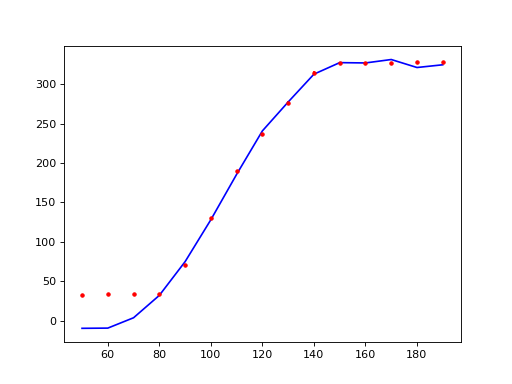

[ 1.20974376e+00  4.12070121e-01  4.84161706e-02 -3.27215418e-03
  5.46909408e-05 -2.56836549e-07 -6.96574122e-10  8.40251973e-12
 -1.71220184e-14  5.49068980e-19]


In [311]:
data = pd.read_hdf(path + '/asic'+str(asic)+'_efine_fitted_run10888.h5',key='efine')
channel_id = 5
tac_id     = 0
fig = plt.figure()
axis = fig.add_subplot(111)
#data_sel = data[(data['channel_id']==9) & (data['tac_id']==0)]
#axis.plot(data_sel['tpulse'],data_sel['mu'])
a = TPcal.QDC_fit_p(data,channel_id,tac_id,plot=True,axis=axis)
print(a)


In [281]:
filename = path + '/asic'+str(asic)+'_efine_fitted_run10888.h5'
channels = list(range(0,64))
channels.pop(56)
#channels = [6,8,10,12,14,15,16,18,19,20,22,25,26,28,30,31]
tacs = range(0,4)
res=[]
for ch in channels:
    data_ch = pd.read_hdf(filename,key='efine')
    for tc in tacs:
        data_tc = data_ch[data_ch['tac_id']==tc]
        spl_conf = TPcal.QDC_fit_p(data_tc,ch,tc,plot=False)
        res.append([asic,ch,tc,*spl_conf])

#df_qfine = pd.DataFrame(res,columns=['tofpet_id','channel_id','tac_id','spl0','spl1','spl2','spl3',
#                                     'spl4','spl5','spl6','spl7','spl8','spl9'])
df_qfine = pd.DataFrame(res,columns=['tofpet_id','channel_id','tac_id',
                                     'c0','c1','c2','c3','c4','c5','c6','c7','c8','c9'])


In [282]:
storage = pd.HDFStore(path + '/asic' +str(asic)+'_efine_cal_poly_HIGHGAIN.h5','w',complib="zlib",complevel=4)
storage.put('efine',df_qfine,index=False,format='table',data_columns=True)
storage.close()

# THRESHOLD T1

In [3]:
filename = path + "/asic0_t1_lsb58_baseline30.h5"
with pd.HDFStore(filename) as hdf:
    channels = hdf.keys()
    print(channels)

['/data']


<IPython.core.display.Javascript object>


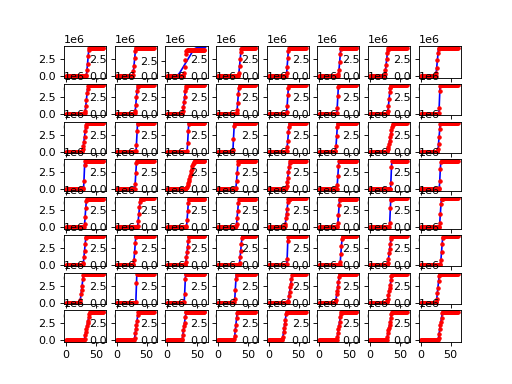

Channel = 0 / CHISQR = 105478981.537049
25
Channel = 1 / CHISQR = 295957668.620353
19
Channel = 2 / CHISQR = 493097513696.747559
18
Channel = 3 / CHISQR = 72838055.634599
25
Channel = 4 / CHISQR = 244743456.941088
21
Channel = 5 / CHISQR = 31645106.543288
23
Channel = 6 / CHISQR = 181161349.336148
17
Channel = 7 / CHISQR = 230501719.034429
18
Channel = 8 / CHISQR = 367724326.067032
23
Channel = 9 / CHISQR = 173051905.510559
23
Channel = 10 / CHISQR = 292246611.629223
17
Channel = 11 / CHISQR = 177180550.303071
22
Channel = 12 / CHISQR = 235522854.928801
23
Channel = 13 / CHISQR = 9829333.751118
20
Channel = 14 / CHISQR = 201270135.096733
22
Channel = 15 / CHISQR = 2332506.269955
23
Channel = 16 / CHISQR = 409890591.109380
19
Channel = 17 / CHISQR = 4046750.631308
23
Channel = 18 / CHISQR = 1794770.170192
27
Channel = 19 / CHISQR = 6293536.030156
18
Channel = 20 / CHISQR = 197012889.371982
22
Channel = 21 / CHISQR = 9705591.530669
18
Channel = 22 / CHISQR = 160087692.086634
20
Channel =

In [5]:
data = pd.read_hdf(filename,key='data')
thr = 'vth_t1'

fig, axs = plt.subplots(8,8)
res = []

for i in range(0,8):
    for j in range(0,8):
        if data[data['channel_id']==i*8+j].size == 0:
            pass
        else: 
            sol,fit=TPcal.Tn_fit(data,i*8+j,thr,min_count=1,plot=True,axis=axs[i,j])
            print(sol)
            res.append([i*8+j,sol,fit.coeff[0],fit.coeff[2]])

df_thr1 = pd.DataFrame(res,columns=['channel_id','thr_t1','slope','mu'])

In [ ]:
data = pd.read_hdf(filename,key='data')
thr = 'vth_t1'
fig, axs = plt.subplots(1)
sol=TPcal.Tn_fit(data,49,'vth_t1',min_count=1,plot=True,axis=axs)
#axs.plot(np.arange(0,62),TPcal.saturation(np.arange(0,62),18,3.6,34,2E6))
print(sol)

# THRESHOLD T2

In [28]:
filename = path +"/thr_asic0_t2_lsb58_baseline30_49v.h5"
with pd.HDFStore(filename) as hdf:
    channels = hdf.keys()
    print(channels)

['/data']


<IPython.core.display.Javascript object>


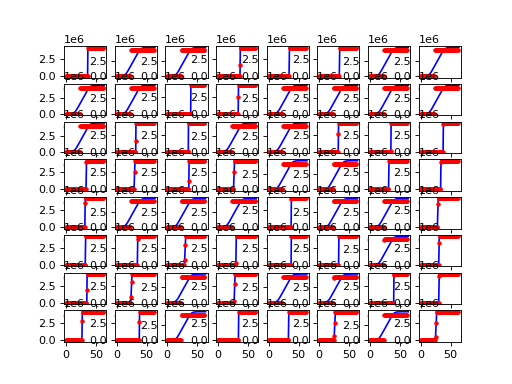

Channel = 0 / CHISQR = 18420.744220
33
Channel = 1 / CHISQR = 738664307612.426025
23
Channel = 2 / CHISQR = 738692184289.161621
23
Channel = 3 / CHISQR = 4937.737737
31
Channel = 4 / CHISQR = 1073.483632
28
Channel = 5 / CHISQR = 1799.099369
25
Channel = 6 / CHISQR = 738670890373.237671
23
Channel = 7 / CHISQR = 738696965500.576538
23
Channel = 8 / CHISQR = 738692142561.049072
23
Channel = 9 / CHISQR = 738693077221.068115
23
Channel = 10 / CHISQR = 512.724329
37
Channel = 11 / CHISQR = 1420.608990
23
Channel = 12 / CHISQR = 738699354868.156250
23
Channel = 13 / CHISQR = 738667633185.918945
23
Channel = 14 / CHISQR = 738665909718.095337
23
Channel = 15 / CHISQR = 738722902217.422485
23
Channel = 16 / CHISQR = 738706424658.151855
23
Channel = 17 / CHISQR = 2492.789404
26
Channel = 18 / CHISQR = 1866.277931
29
Channel = 19 / CHISQR = 738703713398.502930
23
Channel = 20 / CHISQR = 738656764881.542603
23
Channel = 21 / CHISQR = 2317.329529
25
Channel = 22 / CHISQR = 1845.615367
29
Channel =

In [8]:
data = pd.read_hdf(filename,key='data')
thr = 'vth_t1'

fig, axs = plt.subplots(8,8)
res = []

for i in range(0,8):
    for j in range(0,8):
        if data[data['channel_id']==i*8+j].size == 0:
            pass
        else: 
            sol,fit=TPcal.Tn_fit(data,i*8+j,thr,min_count=1,plot=True,axis=axs[i,j])
            print(sol)
            res.append([i*8+j,sol,fit.coeff[0],fit.coeff[2]])
        
df_thr2 = pd.DataFrame(res,columns=['channel_id','thr_t2','slope','mu'])

<IPython.core.display.Javascript object>


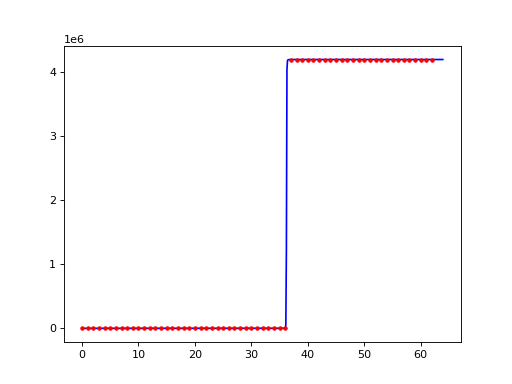

Channel = 0 / CHISQR = 18420.744220
(33, <TOFPET_cal_lib.fitting_nohist object at 0x7f0560c4f8e0>)


In [29]:
data = pd.read_hdf(filename,key='data')
thr = 'vth_t1'
fig, axs = plt.subplots(1)
sol=TPcal.Tn_fit(data,0,'vth_t1',min_count=1,plot=True,axis=axs)
#axs.plot(np.arange(0,62),TPcal.saturation(np.arange(0,62),18,3.6,34,2E6))
print(sol)

In [ ]:
storage = pd.HDFStore(path + '/asic0_thresholds_cal_49v.h5','w',complib="zlib",complevel=4)
storage.put('thr1',df_thr1,index=False,format='table',data_columns=True)
storage.put('thr2',df_thr2,index=False,format='table',data_columns=True)
#storage.put('efine',df_qfine,index=False,format='table',data_columns=True)
storage.close()

# TDC COMPARISON

filename = "/home/viherbos/DATA_daq/CAL_data/tdc_asic0_210712_a.h5"
channel = 20
tac     = 0
tpulse  = 0
data = pd.read_hdf(filename,key='ch'+str(channel))
data = data[data['tac_id']==tac]
data_fit = data[data['delay']==tpulse]

In [ ]:
filename = path + "/data/" + "tdc_asic0_allch_nocompressor_210710.h5"  #ASIC + "_tdc_tpulse.h5"
channel = 20
tac = 0

channels = [channel] #channels = range(0,64)
tacs = [tac]         #tacs = range(0,4)
res=[]
for ch in channels:
    data_ch = pd.read_hdf(filename,key='ch'+str(ch))
    for tc in tacs:
        data_tc = data_ch[data_ch['tac_id']==tc]
        # Find delay arrays
        delays = np.unique(data_tc['delay'].to_numpy())
        print(delays)
        for i in delays: #np.arange(0,360,0.5):
            data_fit = data_tc[data_tc['delay']==i]
            if data_fit.size > 0:
                rango_fit = np.max(data_fit['tfine'])-np.min(data_fit['tfine'])
                
                # Two distributions
                if  np.std(data_fit['tfine'].to_numpy())> 50 :
                    sel_1 = np.sum(data_fit[data_fit['tfine'] < 300]['tfine'].to_numpy() > 0)
                    sel_2 = np.sum(data_fit[data_fit['tfine'] < 300]['tfine'].to_numpy() > 0)
                    if sel_1 > sel_2:
                        data_fit_sel = data_fit[data_fit['tfine']<300]
                        rango_fit = np.max(data_fit_sel['tfine'])-np.min(data_fit_sel['tfine'])
                        coeff,coeff_err,moda,sigma,chi=TPcal.semigauss_fit(data_fit_sel['tfine'],rango_fit,False)
                    else:
                        data_fit_sel = data_fit[data_fit['tfine']>300]
                        rango_fit = np.max(data_fit_sel['tfine'])-np.min(data_fit_sel['tfine'])
                        coeff,coeff_err,moda,sigma,chi=TPcal.semigauss_fit(data_fit_sel['tfine'],rango_fit,False)
                else:
                    # Usual case
                    coeff,coeff_err,moda,sigma,chi=TPcal.semigauss_fit(data_fit['tfine'],rango_fit,False)
                    
                    # Fit fails with narrow distribution
                    if (sigma < 1.5) :
                        print("Fit failure")
                        coeff,coeff_err,chi=TPcal.gauss_fit(data_fit['tfine'],rango_fit,False)
                        moda = coeff[1]
                        sigma = coeff[2]
                    
                print(i,ch,tc,moda,sigma,coeff[1],coeff_err[1],chi)
                
                res.append([ch,tc,i,moda,np.abs(sigma)])
                  
                    
df_tfine = pd.DataFrame(res,columns=['channel_id','tac_id','phase','mu','sigma'])
        

In [ ]:
for tc in tacs:
    df_tfine['phase']=df_tfine['phase']/1000.0
    gb,coeff = TPcal.TDC_fit(df_tfine,channel,tac, plot=True)
    res.append([ch,tc,coeff[0],coeff[1],coeff[2]])
    print(coeff)
